In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import json 
from astropy import units as u
import itertools as it
import os
import matplotlib.colors as mccolors
from matplotlib.pyplot import cm
import random

In [2]:
json_list = os.listdir("/Users/snorris/manyTDE/data/sources/")
del json_list[64]
json_list[-32]

'ASASSN-14ae.json'

In [3]:
print(len(json_list))
type(json_list)

92


list

In [4]:
TDE_data = []
for file in range(len(json_list)):
    with open("/Users/snorris/manyTDE/data/sources/" + json_list[file]) as f:
        TDE_data.append(json.load(f))
print(TDE_data)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [5]:
type(TDE_data)

list

In [6]:
TDE_data[91].keys()

dict_keys(['name', 'catalog_version', 'catalog_creation_date', 'ra', 'dec', 'z', 'peak_year', 'peak_mjd', 'peak_limit', 'spectral_type', 'spectral_subtype', 'paper_ref', 'nickname', 'extinction', 'host', 'lightcurve'])

In [7]:
print(json_list[91])

AT2022hvp.json


In [8]:
from astropy.cosmology import WMAP9 as cosmo
Ho = cosmo.H(0)  
from astropy.constants import c
from astropy.constants import e
sol = c.to(u.km/u.s)



In [9]:
TDE_data[91].get('z')

0.112

In [10]:
TDE_data[59].get('lightcurve')['data']

[[57630.842524, 'UVW2.uvot', 0.0008790225168308824, 3.817546285283605e-05],
 [57635.247923, 'UVW2.uvot', 0.0006982324040771676, 3.790481002209443e-05],
 [57636.617443, 'UVW2.uvot', 0.0006792036326171801, 2.9497438973428475e-05],
 [57638.610965, 'UVW2.uvot', 0.0005915616341754767, 3.2113994178509945e-05],
 [57639.48179, 'UVW2.uvot', 0.0005345643593969647, 2.9019793938531063e-05],
 [57640.182468, 'UVW2.uvot', 0.0005445026528424219, 2.9559312188893226e-05],
 [57642.574542, 'UVW2.uvot', 0.0004528975799036195, 2.9503637972921845e-05],
 [57643.602521, 'UVW2.uvot', 0.0004405548635065516, 2.3916318274566952e-05],
 [57645.849684, 'UVW2.uvot', 0.00036307805477010324, 1.9710349460852806e-05],
 [57648.720847, 'UVW2.uvot', 0.0002992264636608183, 1.6244050250914658e-05],
 [57651.438241, 'UVW2.uvot', 0.00022080047330188878, 1.4383864073495485e-05],
 [57655.390176, 'UVW2.uvot', 0.00020137242498623648, 1.5304613271324827e-05],
 [57655.45011, 'UVW2.uvot', 0.00020701413487910202, 1.79810192907939e-05],
 

In [11]:
TDE_data[91]['lightcurve']["data"][0][0]
TDE_data[91].get('peak_mjd')

59694.95833333332

In [13]:
lc_color_dict = {}
for surv in ['ztf','ps','sdss']:
  lc_color_dict['g.'+surv] = 'g'
  lc_color_dict['r.'+surv] = 'r'
  lc_color_dict['i.'+surv] = 'brown'

lc_color_dict['UVW2.uvot'] = 'violet'
lc_color_dict['UVM2.uvot'] = 'black'
lc_color_dict['UVW1.uvot'] = 'fuchsia'

lc_color_dict['U.uvot'] = 'pink'
lc_color_dict['u.sdss'] = 'darkblue'

lc_color_dict['F125LP'] = 'darkred'
lc_color_dict['F150LP'] = 'darkviolet'
lc_color_dict['F225W'] = 'crimson'

lc_color_dict['FUV'] = 'darkviolet'
lc_color_dict['NUV'] = 'darkkhaki'

lc_color_dict['B.uvot'] = 'lightblue'
lc_color_dict['V.uvot'] = 'orange'
lc_color_dict['c.atlas'] = 'cyan'
lc_color_dict['o.atlas'] = 'orange'
lc_color_dict['W1.wise'] = 'peru'
lc_color_dict['W2.wise'] = 'slategrey'

marker_dict = {key:'o' for key in lc_color_dict}
marker_dict['UVW1.uvot'] = 's'
marker_dict['UVM2.uvot'] = 's'
marker_dict['UVW2.uvot'] = 's'

marker_dict['r.ztf'] = 's'

marker_dict['F125LP'] = '*'
marker_dict['F150LP'] = 'd'
marker_dict['F225W'] = '*'
lc_color_dict.values()

dict_values(['g', 'r', 'brown', 'g', 'r', 'brown', 'g', 'r', 'brown', 'violet', 'black', 'fuchsia', 'pink', 'darkblue', 'darkred', 'darkviolet', 'crimson', 'darkviolet', 'darkkhaki', 'lightblue', 'orange', 'cyan', 'orange', 'peru', 'slategrey'])

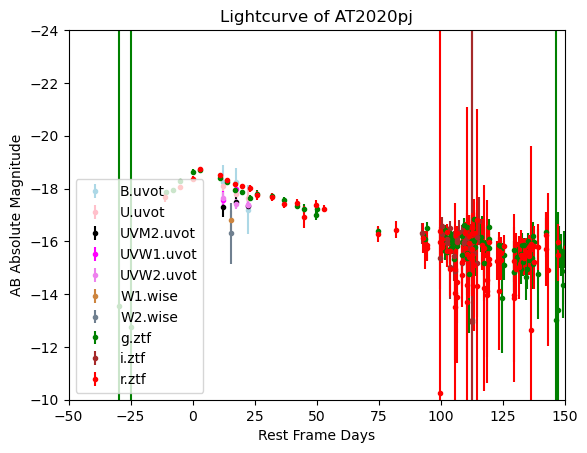

[-661.57604863 -661.5570072  -661.51968629 ... 1577.25827605 1579.25303472
 1581.1451149 ]


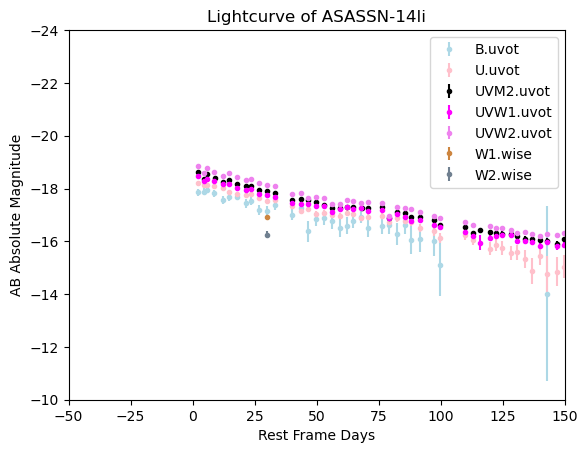

[-334.25125977 -158.81816664   29.93734557  200.00381826  391.81196483
  558.74832597  758.72882003  922.08455165 1123.01584839 1282.4195634
 1487.02093854 1646.59468664 1853.93935635 2013.26285662 2218.18335946
 2377.63149307 2582.35738711 2741.72635007 2949.27566879 3108.84478761]


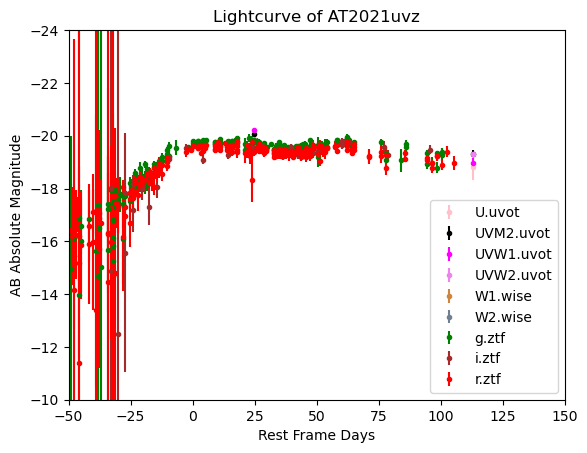

[-717.23752188 -717.2361774  -716.41808539 ... 1003.5371136  1004.45587773
 1005.42737051]


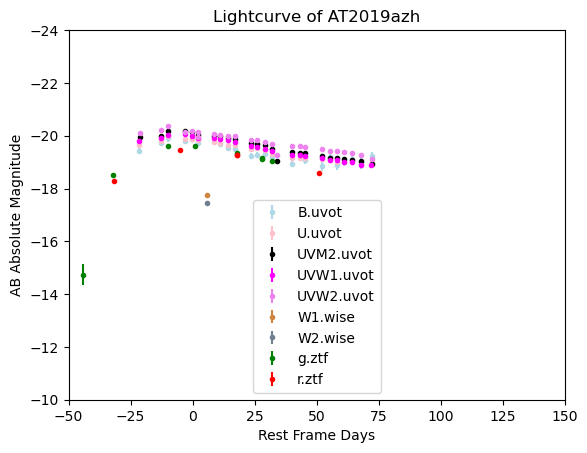

[-342.98389969 -342.96340714 -338.98743117 ... 1855.5700929  1862.50838253
 1866.49329141]


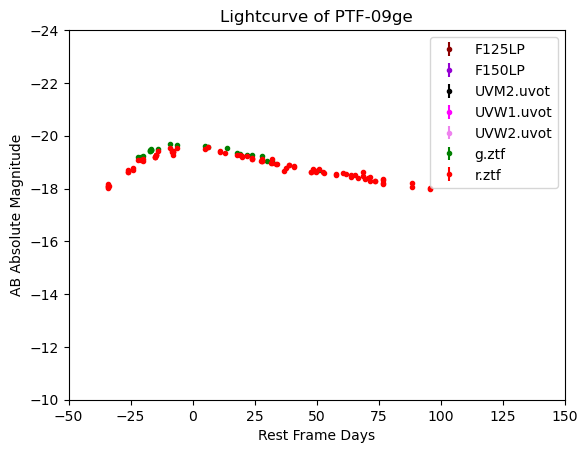

[-34.16683064 -34.1137397  -34.03941239 -33.97570327 -33.93323052
 -33.88013959 -26.1607177  -26.01206308 -25.90588121 -24.132644
 -23.98398938 -22.18951579 -20.91533336 -20.0658784  -19.91722379
 -15.1178033  -15.06471237 -15.02223962 -14.97976687 -14.94791231
 -14.91605775 -13.92856636  -9.192855    -8.20536361  -8.14165449
  -8.08856356  -8.02485444  -7.9717635   -7.95052713  -6.17728991
   4.97180635   6.03362505  10.91799103  11.00293652  12.85050105
  17.85166709  18.94534034  19.82664986  19.92221354  21.90781449
  23.7659972   23.90403363  23.90403363  27.72658092  27.76905367
  27.83276279  27.86461735  27.87523554  31.71901921  31.82520108
  31.87829201  33.73647472  33.86389296  36.74142162  37.68644026
  38.74825895  38.83320444  40.70200534  40.80818721  47.67815415
  47.78433602  48.70811828  48.81430015  49.69560966  49.83364609
  50.78928292  52.668702    52.78550206  57.63801348  57.74419535
  60.78099681  61.72601544  63.75408915  63.76470733  65.61227186
  66.6528541

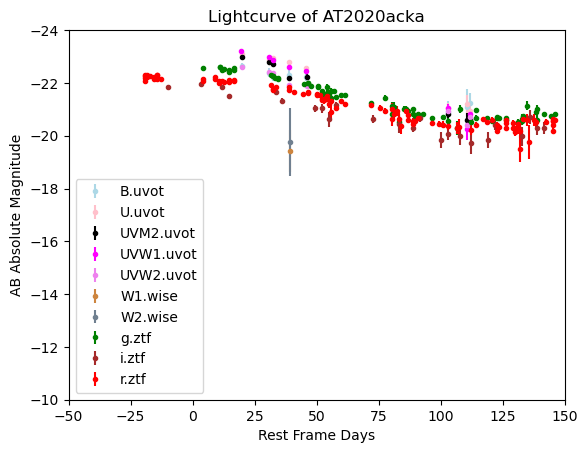

[-667.69681563 -664.90388831 -651.69885679 -647.95602544 -628.19664112
 -608.45056781 -604.70593915 -601.94526576 -597.17648708 -594.48942779
 -591.62569664 -573.74382258 -570.95684275 -567.19526471 -563.40834988
 -548.40260299 -545.59198561 -542.76654302 -537.13829315 -534.33305687
 -531.50877979 -528.72778018 -524.92008165 -522.11741611 -519.33410722
 -513.69363553 -510.8418975  -507.9898217  -505.21417053 -502.33762935
 -493.94136421 -487.35336327 -484.52470723 -479.82776727 -474.07787652
 -467.61510025 -461.94679727 -458.15714823 -453.43250761 -449.70420746
 -438.46758736 -423.41113406 -422.48190474 -422.47720993 -422.47252603
 -422.46784204 -420.59633376 -420.5916716  -420.58700944 -418.72017423
 -418.71543584 -418.7107192  -416.84192329 -416.83731563 -416.83270797
 -416.82811113 -413.07593372 -413.07120616 -413.06648951 -411.19515562
 -411.1905697  -411.18599469 -407.43123563 -407.42650806 -407.42176968
 -341.10504191 -321.36500332 -318.52013867 -315.71333378 -311.9335647
 -309.1

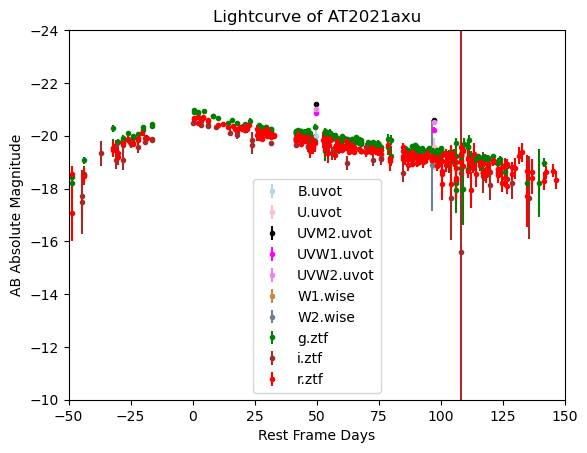

[-712.25151773 -712.2506087  -710.3520951  ...  969.53078858  985.21967556
 1020.5465057 ]


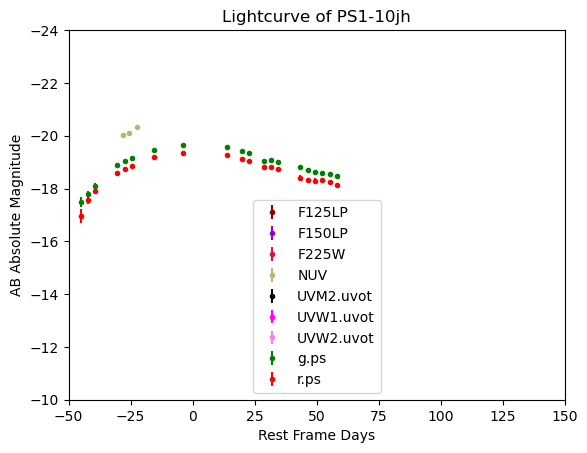

[-56.95026844 -53.98794256 -45.020279   -42.06947967 -39.21089283
 -30.33544175 -27.4768549  -24.42231654 -15.45465298  -3.82435409
  14.007234    19.82814673  22.77894605  28.69207125  31.65439713
  34.60519646  43.48064754  46.43144686  49.39377274  52.34457207
  55.20315891  58.25769727 206.38551792 278.77231378 308.3379398
 336.22068808 367.21560752 398.2566332 ]


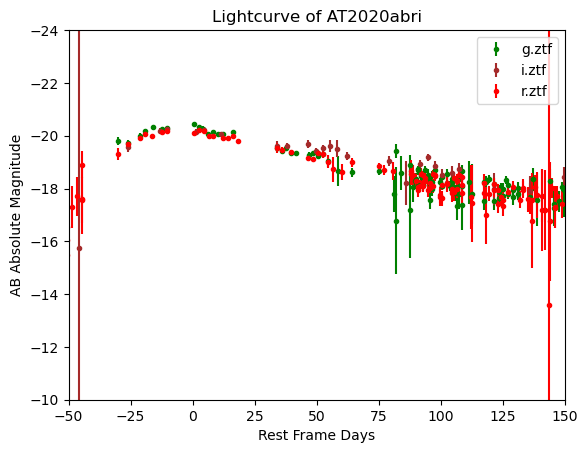

[-7.16848249e+02 -7.16847349e+02 -7.11898405e+02 -7.11897505e+02
 -7.09981949e+02 -7.09972632e+02 -7.08944412e+02 -7.08943512e+02
 -6.95219225e+02 -6.95218325e+02 -6.94234397e+02 -6.92225836e+02
 -6.81417753e+02 -6.81416842e+02 -6.63888628e+02 -6.48062832e+02
 -6.48061944e+02 -6.47100738e+02 -6.46157242e+02 -6.44186413e+02
 -6.37296594e+02 -6.37295705e+02 -6.31476611e+02 -6.24520154e+02
 -6.24519208e+02 -6.22605895e+02 -6.21633596e+02 -6.21632708e+02
 -6.20613621e+02 -6.19628896e+02 -6.18628453e+02 -6.18627565e+02
 -6.17667304e+02 -6.15748285e+02 -6.15747397e+02 -6.11818860e+02
 -6.10731210e+02 -6.08861632e+02 -6.08860744e+02 -6.07784665e+02
 -6.04906137e+02 -6.04905248e+02 -5.93126415e+02 -5.89268036e+02
 -5.77343192e+02 -5.72502377e+02 -5.72501489e+02 -5.71457471e+02
 -5.70507916e+02 -5.69533612e+02 -5.69532712e+02 -5.68581802e+02
 -5.67560175e+02 -5.66633080e+02 -5.65604973e+02 -5.64560500e+02
 -5.63621343e+02 -5.63620409e+02 -5.57756863e+02 -5.54764021e+02
 -5.51851256e+02 -5.40951

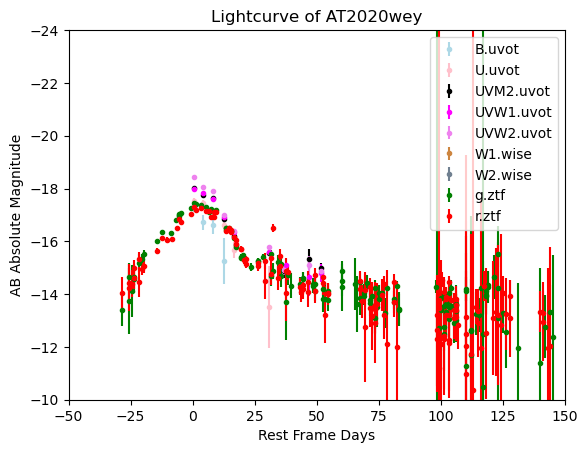

[-7.27197759e+02 -7.27196799e+02 -7.26218000e+02 -7.25193744e+02
 -7.24234776e+02 -7.24233862e+02 -7.23214696e+02 -7.22241185e+02
 -7.21216685e+02 -7.21215772e+02 -7.20317255e+02 -7.19239616e+02
 -7.18198503e+02 -7.18197589e+02 -7.17216626e+02 -7.15266503e+02
 -7.15265589e+02 -7.12344256e+02 -7.12342394e+02 -7.11202660e+02
 -7.09201341e+02 -7.09200426e+02 -7.07202670e+02 -7.06287945e+02
 -7.06287031e+02 -7.02305321e+02 -7.02224148e+02 -7.02223234e+02
 -7.01303996e+02 -7.01293375e+02 -7.00313744e+02 -7.00234179e+02
 -6.94267255e+02 -6.84249735e+02 -6.84248833e+02 -6.81259459e+02
 -6.81257561e+02 -6.77294872e+02 -6.77293970e+02 -6.73318057e+02
 -6.73314829e+02 -6.69317848e+02 -6.68296507e+02 -6.63287128e+02
 -6.63286214e+02 -6.62321426e+02 -6.58519418e+02 -6.58517451e+02
 -6.56302126e+02 -6.56271247e+02 -6.47247428e+02 -6.47246514e+02
 -6.46289894e+02 -6.45482327e+02 -6.43327709e+02 -6.42483906e+02
 -6.41507768e+02 -6.41506785e+02 -6.40476396e+02 -6.40284906e+02
 -6.27551683e+02 -6.26545

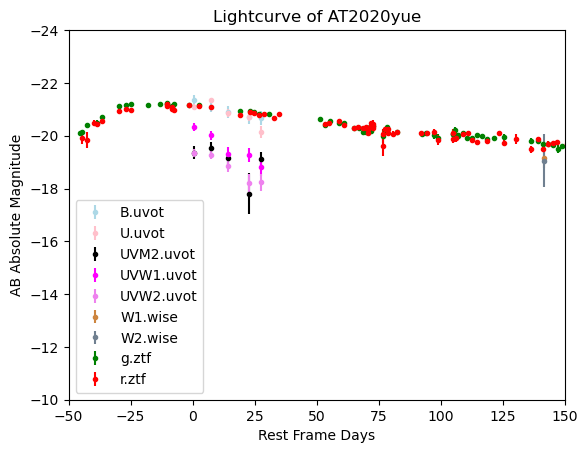

[-708.21142142 -704.39149024 -704.33643673 -699.47178184 -699.44279917
 -694.56817369 -689.62829759 -687.75415801 -678.86784899 -675.94562074
 -668.19412178 -623.32997828 -615.51756818 -602.79689318 -599.82988792
 -596.93737879 -589.16133866 -586.05603704 -582.21163253 -575.39986027
 -571.50572752 -549.97705783 -547.04658122 -544.06868763 -536.26032238
 -533.2844117  -530.40748154 -522.57365737 -515.72424616 -419.44713814
 -419.44224349 -419.43733749 -417.48736488 -415.53425391 -415.52947253
 -415.51990986 -413.56668553 -413.56177953 -410.64631538 -409.65372201
 -409.64904263 -409.64436325 -401.83460439 -394.979868   -389.08876503
 -383.20223954 -375.36790545 -356.86238211 -351.94302505 -342.17257518
 -339.24536164 -336.30369078 -333.28846425 -324.67276572 -321.71888085
 -317.67586933 -317.6749742  -311.95950062 -309.01047643 -303.17814328
 -298.26033841 -295.36739865 -291.38941112 -290.429392   -290.41682686
 -289.4989901  -286.43847674 -285.60464208 -284.62554295 -283.66483271
 -280.

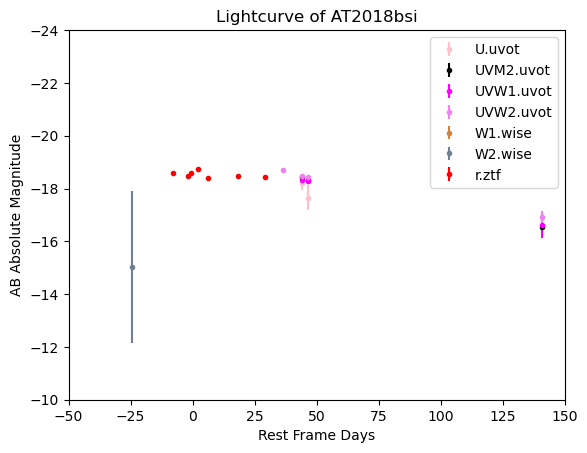

[ 2.1513234  -7.77819801 18.13722309 -0.84012861 -1.81628663 29.13736944
  6.16091873]


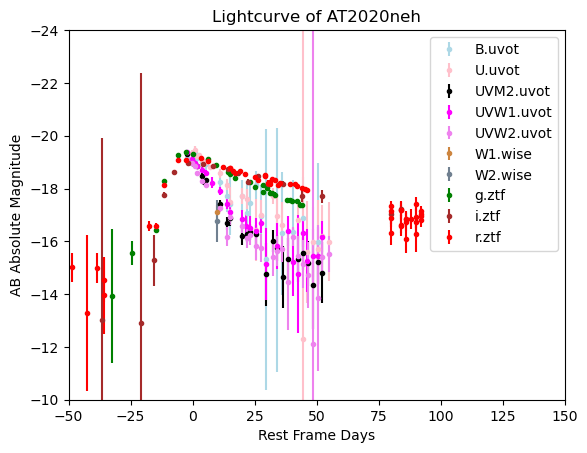

[-726.36707219 -720.37862677 -704.31972016 -701.41876103 -695.41492867
 -688.45169562 -665.52750375 -571.30563815 -571.30090187 -571.29142943
 -568.29971923 -567.30895539 -567.30406901 -567.29918262 -565.31207539
 -565.30726975 -564.31182743 -564.30699884 -564.30218172 -564.29735303
 -556.34882009 -545.35884652 -524.42925903 -510.42867648 -506.45895575
 -476.53799586 -472.62859855 -464.56338084 -460.61225846 -452.69295159
 -449.73911987 -446.7410678  -435.73965786 -426.77780047 -420.80976711
 -416.85992696 -413.84502077 -404.86633242 -400.91308444 -397.89971468
 -391.9282158  -388.95381024 -385.98320526 -379.03897497 -375.97826587
 -373.02871979 -367.07879971 -364.07181805 -361.06896043 -358.03432377
 -355.08033027 -352.02670242 -349.09856188 -343.1251916  -328.16103819
 -321.10148619 -315.20734979 -307.2280313  -283.29793117 -283.29301006
 -283.2881121  -283.28321414 -279.30280791 -279.2979908  -275.31936353
 -275.31452336 -275.30969467 -273.32557937 -273.32075078 -273.31592209
 -272.

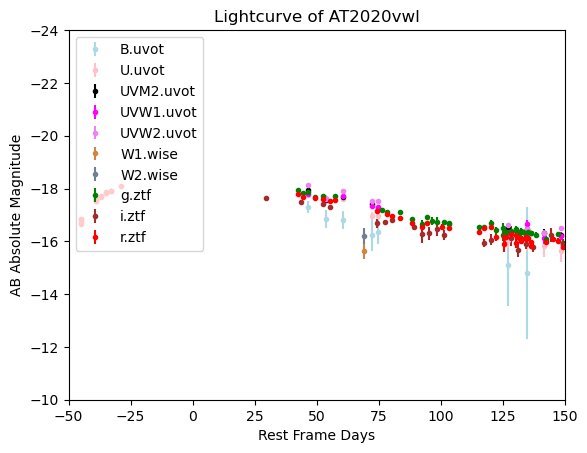

[-698.09573647 -693.07725475 -687.08765432 -669.09665405 -666.13154304
 -652.10725409 -648.14870976 -633.18215264 -618.23686907 -614.27506256
 -602.22486911 -599.27118716 -594.20733593 -591.33696645 -588.33199221
 -578.39859664 -576.28737451 -576.22070835 -569.30317247 -566.36231944
 -562.36624864 -558.34365256 -555.39132409 -542.43992867 -539.42415004
 -536.44644149 -530.46573675 -527.46933438 -524.46770328 -517.47023275
 -514.51699046 -511.53946702 -508.47275451 -505.54943851 -502.52050703
 -499.49349584 -496.54308766 -493.49150615 -490.55475975 -477.57675799
 -474.57281331 -469.58935938 -463.478573   -456.61387949 -450.6043359
 -446.57255487 -441.55374913 -437.5934928  -425.6605059  -410.68249654
 -410.67762641 -410.67277947 -410.66792094 -408.68504528 -408.68005951
 -408.67508534 -408.67011107 -406.68758252 -406.68263144 -406.67766876
 -406.67271768 -404.69018913 -404.68516869 -404.68014824 -402.69505155
 -402.69015834 -402.68526512 -402.6803834  -398.69972116 -398.69470061
 -398.6

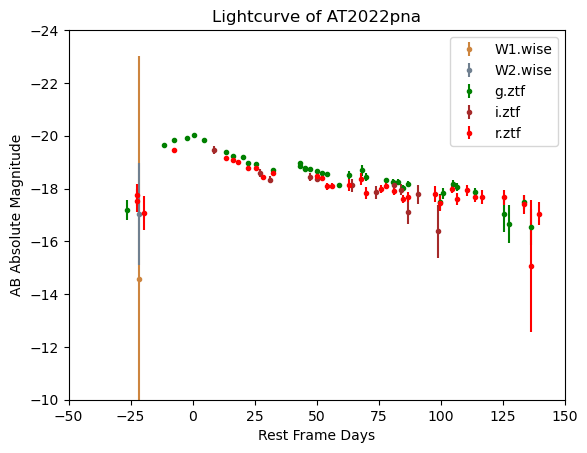

[-726.17922832 -719.23123476 -716.28546312 -706.33120894 -680.46077086
 -679.53162423 -679.52002185 -678.47345718 -677.52898667 -677.50019388
 -676.50456679 -676.48072829 -675.5045154  -674.59488649 -674.55815527
 -673.51989776 -672.40573521 -664.55201861 -663.67331411 -662.64965467
 -662.64873296 -658.64738668 -658.64459845 -657.58146555 -656.64246778
 -655.63513467 -654.66483242 -654.6629659  -653.68543947 -652.7285023
 -652.72662433 -651.65228077 -648.77572018 -643.69448852 -642.7625651
 -636.78743168 -634.86148269 -628.82096344 -625.88901787 -623.91652117
 -620.98735229 -612.05883142 -610.07992862 -607.98409179 -605.97610811
 -598.0458412  -591.00325431 -589.13425718 -582.16457984 -578.14506381
 -574.16712966 -573.22876561 -569.24952958 -567.27184803 -563.29003112
 -561.27866013 -545.35838612 -541.34807597 -539.35623425 -537.36577516
 -530.42668794 -529.43410263 -529.43111849 -529.42814589 -529.4251733
 -528.43566421 -528.43269162 -528.42971902 -526.44647256 -526.44349986
 -526.440

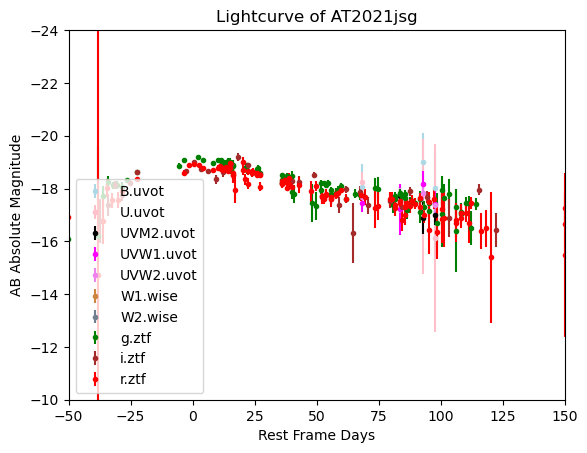

[-6.81290524e+02 -6.68406060e+02 -6.65393342e+02 -6.62461583e+02
 -6.56482545e+02 -6.51419609e+02 -6.40617020e+02 -6.36688281e+02
 -6.16864532e+02 -6.15881285e+02 -6.15880378e+02 -6.14877004e+02
 -6.13828299e+02 -6.09917209e+02 -6.06908199e+02 -6.00977122e+02
 -5.97958238e+02 -5.95042806e+02 -5.91066946e+02 -5.87102775e+02
 -5.80163076e+02 -5.77164607e+02 -5.73194924e+02 -4.88547119e+02
 -4.86565573e+02 -4.86560751e+02 -4.84583281e+02 -4.84578401e+02
 -4.84573499e+02 -4.73680662e+02 -4.64751931e+02 -4.57813173e+02
 -4.51829600e+02 -4.22178758e+02 -4.19178314e+02 -4.17173380e+02
 -4.04324624e+02 -4.04287779e+02 -4.01325076e+02 -3.99321072e+02
 -3.98345346e+02 -3.95288492e+02 -3.91554153e+02 -3.90468764e+02
 -3.87536729e+02 -3.84543048e+02 -3.79460581e+02 -3.79459674e+02
 -3.77638357e+02 -3.76657372e+02 -3.76656453e+02 -3.75679774e+02
 -3.74649923e+02 -3.73656595e+02 -3.73655677e+02 -3.72658319e+02
 -3.70681492e+02 -3.70680573e+02 -3.69660562e+02 -3.67540465e+02
 -3.66573660e+02 -3.65818

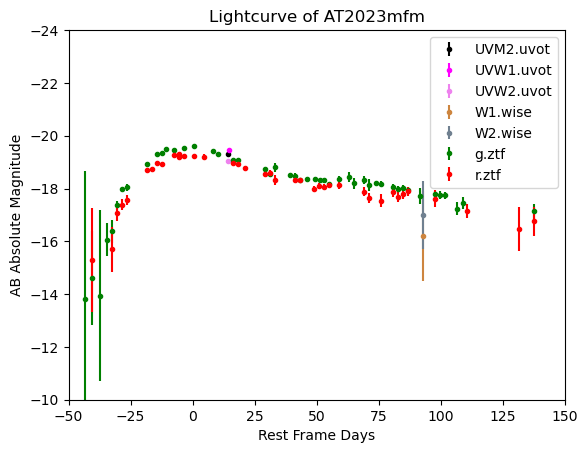

[-7.24833362e+02 -7.24831009e+02 -7.21875453e+02 -7.20856657e+02
 -7.20855712e+02 -7.19858973e+02 -7.18880244e+02 -7.09898319e+02
 -7.05017475e+02 -7.04919630e+02 -7.04919157e+02 -7.04918685e+02
 -7.04918223e+02 -7.04917751e+02 -7.04917278e+02 -7.04916817e+02
 -7.04916344e+02 -7.04915871e+02 -7.04915399e+02 -7.04914937e+02
 -7.04914465e+02 -7.04913992e+02 -7.04913519e+02 -7.04913058e+02
 -7.04912585e+02 -7.04912112e+02 -7.04911640e+02 -7.04911167e+02
 -7.04910706e+02 -7.04910233e+02 -7.04909760e+02 -7.04909299e+02
 -7.04908826e+02 -7.04908354e+02 -7.04907881e+02 -7.04907420e+02
 -7.04906947e+02 -7.04906474e+02 -7.04906001e+02 -7.04905529e+02
 -7.04905068e+02 -7.04904595e+02 -7.04904122e+02 -7.04903661e+02
 -7.04903188e+02 -7.04902715e+02 -7.04902254e+02 -7.04901781e+02
 -7.04901309e+02 -7.04900836e+02 -7.04900375e+02 -7.04899902e+02
 -7.04899429e+02 -7.04898956e+02 -7.04898484e+02 -7.04895705e+02
 -7.04895232e+02 -7.04894760e+02 -7.04894298e+02 -7.04893826e+02
 -7.04893353e+02 -7.04892

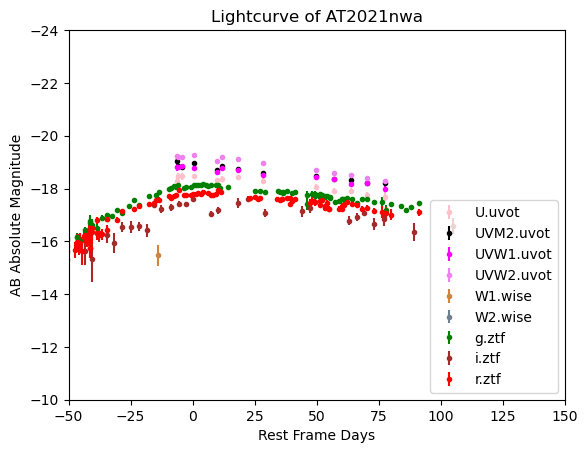

[-7.28847332e+02 -7.26952484e+02 -7.24941584e+02 -7.23918226e+02
 -7.20962040e+02 -7.17900554e+02 -7.14985596e+02 -7.07996176e+02
 -7.04991075e+02 -7.02006668e+02 -6.99003533e+02 -6.95002658e+02
 -6.92030449e+02 -6.89017023e+02 -6.88018336e+02 -6.87894076e+02
 -6.85021501e+02 -6.83938510e+02 -6.82918515e+02 -6.81940789e+02
 -6.80920217e+02 -6.79942341e+02 -6.76945829e+02 -6.74923518e+02
 -6.73971978e+02 -6.73950648e+02 -6.72950308e+02 -6.70996127e+02
 -6.67003715e+02 -6.66958036e+02 -6.66001155e+02 -6.65959546e+02
 -6.65083467e+02 -6.48102624e+02 -6.38137838e+02 -6.34140536e+02
 -6.31138024e+02 -6.28161051e+02 -6.24169773e+02 -6.18192011e+02
 -5.62820285e+02 -5.48840254e+02 -5.42788904e+02 -5.37816073e+02
 -5.27840315e+02 -5.26807361e+02 -5.23827856e+02 -5.20829403e+02
 -5.17831354e+02 -5.14844138e+02 -5.11847268e+02 -5.05867159e+02
 -5.00888512e+02 -4.99897722e+02 -4.95899495e+02 -4.94882414e+02
 -4.90924420e+02 -4.87905503e+02 -4.86946206e+02 -4.84893477e+02
 -4.62998892e+02 -4.58020

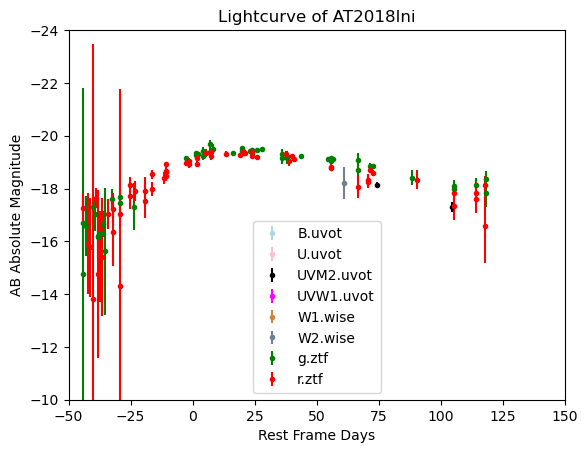

[-1.52990418e+02 -1.46028459e+02 -1.43043727e+02 -1.40085980e+02
 -1.34214769e+02 -1.31200875e+02 -1.28189009e+02 -1.27216311e+02
 -1.23256874e+02 -1.23255797e+02 -1.22367090e+02 -1.21275001e+02
 -1.20365512e+02 -1.20364400e+02 -1.19366998e+02 -1.18328591e+02
 -1.17379255e+02 -1.17378269e+02 -1.16283979e+02 -1.15410645e+02
 -1.14445742e+02 -1.14444435e+02 -1.13313141e+02 -1.12423689e+02
 -1.12340500e+02 -1.11496374e+02 -1.11495262e+02 -1.11411271e+02
 -1.11410273e+02 -1.10515227e+02 -1.10397866e+02 -1.09434120e+02
 -1.09358428e+02 -1.08442886e+02 -1.08440410e+02 -1.08383356e+02
 -1.08382359e+02 -1.07429928e+02 -1.05407027e+02 -1.05404586e+02
 -1.04418980e+02 -1.03517273e+02 -1.02441772e+02 -1.02440775e+02
 -1.01450067e+02 -1.00463108e+02 -9.96102591e+01 -9.96090211e+01
 -9.85807254e+01 -9.75482686e+01 -9.65793072e+01 -9.65773699e+01
 -9.55094455e+01 -9.45713893e+01 -9.36291260e+01 -9.36280141e+01
 -9.25530741e+01 -9.16466682e+01 -9.05511745e+01 -9.05497300e+01
 -8.86147304e+01 -8.76672

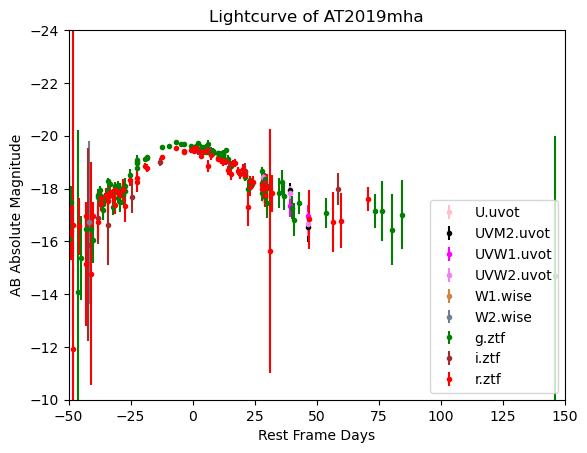

[-499.84481404 -499.83717916 -499.80856261 ... 1719.47986503 1721.45493233
 1723.33777428]


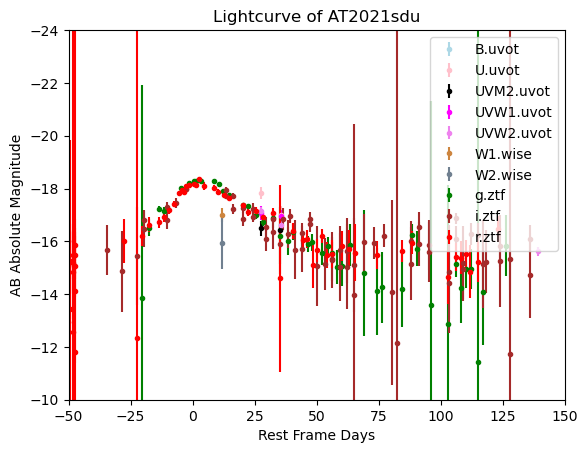

[-7.27237827e+02 -7.26285969e+02 -7.26256645e+02 -7.24290932e+02
 -7.22289517e+02 -7.22287045e+02 -7.21268486e+02 -7.19233947e+02
 -7.19233045e+02 -7.18299108e+02 -7.17233641e+02 -7.16237093e+02
 -7.16233384e+02 -7.15279089e+02 -7.13330325e+02 -7.13322630e+02
 -7.12267434e+02 -7.09289044e+02 -7.09288108e+02 -7.08255038e+02
 -7.07256549e+02 -7.06316696e+02 -7.06315772e+02 -7.05239768e+02
 -7.04236276e+02 -7.02299655e+02 -7.01297053e+02 -7.00308211e+02
 -7.00307287e+02 -6.99331236e+02 -6.97317146e+02 -6.97316245e+02
 -6.96324423e+02 -6.94277035e+02 -6.88346516e+02 -6.85272967e+02
 -6.80302521e+02 -6.77391732e+02 -6.74395306e+02 -6.74394393e+02
 -6.72365861e+02 -6.71362381e+02 -6.71360498e+02 -6.69426361e+02
 -6.68417139e+02 -6.67443710e+02 -6.67442809e+02 -6.65374139e+02
 -6.61484237e+02 -6.54498800e+02 -6.54497898e+02 -6.53519259e+02
 -6.52497050e+02 -6.51463021e+02 -6.51461172e+02 -6.49459538e+02
 -6.48695108e+02 -6.47696665e+02 -6.46698673e+02 -6.45700218e+02
 -6.44701764e+02 -6.43703

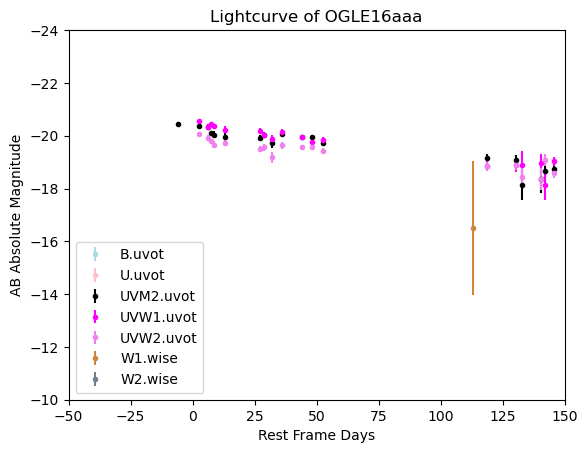

[-245.90559029  -72.57639752  113.23896583  282.23272191  475.04511365
  639.98795804  834.33525751  995.55242519 1193.63271996 1354.79558484
 1555.61634086 1716.78978513 1914.88120909 2075.96063671 2274.11574722
 2435.3163226  2635.99548148 2797.03711054]


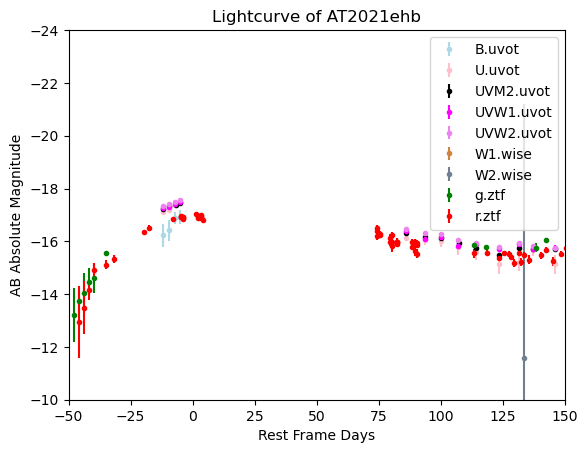

[-726.71602    -726.71162254 -726.70722497 -656.40370553 -656.4032542
 -656.39918069 -653.40602529 -653.40369923 -653.4004243  -653.39761221
 -648.40106587 -640.39408653 -637.40823337 -631.38148863 -628.43557181
 -625.41309205 -622.43877653 -618.37522034 -615.39956242 -612.37304384
 -606.38312258 -603.38538454 -600.44622594 -594.41442413 -594.41397279
 -594.41156574 -591.40689591 -588.38495997 -588.36733522 -588.36688389
 -587.35918223 -587.358731   -586.36438391 -586.36393258 -585.38357657
 -578.38294488 -572.50135285 -572.50090152 -572.36791144 -571.48507614
 -571.4846248  -570.48519745 -570.48474612 -569.48833923 -569.48788789
 -569.42787347 -566.45715693 -562.50606139 -562.50561005 -560.40910746
 -560.37833651 -560.37788517 -551.53883859 -551.53838726 -551.50798655
 -549.52915226 -549.52870092 -547.55253974 -547.5520884  -547.50837942
 -546.45439985 -546.45394852 -546.4361039  -545.50851806 -545.50806673
 -545.45206782 -544.38337978 -544.38245391 -541.53483308 -541.53438175
 -540.5

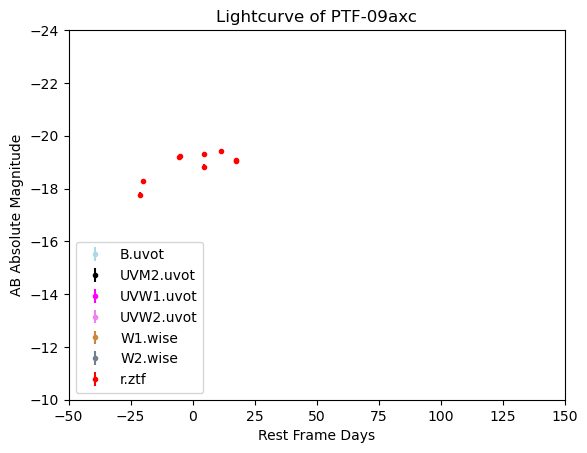

[-21.21007131 -20.19139515  -5.3430828   -5.2434297    4.5557921
   4.63330006  11.59794471  17.45533265  17.53284062 164.8090543
 182.71339514]


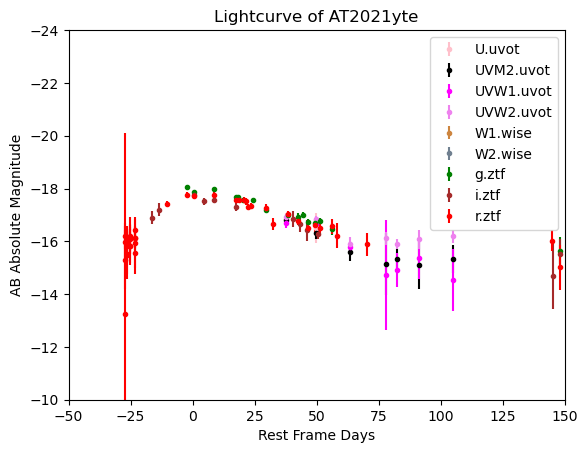

[-7.22422382e+02 -7.21498289e+02 -7.15445385e+02 -7.12428138e+02
 -7.09481025e+02 -7.00488288e+02 -6.91460658e+02 -6.86505087e+02
 -6.85511058e+02 -6.82463310e+02 -6.79638652e+02 -6.79537313e+02
 -6.73535899e+02 -6.72519124e+02 -6.66712562e+02 -6.51707778e+02
 -6.45685953e+02 -6.43629623e+02 -6.22766279e+02 -6.18825136e+02
 -6.18794427e+02 -6.16741737e+02 -6.07857945e+02 -6.06813697e+02
 -6.05908894e+02 -6.03885376e+02 -6.00823089e+02 -5.97841568e+02
 -5.96956529e+02 -5.94930907e+02 -5.91961094e+02 -5.88957763e+02
 -5.85880555e+02 -5.84891484e+02 -5.82868984e+02 -5.79908671e+02
 -5.78961046e+02 -5.75976936e+02 -5.73965196e+02 -5.72943682e+02
 -5.64016409e+02 -5.23056663e+02 -3.93903338e+02 -3.93898402e+02
 -3.93893456e+02 -3.89907700e+02 -3.89902476e+02 -3.89897459e+02
 -3.58938117e+02 -3.56948845e+02 -3.55049863e+02 -3.54979718e+02
 -3.52954733e+02 -3.49022374e+02 -3.43971312e+02 -3.41975140e+02
 -3.37980739e+02 -3.34002403e+02 -3.30072760e+02 -3.29012100e+02
 -3.27036617e+02 -3.24040

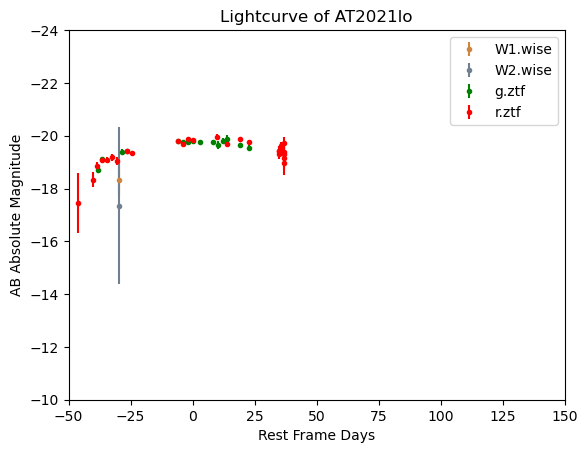

[-7.10539152e+02 -7.06542972e+02 -5.57951553e+02 -5.54987601e+02
 -5.46081813e+02 -5.43116912e+02 -5.36256567e+02 -5.31291454e+02
 -5.28304554e+02 -5.18426709e+02 -5.15456248e+02 -5.12472334e+02
 -5.11528111e+02 -5.10505766e+02 -5.09568715e+02 -5.02706826e+02
 -4.89822188e+02 -4.87906675e+02 -4.84813822e+02 -4.77077857e+02
 -4.74133650e+02 -4.67129613e+02 -4.61203974e+02 -4.58247813e+02
 -4.48394986e+02 -4.47489154e+02 -4.40524229e+02 -4.39546155e+02
 -4.37644873e+02 -4.18807325e+02 -4.16015150e+02 -4.06095893e+02
 -4.02142875e+02 -3.96175047e+02 -3.93208968e+02 -3.93170691e+02
 -3.92207672e+02 -3.91225205e+02 -3.90214792e+02 -3.80389123e+02
 -3.77438945e+02 -3.65562387e+02 -3.54705038e+02 -3.47787164e+02
 -1.93278160e+02 -1.90312790e+02 -1.78476682e+02 -1.72483733e+02
 -1.68565845e+02 -1.65581199e+02 -1.64556303e+02 -1.61616821e+02
 -1.59687065e+02 -1.58749236e+02 -1.44824705e+02 -1.42904513e+02
 -1.41910230e+02 -1.39966163e+02 -1.38977028e+02 -1.38932997e+02
 -1.36005125e+02 -1.25101

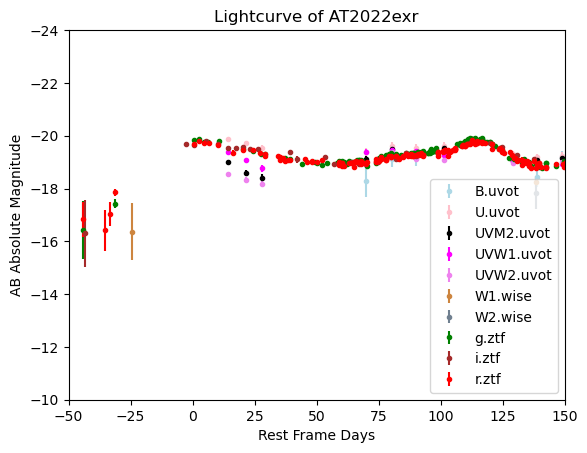

[-7.26140434e+02 -7.16214217e+02 -7.08251139e+02 -7.05296257e+02
 -7.02349913e+02 -6.99334867e+02 -6.99333934e+02 -6.98354531e+02
 -6.96388707e+02 -6.96387751e+02 -6.95408256e+02 -6.94355589e+02
 -6.93400391e+02 -6.93399435e+02 -6.90449807e+02 -6.89331942e+02
 -6.86444379e+02 -6.85412900e+02 -6.85411967e+02 -6.83367143e+02
 -6.83366209e+02 -6.82484759e+02 -6.78570048e+02 -6.78569115e+02
 -6.77552798e+02 -6.77538638e+02 -6.75542537e+02 -6.74426170e+02
 -6.74425237e+02 -6.73555849e+02 -6.73554916e+02 -6.72572033e+02
 -6.72571100e+02 -6.71545358e+02 -6.71544425e+02 -6.70566830e+02
 -6.70527497e+02 -6.70526483e+02 -6.68611871e+02 -6.65615099e+02
 -6.60563559e+02 -6.58615075e+02 -6.57664694e+02 -6.55687153e+02
 -6.52682869e+02 -6.51705701e+02 -6.49707664e+02 -6.47731725e+02
 -6.46692504e+02 -6.45751374e+02 -6.44628485e+02 -6.42733379e+02
 -6.41779829e+02 -6.38776893e+02 -6.37785841e+02 -6.36702148e+02
 -6.35701684e+02 -6.34713225e+02 -6.31829406e+02 -6.30754089e+02
 -6.28817725e+02 -6.25835

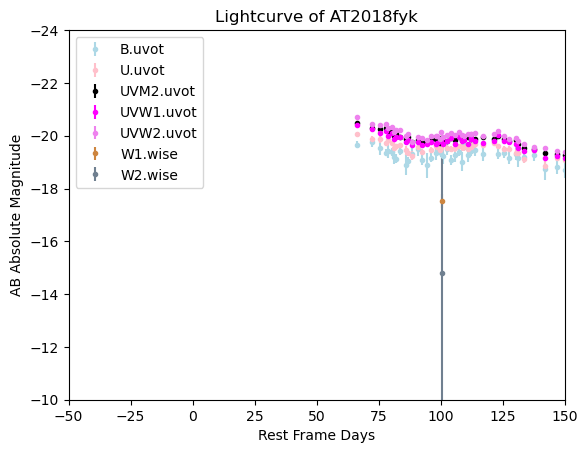

[-262.33246361  -62.71086007  100.68139188  300.74892739  464.0863365
  666.9603597   827.7632282  1030.81248079 1194.09829508 1394.24709465
 1557.82326063 1760.92887942 1924.18996988]


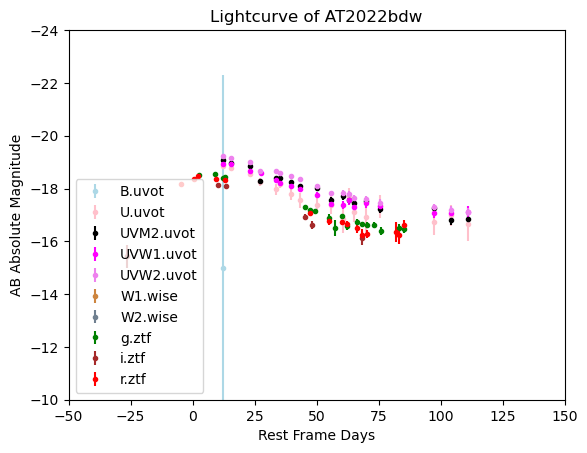

[-7.28179285e+02 -7.27234198e+02 -7.27233284e+02 -7.27171754e+02
 -7.23290837e+02 -7.23274090e+02 -7.22276458e+02 -7.21294476e+02
 -7.21281256e+02 -7.20293606e+02 -7.20292704e+02 -7.14318122e+02
 -7.14278498e+02 -6.88336796e+02 -6.87336574e+02 -6.82325575e+02
 -6.82324673e+02 -6.72328107e+02 -6.71325733e+02 -6.70364291e+02
 -6.62314053e+02 -6.59344464e+02 -6.55375127e+02 -6.45321762e+02
 -5.04109132e+02 -5.02177470e+02 -5.00118109e+02 -4.96121211e+02
 -4.91143960e+02 -4.87155077e+02 -4.85168188e+02 -4.83170091e+02
 -4.81137517e+02 -4.77272654e+02 -4.76132358e+02 -4.74178478e+02
 -4.71198491e+02 -4.70151856e+02 -4.68157044e+02 -4.61207812e+02
 -4.58217162e+02 -4.56167447e+02 -4.51211200e+02 -4.44208396e+02
 -4.42211248e+02 -4.42144803e+02 -4.42144340e+02 -4.42143877e+02
 -4.42143403e+02 -4.42142940e+02 -4.42142466e+02 -4.37328421e+02
 -4.33290961e+02 -4.32309938e+02 -4.32295261e+02 -4.32226838e+02
 -4.30300299e+02 -4.30228221e+02 -4.30206905e+02 -4.27313072e+02
 -4.24308843e+02 -4.24170

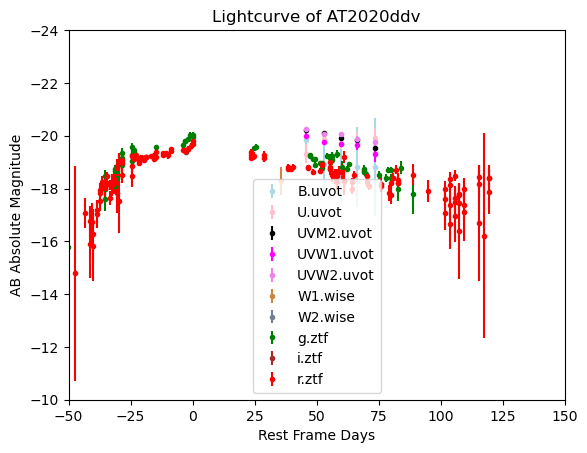

[-6.89003449e+02 -6.87963194e+02 -6.87029546e+02 -6.84025226e+02
 -6.83103802e+02 -6.83100455e+02 -6.80074210e+02 -6.77176233e+02
 -6.64382374e+02 -6.61414294e+02 -6.58446019e+02 -6.52516336e+02
 -6.40588535e+02 -6.40587633e+02 -6.35727395e+02 -6.28758304e+02
 -6.28757401e+02 -6.27829922e+02 -6.26840040e+02 -6.22897525e+02
 -5.22854986e+02 -5.19891145e+02 -5.11013809e+02 -4.86339289e+02
 -4.85359152e+02 -4.85358215e+02 -4.84354806e+02 -4.83411550e+02
 -4.82384663e+02 -4.82383714e+02 -4.81435065e+02 -4.80430434e+02
 -4.79417245e+02 -4.78470938e+02 -4.77446164e+02 -4.76458830e+02
 -4.76456442e+02 -4.74539801e+02 -4.71527175e+02 -4.70532735e+02
 -4.68557438e+02 -4.68556513e+02 -4.66577263e+02 -4.65680518e+02
 -4.65679581e+02 -4.61748616e+02 -4.61746239e+02 -4.61650041e+02
 -4.61649127e+02 -4.60706145e+02 -4.60664923e+02 -4.59701536e+02
 -4.58687182e+02 -4.58686279e+02 -4.53814354e+02 -4.53809533e+02
 -4.53776298e+02 -4.53775395e+02 -4.47833830e+02 -4.47832928e+02
 -4.43916198e+02 -4.40966

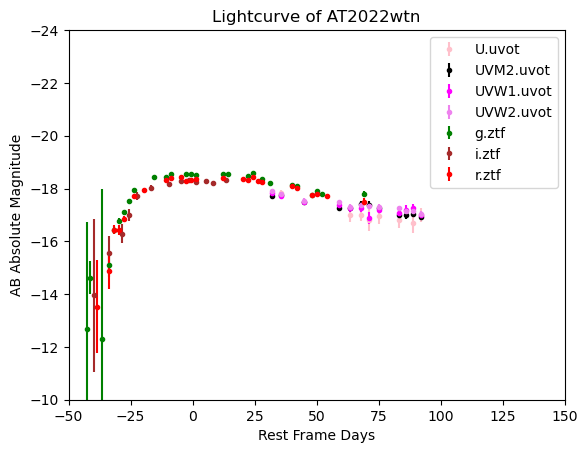

[-7.27954056e+02 -7.25837746e+02 -7.23869128e+02 -7.13885836e+02
 -7.11927137e+02 -7.07978514e+02 -7.00993349e+02 -6.99006062e+02
 -6.96995573e+02 -6.95010089e+02 -6.93011264e+02 -6.87004316e+02
 -6.86021048e+02 -6.83024470e+02 -6.81041124e+02 -6.79041860e+02
 -6.78031541e+02 -6.76990032e+02 -6.71039961e+02 -6.62027961e+02
 -6.58039606e+02 -6.54034651e+02 -6.52059409e+02 -6.33094325e+02
 -6.33091886e+02 -6.33089458e+02 -6.33087030e+02 -6.33084603e+02
 -6.31096795e+02 -6.31094402e+02 -6.31092009e+02 -6.31089616e+02
 -6.30097493e+02 -6.30095146e+02 -6.30090441e+02 -6.29099993e+02
 -6.29097612e+02 -6.29095242e+02 -6.29092872e+02 -6.29090503e+02
 -6.28097211e+02 -6.28094830e+02 -6.28092472e+02 -5.46814072e+02
 -5.46812118e+02 -5.46810164e+02 -5.46808211e+02 -5.46806257e+02
 -5.44813050e+02 -5.44811097e+02 -5.07940772e+02 -5.05933138e+02
 -5.03917158e+02 -4.89963233e+02 -4.87910712e+02 -4.84970351e+02
 -4.81991078e+02 -4.79943100e+02 -4.77959083e+02 -4.75959889e+02
 -4.71942287e+02 -4.69933

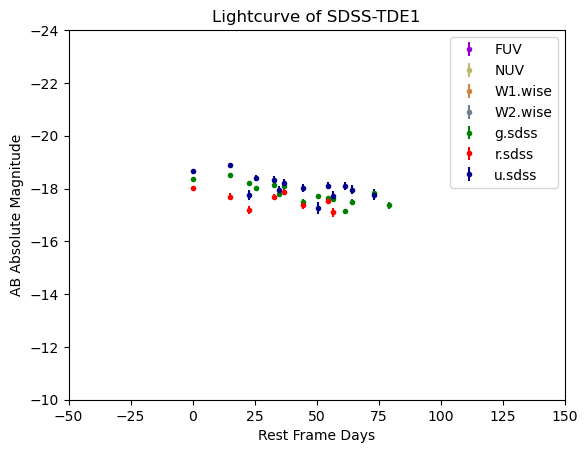

[1.65118137e-03 1.48687828e+01 2.28819529e+01 2.57405838e+01
 3.27183443e+01 3.46316012e+01 3.66799115e+01 4.45467737e+01
 5.05453969e+01 5.44394374e+01 5.64089666e+01 6.13609256e+01
 6.43321010e+01 7.32456273e+01]


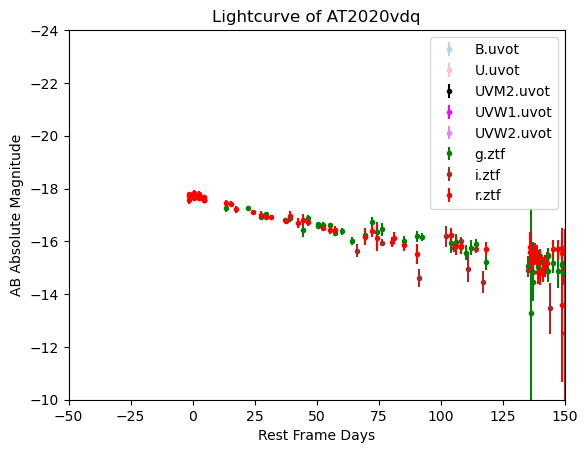

[-7.21807942e+02 -7.14799551e+02 -6.89828310e+02 -6.88835451e+02
 -6.88834515e+02 -6.87813455e+02 -6.86866291e+02 -6.85827980e+02
 -6.85827044e+02 -6.84859044e+02 -6.83837591e+02 -6.81865343e+02
 -6.80829646e+02 -6.79826150e+02 -6.79825213e+02 -6.77886947e+02
 -6.76851319e+02 -6.74839470e+02 -6.73831210e+02 -6.73830285e+02
 -6.71831224e+02 -6.68926705e+02 -6.64908372e+02 -6.64907435e+02
 -6.64840327e+02 -6.64839402e+02 -6.63888318e+02 -6.63842404e+02
 -6.62869768e+02 -6.61850281e+02 -6.61849321e+02 -6.56906914e+02
 -6.56905989e+02 -6.56852201e+02 -6.50859828e+02 -6.50858915e+02
 -6.47859052e+02 -6.47858069e+02 -6.46894578e+02 -6.43909954e+02
 -6.40866351e+02 -6.40865391e+02 -6.39984121e+02 -6.39852830e+02
 -6.35959278e+02 -6.31958532e+02 -6.30966922e+02 -6.25948168e+02
 -6.25947209e+02 -6.24981232e+02 -6.19927850e+02 -6.18902131e+02
 -6.09899674e+02 -6.09897743e+02 -6.08969853e+02 -6.06903326e+02
 -6.06007660e+02 -6.05161434e+02 -6.04202314e+02 -6.04163997e+02
 -6.03152465e+02 -5.55237

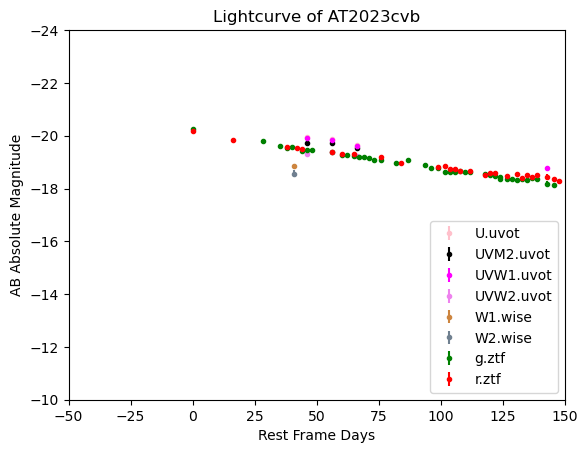

[-7.22896958e+02 -7.18871968e+02 -7.11952542e+02 -7.08927891e+02
 -7.05910594e+02 -7.02928729e+02 -6.99964042e+02 -6.97946173e+02
 -6.94971743e+02 -6.92963536e+02 -6.91962077e+02 -6.90966748e+02
 -6.88980535e+02 -6.88978665e+02 -6.85014735e+02 -6.85013800e+02
 -6.83014322e+02 -6.80074711e+02 -6.78018363e+02 -6.77031115e+02
 -6.75046230e+02 -6.73046082e+02 -6.70075865e+02 -6.68081790e+02
 -6.65063928e+02 -6.61073445e+02 -6.58144063e+02 -6.55159450e+02
 -6.52219942e+02 -6.50127135e+02 -6.48190958e+02 -6.46157665e+02
 -6.44205035e+02 -6.41194608e+02 -6.38162823e+02 -6.36205922e+02
 -6.32232133e+02 -6.28209683e+02 -6.24285884e+02 -6.22282515e+02
 -6.15293069e+02 -6.13294849e+02 -6.11312330e+02 -6.07339777e+02
 -6.05366367e+02 -6.03407388e+02 -5.87383047e+02 -5.85348784e+02
 -5.80378812e+02 -5.78365699e+02 -5.75380786e+02 -5.66513499e+02
 -5.64483299e+02 -5.62557501e+02 -5.60519659e+02 -5.56552820e+02
 -5.54552488e+02 -5.52560236e+02 -5.50517788e+02 -5.48637557e+02
 -5.46572319e+02 -5.44641

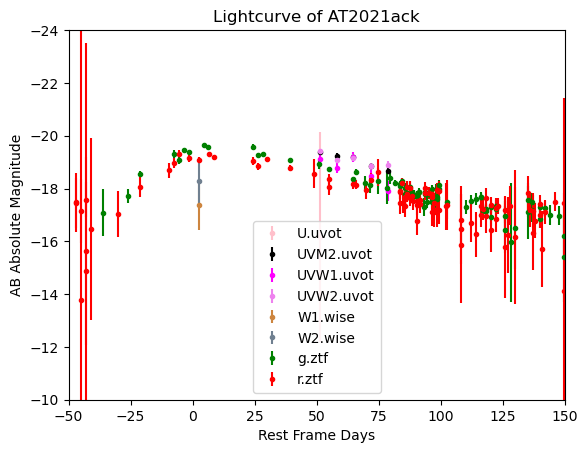

[-710.13306943 -710.13216315 -679.53558518 -671.520026   -638.91710328
 -638.9162085  -635.99992994 -633.98056541 -625.0607964  -623.13996991
 -623.13830652 -622.07129676 -621.11437651 -618.15282079 -327.56239359
 -327.56149881 -309.7783993  -133.65875421 -133.64882015 -131.68390961
 -131.67384939 -131.66381206 -127.72272626 -127.71805751 -127.71337716
 -127.70870841 -127.70405105  -47.02407396  -47.0194396   -45.04825431
  -45.03781548  -43.06829358  -43.06364772  -43.05900186  -43.05435601
  -41.07479667  -41.07016231  -30.21679936  -21.29126027   -9.37747194
   -7.45611778   -5.4686204    -1.50209146    2.52133498    6.46793842
    8.41600911   24.26561784   26.24584241   30.15145904   39.16177066
   48.98014008   54.92907325   54.9309316    64.79656258   65.78513194
   69.77633561   71.73631347   74.73203047   83.54042519   83.64242758
   83.64662605   84.5731016    84.64182578   85.5631508    85.56407997
   85.70303117   86.5182585    86.60227402   87.5538142    87.55475487
   88.

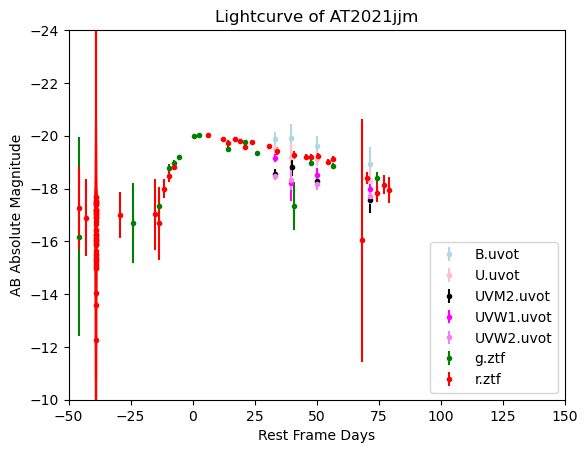

[-696.34878002 -679.58960764 -673.68087281 -670.71628575 -651.95886052
 -644.11256189 -641.13026918 -421.43635546 -376.10011797 -353.34822299
 -347.4612658  -338.61486863 -324.79588647 -320.88376887 -297.18608204
 -294.24184276 -281.42055735  -51.83659264  -45.90839074  -42.96876094
  -39.03117142  -39.03070251  -39.03024496  -39.02977604  -39.0293185
  -39.02884958  -39.02838057  -39.02792312  -39.02745411  -39.02699666
  -39.02652765  -39.0260702   -39.02560118  -39.02514373  -39.02467472
  -39.02421727  -39.02374826  -39.02327935  -39.0228218   -39.02235288
  -39.02189534  -39.02142642  -39.02095741  -39.02049996  -39.02003095
  -39.0195735   -39.01910449  -39.01864704  -39.01817802  -39.01772057
  -39.01725156  -39.01679411  -39.0163251   -39.01585619  -39.01539864
  -39.01492972  -39.01447218  -39.01400326  -39.01354571  -39.0130768
  -39.01260789  -39.01215034  -39.01168142  -39.01122388  -39.01075496
  -39.01029741  -39.0098285   -39.00937095  -39.00890204  -39.00844449
  -39.00

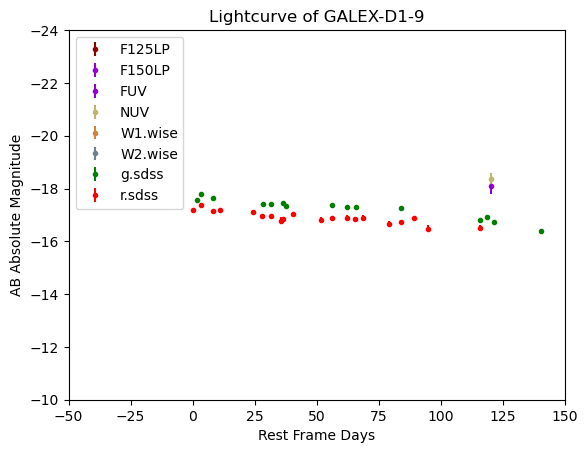

[-1.89073956e-03  3.44540012e+00  8.28414293e+00  1.10419756e+01
  2.45177490e+01  2.79650399e+01  3.17633276e+01  3.55616154e+01
  3.66020704e+01  4.04003582e+01  5.17952214e+01  5.62829673e+01
  6.21496296e+01  6.56094561e+01  6.87182857e+01  7.90726938e+01
  8.38989010e+01  8.94271020e+01  9.49553030e+01  1.15676655e+02
  3.60835446e+02  3.74988141e+02]


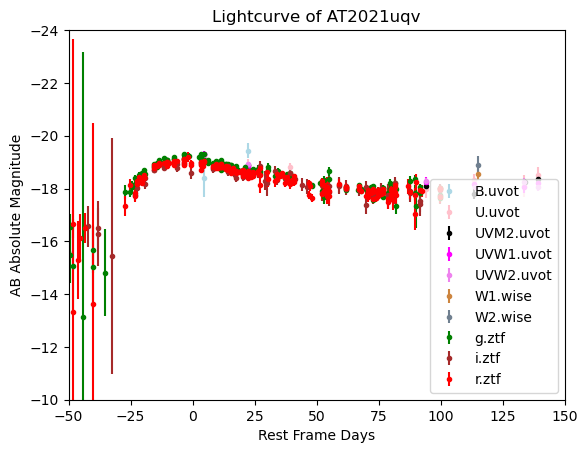

[-721.47177117 -721.47132231 -718.4031389  ...  984.94960905  984.95008098
  984.95054127]


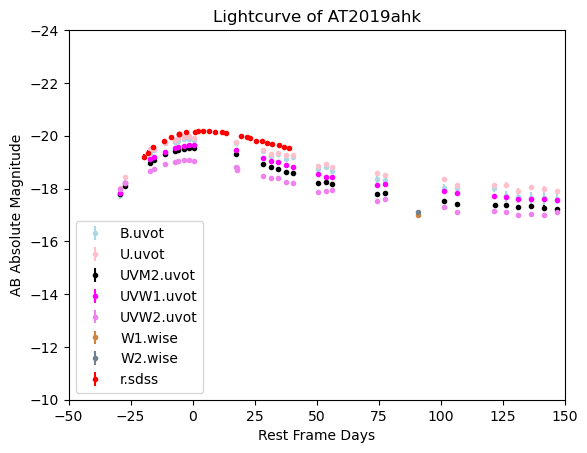

[-19.73331164 -17.80471792 -15.90689962 -11.75221633  -8.74648249
  -5.45351128  -5.43299433  -5.38170194  -2.58113765   0.75286747
   2.21982972   4.22023279   6.40528844   9.01094167  12.00641703
  13.39131147  19.40277915  21.78274587  23.0342801   25.42450531
  27.78395508  29.98952769  31.79501969  34.72894419  36.85244899
  38.85285205]


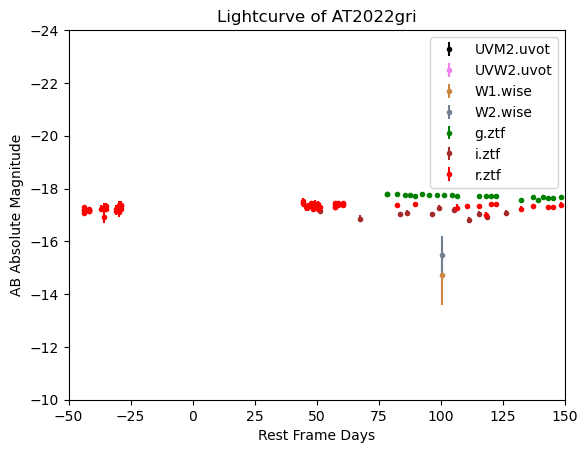

[-675.19735444 -675.19240268 -673.18043714 -671.19372798 -671.18849853
 -671.1834774  -665.2242291  -664.24910238 -646.20638758 -642.19531035
 -642.1939105  -641.23244732 -640.19411618 -640.17892534 -639.23118367
 -636.26057804 -635.20632714 -634.30109191 -634.20085342 -633.20821037
 -632.20537461 -631.20993165 -630.24146891 -626.2313752  -625.22705842
 -621.2281755  -619.22389225 -618.19125328 -617.25135573 -615.2278902
 -615.22695307 -611.37267773 -611.32497654 -610.23110009 -608.26638452
 -608.26544738 -605.27851715 -603.26717646 -603.26621614 -597.2170495
 -597.21611237 -595.3013425  -593.26525462 -593.25937722 -591.21989937
 -591.21896224 -590.32206873 -586.33575028 -586.33482475 -584.29361147
 -583.26569295 -581.35588644 -581.35494931 -579.26827936 -579.26723807
 -572.43719712 -572.33967747 -571.37446586 -567.23858807 -567.23766244
 -567.23150745 -566.43705056 -566.39228802 -564.4343176  -564.35674382
 -564.34740718 -564.34647005 -562.45590379 -562.30753598 -562.30658736
 -561.43

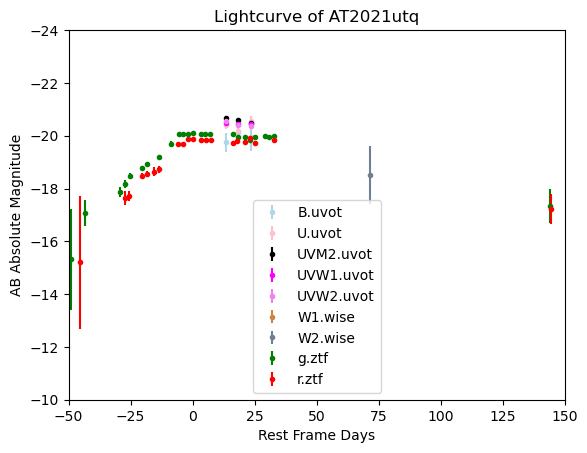

[-7.21925809e+02 -7.18922605e+02 -7.16884004e+02 -7.15897646e+02
 -7.15896165e+02 -7.14989539e+02 -7.11004776e+02 -7.10012621e+02
 -7.09020569e+02 -7.08028632e+02 -7.05052442e+02 -7.04060504e+02
 -7.03068843e+02 -7.02077078e+02 -7.01086162e+02 -7.00093077e+02
 -6.99101186e+02 -6.98109938e+02 -6.95134608e+02 -6.91158135e+02
 -6.89181791e+02 -6.88190899e+02 -6.87199272e+02 -6.86206118e+02
 -6.84257672e+02 -6.81273836e+02 -6.74354361e+02 -6.16444302e+02
 -6.16443327e+02 -6.14445607e+02 -6.13437482e+02 -6.13436587e+02
 -5.99573576e+02 -5.97523379e+02 -5.90709513e+02 -5.90708571e+02
 -5.87751966e+02 -5.85686628e+02 -5.85685732e+02 -5.83661194e+02
 -5.82711528e+02 -5.82710644e+02 -5.78705710e+02 -5.77673064e+02
 -5.76736485e+02 -5.74716677e+02 -5.73723029e+02 -5.72787977e+02
 -5.69773420e+02 -5.68759888e+02 -5.66777609e+02 -5.65793996e+02
 -5.64851849e+02 -5.64830151e+02 -5.64829083e+02 -5.63837135e+02
 -5.63830338e+02 -5.63787333e+02 -5.62856115e+02 -5.62855151e+02
 -5.62838137e+02 -5.61937

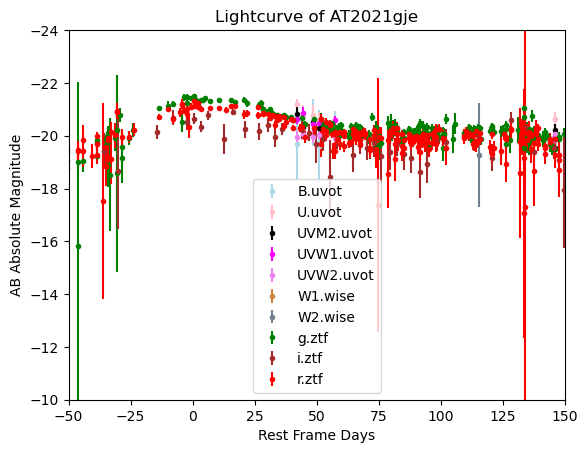

[-6.77376862e+02 -6.77368043e+02 -6.75597506e+02 -6.75579394e+02
 -6.75555651e+02 -6.74588222e+02 -6.73745614e+02 -6.73734332e+02
 -6.72796914e+02 -6.72777073e+02 -6.71911522e+02 -6.71905070e+02
 -6.71884785e+02 -6.71883931e+02 -6.69987990e+02 -6.69967133e+02
 -6.69957244e+02 -6.67197989e+02 -6.67164844e+02 -6.67157193e+02
 -6.65352916e+02 -6.65329984e+02 -6.65310142e+02 -6.62595196e+02
 -6.62517158e+02 -6.62515959e+02 -6.62513322e+02 -6.61610368e+02
 -6.61594233e+02 -6.61570555e+02 -6.60691495e+02 -6.60578184e+02
 -6.54144313e+02 -6.54124309e+02 -6.54123445e+02 -6.52302839e+02
 -6.52294009e+02 -6.52278339e+02 -6.51341300e+02 -6.47568049e+02
 -6.47536460e+02 -6.47531046e+02 -6.43874207e+02 -6.43839550e+02
 -6.42996714e+02 -6.42978905e+02 -6.42957356e+02 -6.42026714e+02
 -6.41101541e+02 -6.33620161e+02 -6.32655067e+02 -6.29032714e+02
 -6.29009219e+02 -6.28984698e+02 -6.28983834e+02 -6.26251261e+02
 -6.26224589e+02 -6.26223725e+02 -6.25354953e+02 -6.25255324e+02
 -6.24329318e+02 -6.24324

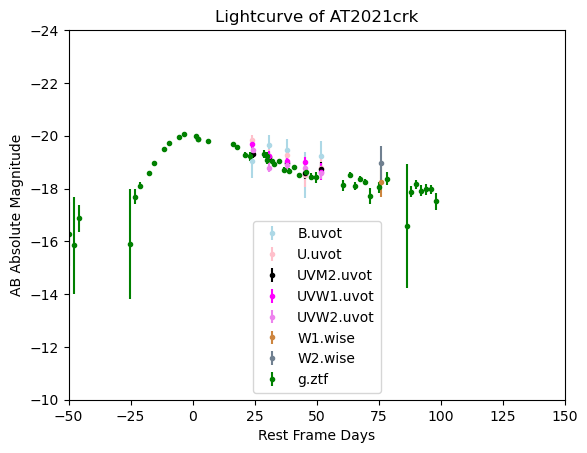

[-690.28232182 -685.36215329 -679.51557479 -668.54763177 -665.66626027
 -660.68372965 -657.67782837 -653.82912392 -633.02865342 -633.02773871
 -632.05072094 -631.08449721 -630.04686684 -630.04596349 -627.10203557
 -624.16509388 -617.27336144 -608.36391654 -604.40590123 -598.48574375
 -590.59909905 -587.62553359 -475.63250778 -465.74649115 -462.81492362
 -440.07177177 -431.20674874 -416.36467166 -413.4212125  -409.48638572
 -409.46444355 -407.57186695 -407.53496884 -404.61330328 -404.61239993
 -402.5305646  -401.67138774 -401.66390972 -397.69807349 -397.69399143
 -395.79846492 -395.75781629 -394.77255457 -392.82015431 -392.81187599
 -391.84761881 -391.81068641 -390.83679025 -390.72986906 -389.7670412
 -389.73374482 -388.80428199 -388.80290988 -388.78063606 -387.8140807
 -387.77816586 -385.81896223 -383.88083181 -382.87666941 -382.87577752
 -377.95544896 -377.95455707 -377.93762303 -377.04820274 -377.01292817
 -375.96006751 -375.93920009 -375.05806959 -375.0571777  -375.03714497
 -374.00

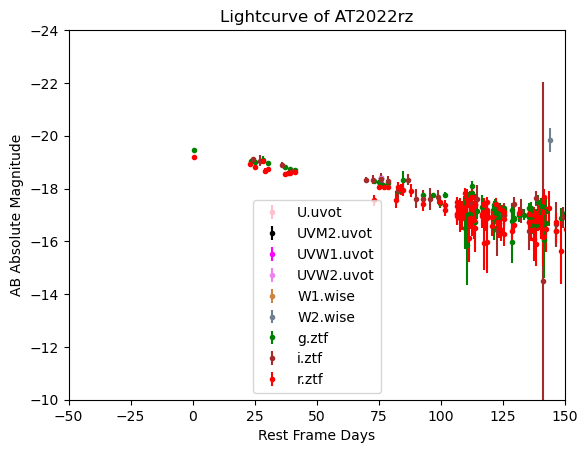

[-7.24283841e+02 -7.23255681e+02 -7.20290004e+02 -7.17305466e+02
 -7.14321331e+02 -7.11347979e+02 -7.08365018e+02 -7.02412663e+02
 -6.97457122e+02 -6.96470929e+02 -6.92491258e+02 -6.91478898e+02
 -6.87539273e+02 -6.84534367e+02 -6.83579521e+02 -6.81536319e+02
 -6.59743346e+02 -6.54788058e+02 -6.52761370e+02 -6.42844142e+02
 -6.41828560e+02 -6.40868731e+02 -6.39959675e+02 -6.34900082e+02
 -6.34013016e+02 -6.31937811e+02 -6.31017891e+02 -6.28999753e+02
 -6.27981984e+02 -6.26000290e+02 -6.25998874e+02 -6.25004627e+02
 -6.25002762e+02 -6.23976581e+02 -6.23975626e+02 -6.23059953e+02
 -6.23058998e+02 -6.22116776e+02 -6.22097374e+02 -6.22096914e+02
 -6.22062126e+02 -6.22061171e+02 -6.21011733e+02 -6.21010801e+02
 -6.20112239e+02 -6.20111768e+02 -6.20111307e+02 -6.19017093e+02
 -6.18155172e+02 -6.18150396e+02 -6.17112799e+02 -6.17108933e+02
 -6.16163432e+02 -6.16162499e+02 -6.15169805e+02 -6.15164616e+02
 -6.11193299e+02 -6.11185335e+02 -6.10174505e+02 -6.09158255e+02
 -6.05250104e+02 -6.05243

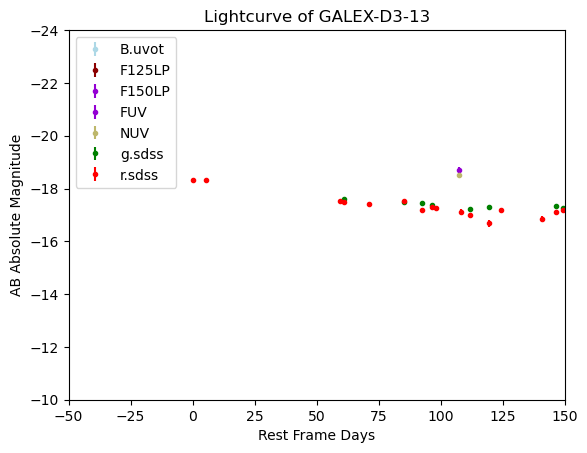

[1.35203501e-11 5.43441521e+00 5.93840313e+01 6.10894450e+01
 7.12710192e+01 8.51815949e+01 9.26395980e+01 9.63813265e+01
 9.80740132e+01 1.08255587e+02 1.11984589e+02 1.19455319e+02
 1.24202478e+02 1.40836625e+02 1.46601941e+02 1.49312785e+02
 1.53054514e+02 1.63236088e+02 1.66965089e+02 1.67639619e+02
 1.73417662e+02 1.95473497e+02 3.65823960e+02]


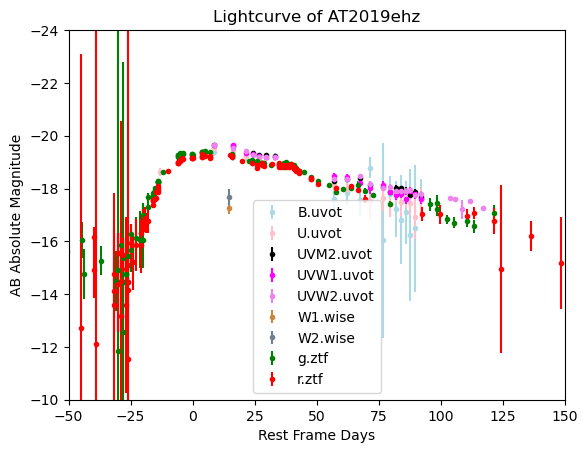

[-4.12859083e+02 -4.12819089e+02 -3.95035123e+02 -3.93982473e+02
 -3.93954472e+02 -3.93953548e+02 -3.93927520e+02 -3.93922292e+02
 -3.93886049e+02 -3.93826479e+02 -3.93000324e+02 -3.92975843e+02
 -3.92951950e+02 -3.92934048e+02 -3.92933125e+02 -3.92911367e+02
 -3.92901545e+02 -3.92839435e+02 -3.92001058e+02 -3.91954519e+02
 -3.91948471e+02 -3.91947547e+02 -3.91914975e+02 -3.91911131e+02
 -3.91888808e+02 -3.88997844e+02 -3.88995951e+02 -3.88995005e+02
 -3.88981085e+02 -3.88980162e+02 -3.88967811e+02 -3.88959351e+02
 -3.88920395e+02 -3.88902528e+02 -3.88879431e+02 -3.87997574e+02
 -3.87896809e+02 -3.87003189e+02 -3.86879721e+02 -3.85030430e+02
 -3.85029495e+02 -3.85028572e+02 -3.84995399e+02 -3.84982137e+02
 -3.84978905e+02 -3.84977070e+02 -3.84953385e+02 -3.84932043e+02
 -3.84911302e+02 -3.84020175e+02 -3.81949064e+02 -3.81948083e+02
 -3.81945336e+02 -3.81931427e+02 -3.81052005e+02 -3.80035540e+02
 -3.79995188e+02 -3.79994276e+02 -3.79972669e+02 -3.79947934e+02
 -3.79087591e+02 -3.78077

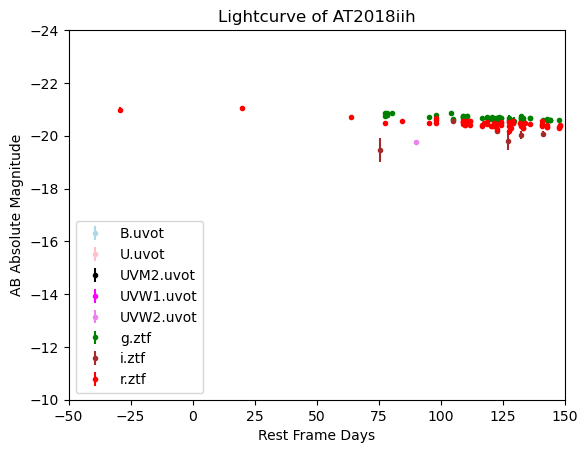

[-257.66342473 -256.70180945 -256.66898502 ... 1936.27679765 1938.23399506
 1940.11057896]


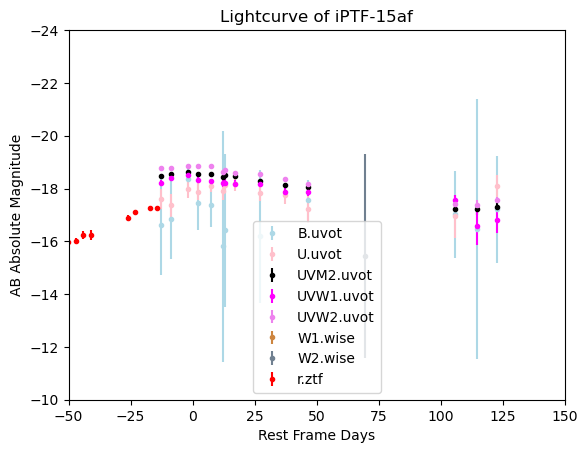

[-50.1162087  -47.12603968 -44.13587065 -41.14570163 -26.1948565
 -23.20468747 -17.22434942 -14.23418039]


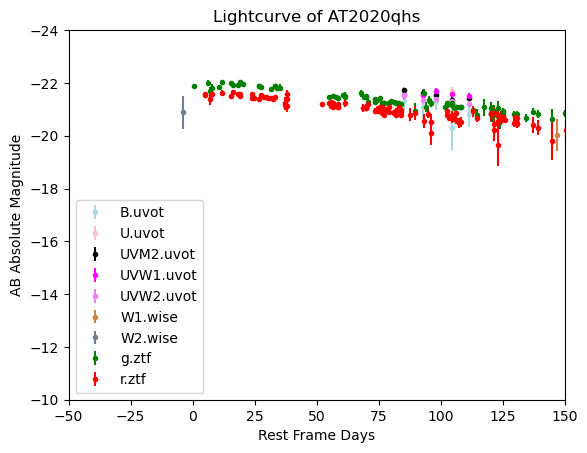

[-676.26243055 -673.41072958 -669.67403722 -669.67317896 -668.73358774
 -667.81476742 -666.85640405 -666.85551322 -665.97318324 -664.99981753
 -664.09822667 -664.0973793  -663.08444885 -661.20513595 -661.20255047
 -660.26417587 -659.42123679 -659.34568152 -658.44951147 -657.552027
 -657.55116874 -657.47166994 -656.57286016 -656.53292609 -655.65115007
 -655.59082532 -654.69353636 -654.69266731 -650.93921254 -650.93835437
 -649.97817678 -648.06624095 -647.12952852 -646.20591738 -645.30949757
 -645.30863931 -644.36999317 -643.44879377 -642.50943063 -642.48970261
 -641.59405405 -640.60930336 -639.73151434 -639.73065609 -638.76015827
 -636.86823299 -636.86737473 -635.95936354 -634.99858853 -634.06124601
 -634.06038785 -632.24308354 -631.2861108  -631.28525255 -630.20727168
 -629.4714572  -628.48979171 -625.71400464 -624.82513485 -618.12619496
 -594.72070311 -591.94103773 -589.15368107 -588.15437341 -586.3164068
 -585.34162886 -580.67998908 -580.67912003 -576.94539328 -571.25537524
 -571.254

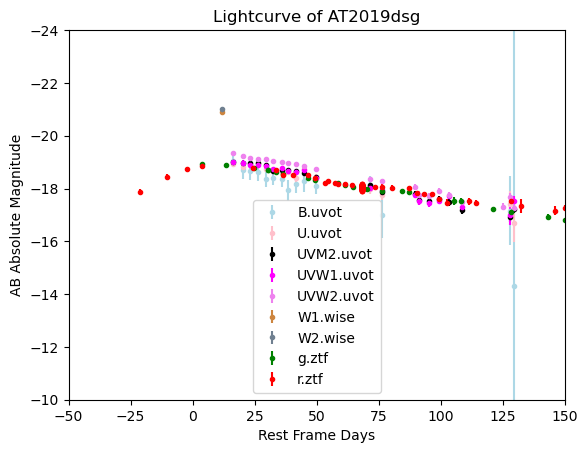

[-374.91619098 -358.91338811 -355.93659154 -350.92014725 -347.94701477
 -344.97162846 -341.93095738 -340.93424556 -339.99794041 -337.04572966
 -337.04481646 -334.98662828 -334.00776343 -334.00685023 -332.99152855
 -331.97334034 -330.95057474 -330.94966154 -330.03216279 -328.97272086
 -328.03418494 -328.03320243 -326.99216224 -326.03989425 -324.97856819
 -324.97765509 -324.0209023  -322.97927257 -322.00291593 -322.00200283
 -320.06253603 -316.00990696 -312.99159082 -309.99731721 -307.11642479
 -303.06621155 -300.09910126 -293.08339601 -290.10634518 -287.13443799
 -284.14731928 -281.1044405  -277.16768935 -274.14939638 -271.17469197
 -265.19329964 -256.11421633 -253.16925286 -250.32588066 -250.24466782
 -247.25000123 -244.27150549 -244.20551576 -241.21984195 -238.34691357
 -235.28063962 -232.26515536 -229.39646912 -226.29296396 -220.26463098
 -217.35111931 -203.45035901 -180.50575841 -173.5522285  -170.5532273
 -147.5270787  -121.62765498 -121.62274243 -121.61782989 -121.61291734
 -120.6

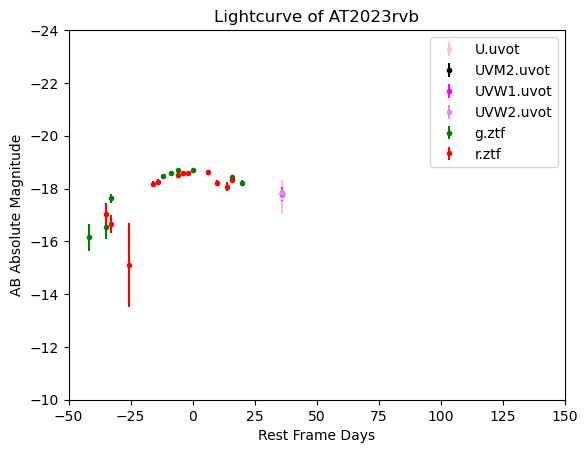

[-726.54503508 -724.55149235 -716.59733533 -714.64340569 -484.10354107
 -482.06354449 -476.12950829 -473.13937295 -471.14591095 -468.15557947
 -466.18288146 -464.2533726  -462.17596619 -457.26025556 -453.26301869
 -450.32060596 -446.35422679 -444.31940973 -442.35296395 -440.35372265
 -429.35335595 -426.42101371 -422.39069286 -418.46835639 -400.52633289
 -396.53925889 -387.60212133 -379.72280711 -361.80292042 -359.8088354
 -357.75848    -355.84258311 -353.80743146 -343.88239916 -121.33582015
 -117.32705914 -114.36364023 -112.33217996  -94.46520686  -91.51708409
  -88.50748821  -86.4931467   -84.43613522  -80.52102014  -73.55416963
  -68.57277553  -61.65906944  -59.68680977  -55.61658731  -53.73467418
  -45.669176    -43.74020933  -34.85291699  -32.83814871  -25.81747325
  -15.93685291  -13.85955035   -5.98957994   -3.95554736   -1.98326457
    6.01050553    9.95677821   13.92278831   15.95803215]


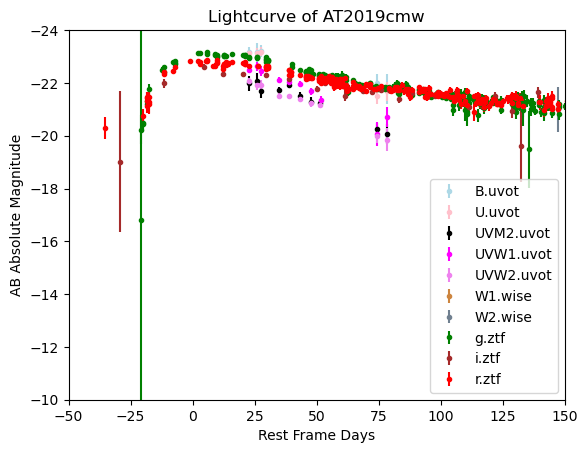

[-328.31347389 -328.29644962 -328.27156728 ... 1590.34565935 1592.92503933
 1594.64074156]


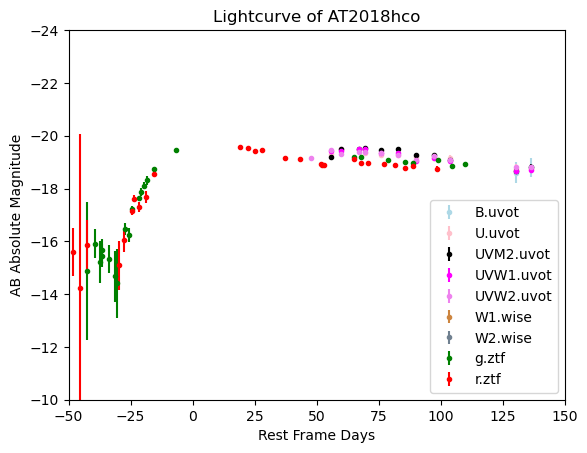

[-127.07017061 -120.09443345 -114.11646545 -105.16336003 -102.17608229
  -99.23572839  -96.24865824  -93.21172438  -90.25175927  -87.22548998
  -84.23807397  -81.22602002  -78.2412788   -76.3177863   -72.32736693
  -69.31540522  -68.33797356  -68.31283994  -67.34085009  -67.34038889
  -66.27210735  -60.32869228  -57.39607436  -54.35149668  -51.36465712
  -48.34763423  -45.42172627  -42.52209338  -39.53565736  -37.49256117
  -36.53265386  -36.51948754  -35.55696302  -33.49642327  -31.56451455
  -30.45893607  -29.54627525  -27.54624056  -24.54226873  -23.6340005
  -21.60699913  -18.67935025  -15.69023945   19.2045986    22.13999501
   25.14819815   28.13080649   37.10228954   43.13355685   51.95234748
   51.96489123   52.96615368   64.91345431   67.82862857   70.84795739
   76.97404063   81.76280913   85.76815875   88.74042546   98.70143427
  247.46068244  250.44249527  253.39534689  256.40996017  261.37794967
  264.37733297  267.39773401  276.34017497  283.30321846  286.28957379
  289.2

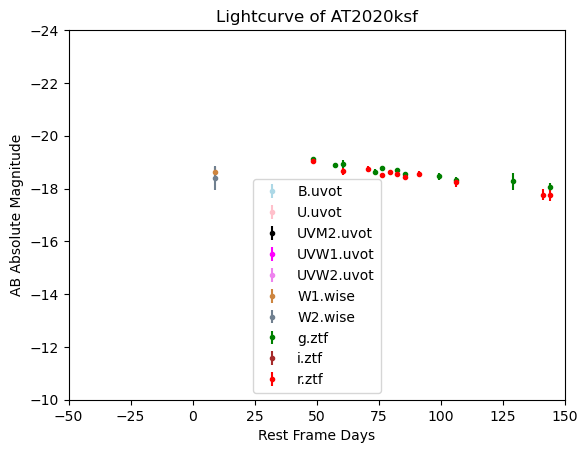

[-697.98732264 -695.00493766 -690.0059004  -675.05055826 -668.14510563
 -663.22981481 -652.21546944 -649.22923585 -646.28234056 -636.32889321
 -633.38378384 -630.39529185 -622.34526404 -616.43764622 -613.42485307
 -606.54473867 -603.57930339 -600.54979091 -597.51543895 -594.59357077
 -591.56563685 -588.64542786 -578.7321023  -544.03993911 -535.0518558
 -524.06529154 -484.30207485 -484.29710863 -484.29213087 -315.69866039
 -306.75549226 -300.74297259 -293.75494897 -290.95455203 -287.94640254
 -277.92394622 -274.96210608 -271.96647009 -268.9736341  -262.93203133
 -248.06840921 -244.0853548  -236.26175782 -233.20133023 -224.1882889
 -221.30551689 -218.31647187 -210.313295   -207.41611963 -197.41241068
 -194.48759268 -183.49520941 -179.53479696 -156.75770141 -122.91689766
 -122.91209272 -122.90727624   48.69557663   60.6618391    70.51417557
   76.50840882   79.49476914   82.48213188   85.42622728   91.44799962
  106.31187531  141.07607783  144.08201501  157.97902865  160.00804461
  163.91

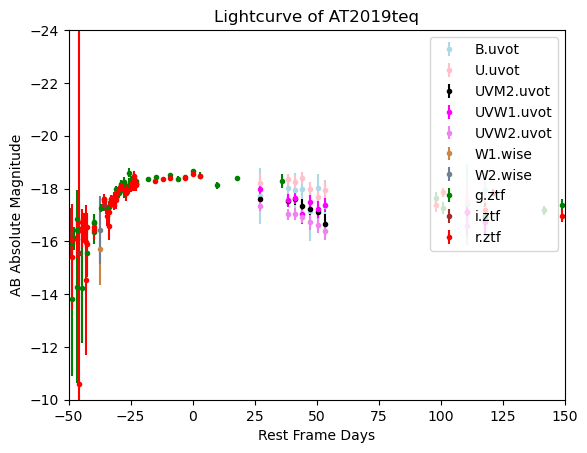

[-594.40552689 -593.42867756 -593.40886935 ... 1638.98400402 1641.98518358
 1643.98145032]


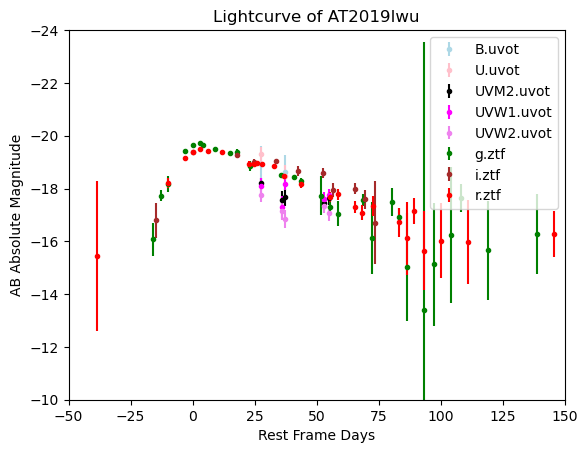

[-4.20007609e+02 -4.17032478e+02 -4.11093514e+02 -4.02109924e+02
 -3.99134689e+02 -3.90216629e+02 -3.87220474e+02 -3.76315563e+02
 -3.73312466e+02 -3.63380526e+02 -3.56492731e+02 -3.53534497e+02
 -3.53474828e+02 -3.53474380e+02 -3.50595424e+02 -3.46621264e+02
 -3.43622856e+02 -3.40600747e+02 -3.35671295e+02 -3.34704635e+02
 -3.34663668e+02 -3.29760137e+02 -3.26781385e+02 -3.23764954e+02
 -3.20844732e+02 -3.17847474e+02 -3.14862434e+02 -3.11903660e+02
 -3.08902884e+02 -3.05945271e+02 -2.99954720e+02 -2.99022750e+02
 -2.59391879e+02 -2.55402316e+02 -2.46542522e+02 -2.33578047e+02
 -2.14728208e+02 -2.07823412e+02 -1.86972814e+02 -1.86967987e+02
 -1.86963170e+02 -1.86958354e+02 -1.84972309e+02 -1.80006695e+02
 -1.79027414e+02 -3.86313556e+01 -3.56697995e+01 -2.57223304e+01
 -2.28279831e+01 -9.84990994e+00 -2.91806756e+00  6.16500538e-02
  3.02007969e+00  6.01608507e+00  1.19792905e+01  2.28637864e+01
  2.48710508e+01  2.57953187e+01  2.78928155e+01  3.27955998e+01
  3.66346294e+01  4.37127

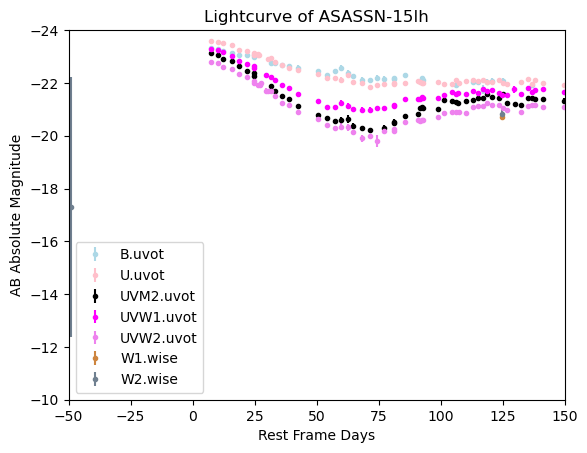

[-226.50938532  -49.02653206  124.86237977  305.12693325  474.6634865
  662.23525342  825.31994052 1016.50561052 1176.04136744 1372.7847293
 1530.51520308 1727.70261875 1887.25735893 2081.91560413 2241.381961
 2438.82147569 2598.29956206 2793.08999701 2952.59741597]


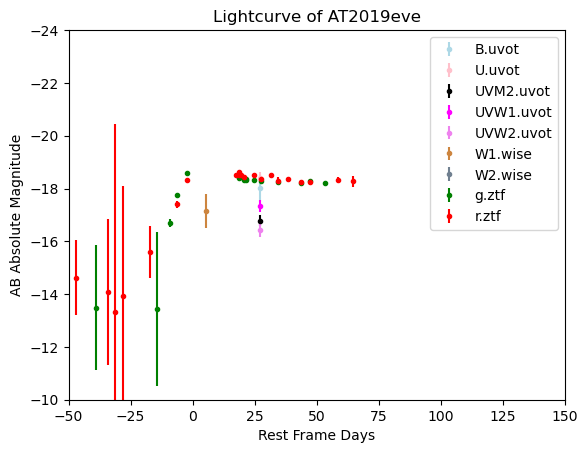

[-394.93870626 -394.9116895  -389.00689151 -385.98970196 -371.03590758
 -368.1317223  -355.13774983 -334.24189692 -330.23083244 -323.19720257
 -320.22213003 -317.23486419 -183.43121327 -166.49498698 -166.44687128
 -164.51329331 -163.43781442 -152.47273993 -149.48254392 -142.50758498
 -139.56114425 -137.6204256  -132.57629915 -132.56221403 -127.61752582
 -122.59076061 -120.65642126 -119.68690982 -111.62679354 -108.63644763
 -105.71058665 -105.69729748 -102.80234076 -100.76406422  -55.0873337
  -47.13273496  -34.18401718  -31.16449737  -28.21543804  -20.13967911
  -17.13714      -6.26924265   -2.32470481   17.59488817   18.58330671
   18.60028732   19.59641177   20.6464082    24.57251186   27.59899933
   31.58453519   34.57962225   38.53553431   43.51282265   47.49562459
   58.48980382   64.46341266  158.48479508  162.4680238   162.47277662
  164.45790786  164.46788632  168.44810425  168.45294926  168.45780583
  170.42522969  177.40477988  184.3511993   197.37345753  213.33492361
  218.2

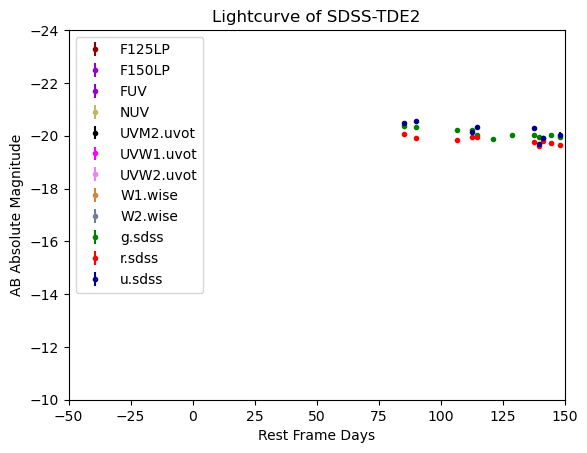

[ 85.37216296  90.25359479 112.51680005 114.4548375  137.54170868
 139.51608433 141.45412179 148.23725288]


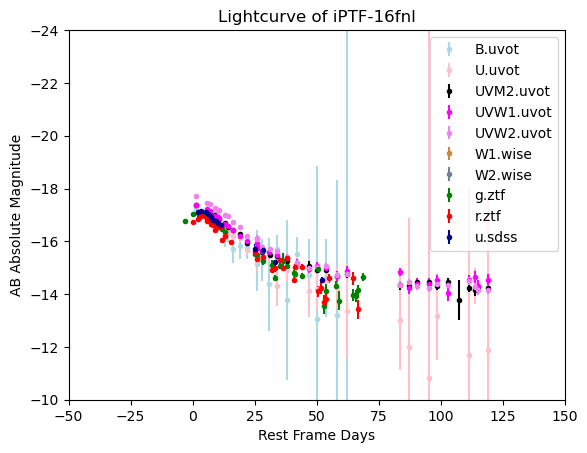

[ 2.24552463  3.54621581  5.25337298  6.35083116  7.34667284  8.25105967
  9.24690135 10.25290468 11.24874636 25.24133815 28.24918649 33.24871819
 52.13922518]


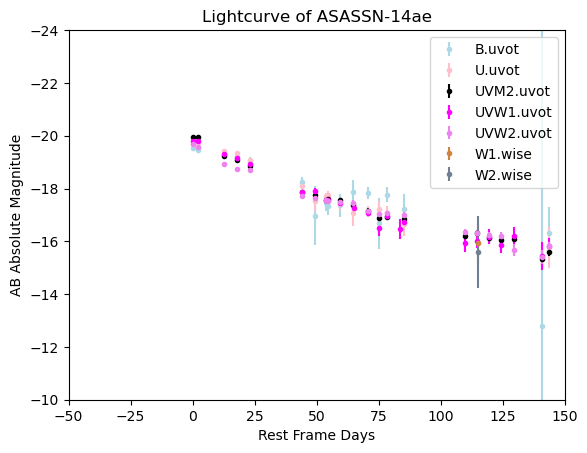

[ 114.85908152  305.01820308  473.33504496  666.49516122  831.86061017
 1033.23845081 1195.01605997 1397.20856136 1555.13308009 1760.9884977
 1919.04999841 2127.64514001 2284.31371137 2491.53335224 2649.47326007
 2858.20180749 3013.41133125 3222.09488491 3380.2227275  3585.88047292]


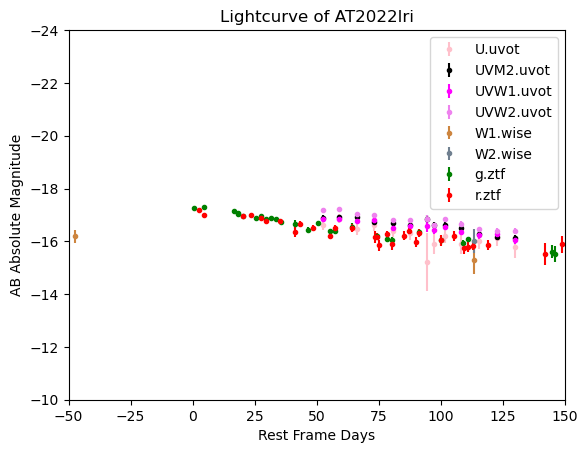

[-726.11424362 -692.16689432 -688.16804022 -688.16710323 -685.23101029
 -685.23007329 -683.2352791  -680.21943739 -679.26921984 -677.25775642
 -673.2416662  -672.3034328  -671.24609693 -667.32596205 -666.28758586
 -664.26642856 -664.26549157 -655.28494438 -654.32917423 -653.31330902
 -652.31709764 -651.28479458 -644.33980665 -638.34261856 -637.38476622
 -629.38250018 -623.39187106 -604.46229338 -601.44521394 -599.52993714
 -589.53131534 -361.28211101 -359.30407859 -355.28559386 -353.30738804
 -338.31368906 -335.40091687 -333.36128581 -324.4274148  -319.42930695
 -318.44916332 -310.46154219 -304.48010952 -301.52395798 -299.5248606
 -298.52388328 -297.50381894 -292.54335292 -290.46537441 -285.49092273
 -284.55403131 -280.59801285    2.48055115    4.50040126   20.45390751
   23.45875974   27.50869754   29.50869723   35.37859264   41.37272678
   43.37425345   48.32928268   55.32611771   57.34666194   64.31583825
   73.33075353   74.2920647    75.31564566   78.27238718   80.29825255
   85.2

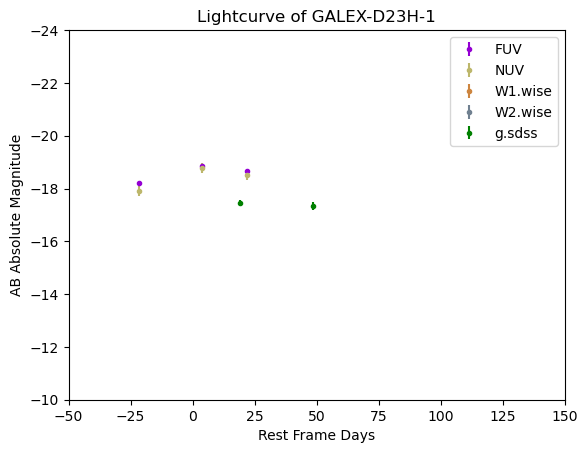

[19.02027365 48.44627347]


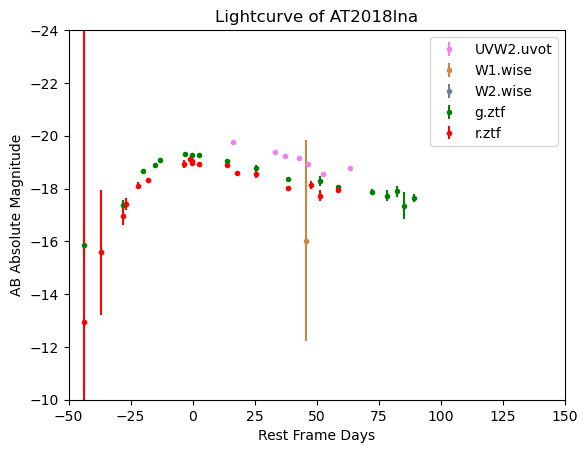

[-2.85122980e+02 -2.76160610e+02 -2.64196591e+02 -1.48328417e+02
 -1.39403657e+02 -1.36414053e+02 -1.33383381e+02 -1.30437368e+02
 -1.27450219e+02 -1.24430324e+02 -1.21517334e+02 -1.18435498e+02
 -1.10478027e+02 -8.55928886e+01 -8.26625397e+01 -7.87546779e+01
 -7.66322592e+01 -7.57939693e+01 -7.36945566e+01 -7.07797219e+01
 -6.88382275e+01 -6.68273810e+01 -6.48194735e+01 -6.47802619e+01
 -5.78218345e+01 -5.27393412e+01 -4.39769944e+01 -3.70317413e+01
 -2.79137927e+01 -2.68562313e+01 -2.19134338e+01 -1.81654152e+01
 -3.30974042e+00 -1.19200125e+00 -2.27904659e-01 -1.97049415e-01
  2.73204313e+00  1.36941716e+01  1.77004659e+01  2.56608875e+01
  3.85546094e+01  4.75283093e+01  5.14526880e+01  5.84310325e+01
  2.14158149e+02  2.17146843e+02  2.24126329e+02  2.27112510e+02
  2.30059041e+02  2.36056668e+02  2.47021044e+02  2.50009554e+02
  2.53994098e+02  2.56981190e+02  2.59925958e+02  2.62988557e+02
  2.68911046e+02  2.71906805e+02  2.74917594e+02  2.77902623e+02
  2.83845317e+02  2.86888

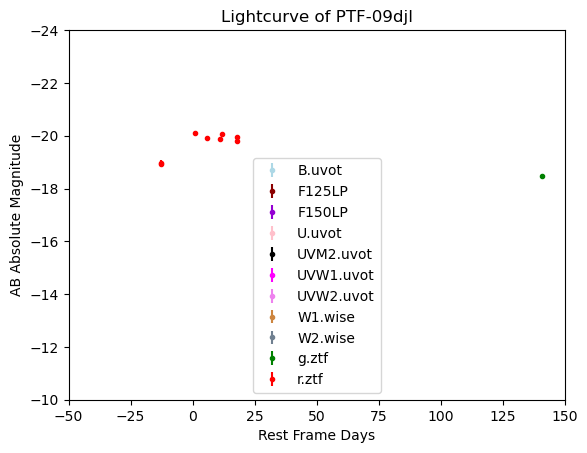

[-12.73852753 -12.66870045   1.05232084   5.92857861  10.9561284
  11.80569121  17.74099304  17.77590658]


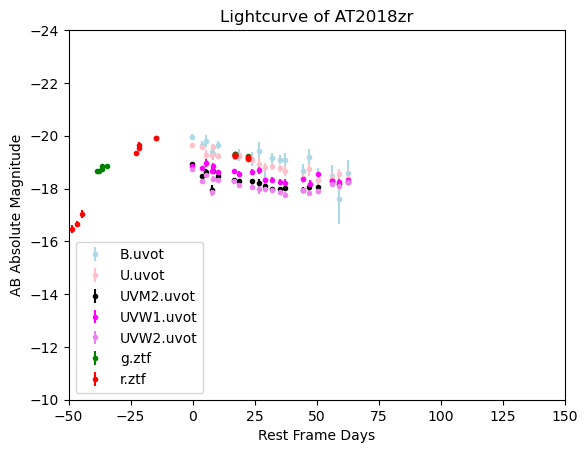

[-48.60327367 -46.60555803 -44.60784239 -22.70775114 -21.72491778
 -21.56467321 -14.75962047 -14.75962047  17.13973195  17.13973195
  17.15041492  17.16109789  17.16109789  22.15004551  22.16072848
  22.16072848]


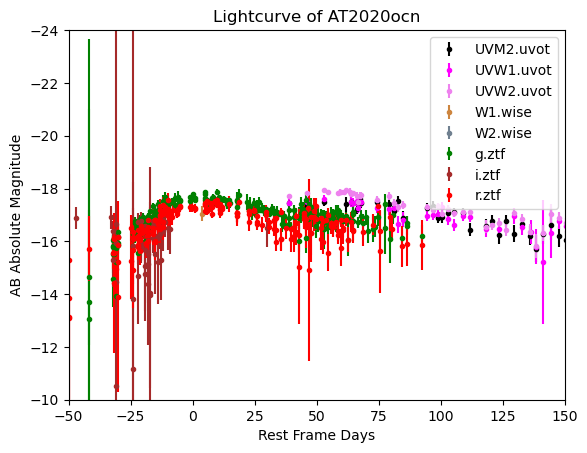

[-727.39406305 -727.39357815 -727.36458694 ... 1365.6928862  1401.39623602
 1408.53179129]


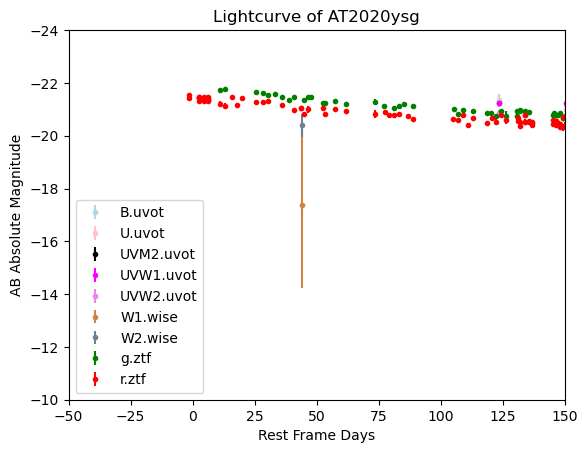

[-684.53873231 -678.76324793 -672.9953816  -672.99450299 -671.10434733
 -669.17961592 -668.26696745 -664.41195513 -664.41107651 -663.43860716
 -663.39658025 -662.4563624  -661.4767978  -656.74877279 -650.91297835
 -650.91199961 -648.02807759 -648.02219447 -647.1009271  -644.20738524
 -641.30063142 -638.45910327 -636.53234779 -626.94297718 -622.09598898
 -619.28565576 -611.52736518 -608.64493338 -605.80767582 -603.02048573
 -559.87555808 -557.02030641 -549.35158581 -536.86957416 -533.95809382
 -531.13807407 -523.32817007 -520.43530659 -509.95655305 -506.15342107
 -500.28147159 -485.99729498 -485.98179211 -485.02191198 -484.00833873
 -482.144607   -480.22288936 -477.2986086  -471.55821153 -468.63720032
 -465.81335496 -461.96370295 -458.12317046 -453.27309057 -448.49628816
 -441.76692908 -354.97549738 -354.97081535 -351.12802519 -351.12322084
 -347.28725911 -347.28265491 -347.278073   -339.61586941 -332.89243794
 -326.18688932 -313.63262341 -298.38357332 -293.52743236 -290.61742004
 -281.

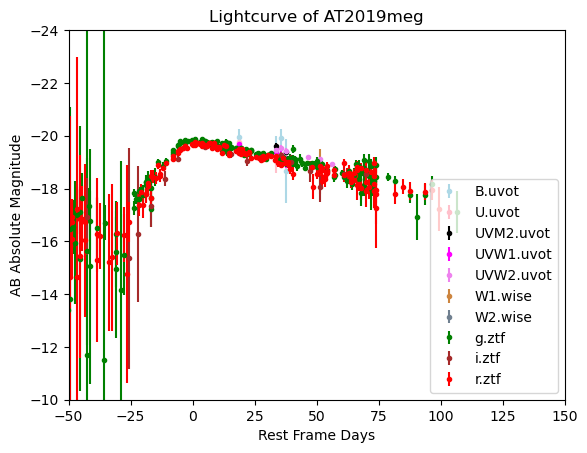

[-492.18351868 -492.16386542 -492.13514061 ... 1721.77187921 1722.76557907
 1727.72393165]


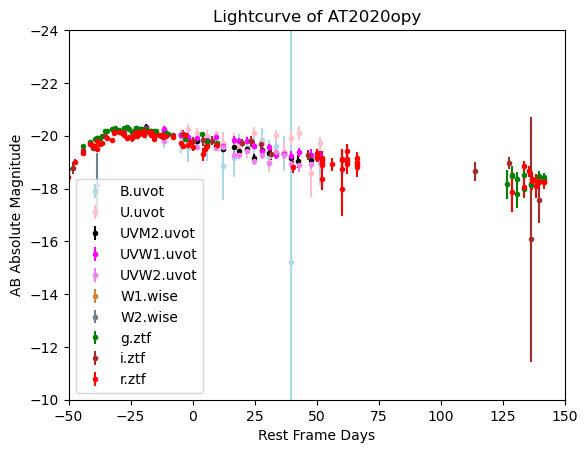

[-7.17752067e+02 -7.10866210e+02 -7.06918832e+02 -6.04826663e+02
 -5.73252876e+02 -5.55471566e+02 -5.40644607e+02 -5.34745446e+02
 -5.25874280e+02 -5.22008067e+02 -5.14031016e+02 -5.10125404e+02
 -5.07207287e+02 -4.96380086e+02 -4.85516388e+02 -4.84523271e+02
 -4.84441649e+02 -4.77623027e+02 -4.74698100e+02 -4.66780035e+02
 -4.51040117e+02 -4.51033478e+02 -4.50004606e+02 -4.48092599e+02
 -4.45149447e+02 -4.39222301e+02 -4.36279091e+02 -4.33317736e+02
 -4.30401321e+02 -4.26405186e+02 -4.23466032e+02 -4.20432207e+02
 -4.17516559e+02 -4.14630792e+02 -4.11636926e+02 -4.08645929e+02
 -4.02717162e+02 -3.99815328e+02 -3.87817802e+02 -3.79106611e+02
 -3.73063975e+02 -3.60346010e+02 -3.56369711e+02 -3.35715912e+02
 -3.23862707e+02 -3.19913718e+02 -3.16950626e+02 -3.10064757e+02
 -3.07107675e+02 -3.07098054e+02 -3.07093243e+02 -2.97240020e+02
 -2.97235324e+02 -2.97230627e+02 -2.33580914e+02 -2.21778696e+02
 -2.12873271e+02 -2.09889839e+02 -2.02979540e+02 -2.00016882e+02
 -1.93140475e+02 -1.88191

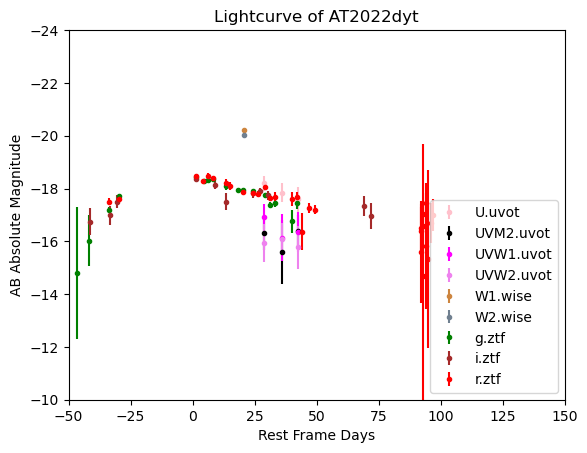

[-726.85383479 -713.87629612 -713.87283284 -712.88821902 -711.92058642
 -705.94920338 -705.94830303 -703.91298567 -702.95539643 -702.95442676
 -701.96078553 -700.94848905 -699.95384344 -699.95291994 -693.00117123
 -686.94131472 -681.94923531 -671.98138806 -642.10810348 -551.01291043
 -551.00822363 -551.00352515 -550.99883825 -547.02330347 -547.01858196
 -547.01384887 -547.00912736 -547.00440585 -545.02832106 -545.02362258
 -543.03004861 -543.02533856 -543.02061715 -543.0159071  -539.03952962
 -539.03483115 -539.03014434 -539.02544587 -539.02074749 -532.06886025
 -528.05637303 -526.05203995 -524.054841   -518.07276818 -516.13976569
 -513.12872349 -511.16606436 -509.14621615 -503.15648965 -500.12915873
 -498.13313732 -491.18876532 -486.2064175  -483.22151098 -481.23011873
 -476.34647247 -475.30954099 -474.24791697 -470.2913259  -458.33774307
 -450.3431409  -446.34566082 -444.31043593 -442.38613768 -440.3479113
 -438.39429115 -436.40653524 -420.47578987 -418.528138   -417.5614636
 -417.42

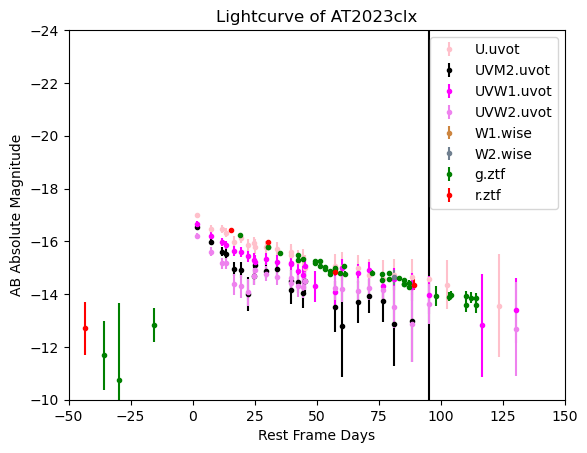

[-726.5974431  -726.57556944 -726.57509497 -725.61857949 -724.58807553
 -724.58761256 -724.58666352 -722.54639504 -722.54593207 -720.67129005
 -710.61542475 -708.6187416  -705.69211534 -703.69923976 -703.69876529
 -697.64153227 -697.60427765 -696.65104896 -696.65057449 -696.65011152
 -693.70212086 -687.74422205 -683.76448912 -683.76402615 -678.68752013
 -677.73203468 -675.7017077  -671.72400004 -665.75103275 -662.74640207
 -662.72175078 -660.72651425 -658.70358271 -658.68219512 -656.73515003
 -656.73280067 -650.71276447 -647.78222645 -642.6866012  -639.76809944
 -637.77052515 -633.76616403 -633.74470704 -629.73343664 -629.73297367
 -627.74756293 -627.74709996 -625.73282529 -625.73236232 -623.74840979
 -621.7476181  -613.76460028 -499.43995088 -499.43521737 -497.43774717
 -496.43941714 -496.43270456 -496.43224158 -491.43146012 -488.44811284
 -488.44556669 -488.44300895 -488.44046281 -483.44603505 -483.4435815
 -483.43867441 -482.44547137 -482.44301782 -482.44056427 -482.43811072
 -468.4

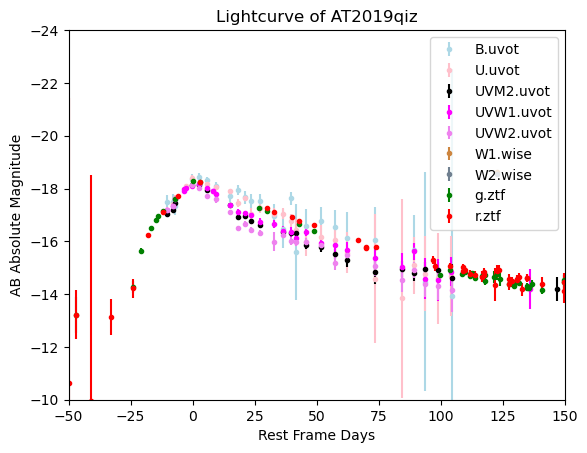

[-412.86794604 -412.86184724 -409.92579312 -409.92347858 -408.92502763
 -406.92806783 -406.91486334 -405.93065836 -405.8724474  -404.90965218
 -403.91469613 -403.86772229 -400.92852043 -400.91368412 -399.8763835
 -398.86017987 -397.86792031 -397.85162587 -396.88967546 -395.87480268
 -394.91019047 -394.89300493 -393.85102884 -392.87678802 -391.9254729
 -391.9245703  -390.86962109 -389.8732532  -388.87070552 -388.86979122
 -387.87131717 -386.86910505 -385.93208229 -385.91825277 -384.87057133
 -383.87010671 -382.91300524 -382.89389862 -379.9587472  -379.9578329
 -378.85123458 -376.95265477 -376.95174047 -365.91684132 -340.99882608
 -329.04493452 -326.02354293 -316.01908179 -307.13192384 -307.10878998
 -291.13014893 -287.07473175 -276.12172136 -272.15629392 -256.14265687
 -249.25722667 -240.19624605 -240.18321503 -224.20452779 -205.24247693
  -49.90395093  -46.93018121  -40.91244148  -37.91581557  -32.93402252
  -27.92691985  -23.95200269  -17.91497116  -11.91301663   -5.9417762
    3.0648

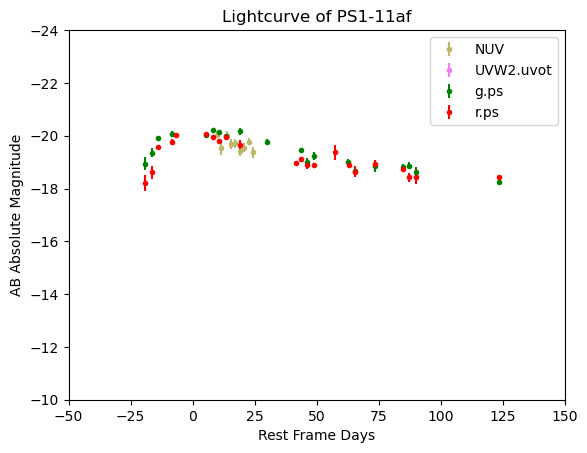

[-19.31884898 -16.55717841 -13.78266287  -8.37492655  -6.80783907
   5.38204636   8.04095709  10.7769377   13.41015847  18.92065462
  41.5406633   43.54448008  46.25477073  49.02928628  57.32714295
  62.85048408  65.57361971  73.71733664  84.67410404  87.41008465
  90.19744517 123.49163171]


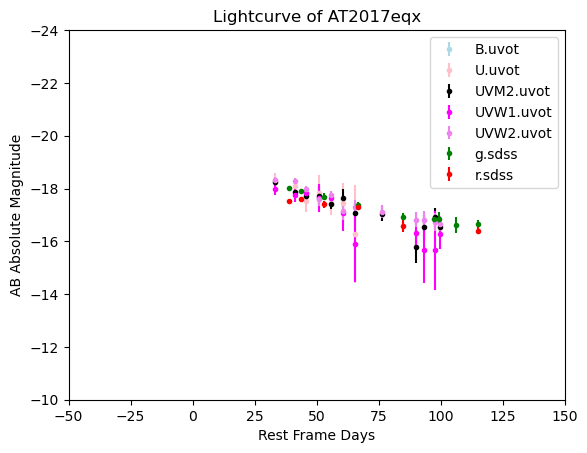

[ 66.58171015  38.84771509  84.67053602  43.80808782  52.95721973
 115.1823398 ]


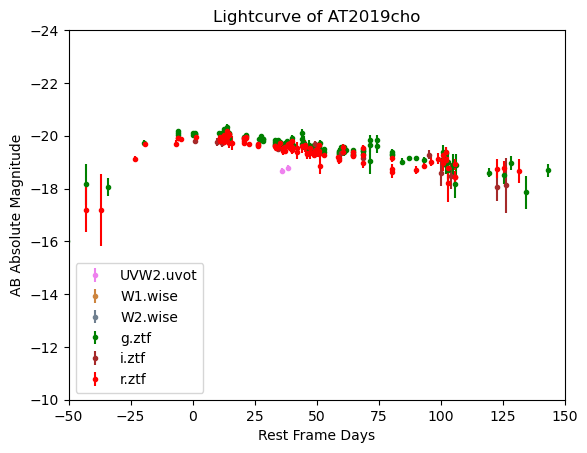

[-3.41352256e+02 -3.41343830e+02 -3.41319379e+02 -3.25710892e+02
 -3.23836473e+02 -3.23816236e+02 -3.23815282e+02 -3.22845803e+02
 -3.22806282e+02 -3.22793870e+02 -3.22792927e+02 -3.22785636e+02
 -3.22768181e+02 -3.22747002e+02 -3.21848092e+02 -3.21816510e+02
 -3.21815590e+02 -3.21791525e+02 -3.21790628e+02 -3.21748609e+02
 -3.21745316e+02 -3.21722183e+02 -3.20881418e+02 -3.20850915e+02
 -3.20844907e+02 -3.20785263e+02 -3.20763016e+02 -3.17908567e+02
 -3.17886774e+02 -3.17885877e+02 -3.17881709e+02 -3.17846720e+02
 -3.17821066e+02 -3.15956402e+02 -3.15943831e+02 -3.15939720e+02
 -3.15918733e+02 -3.13980831e+02 -3.13965682e+02 -3.13964784e+02
 -3.13946444e+02 -3.13920120e+02 -3.13003868e+02 -3.12991592e+02
 -3.12990695e+02 -3.12989786e+02 -3.10077647e+02 -3.10067597e+02
 -3.10066700e+02 -3.10065803e+02 -3.09063299e+02 -3.09026288e+02
 -3.09001861e+02 -3.08972924e+02 -3.07199907e+02 -3.07179954e+02
 -3.07178557e+02 -3.07177580e+02 -2.98286364e+02 -2.98268637e+02
 -2.98267739e+02 -2.98266

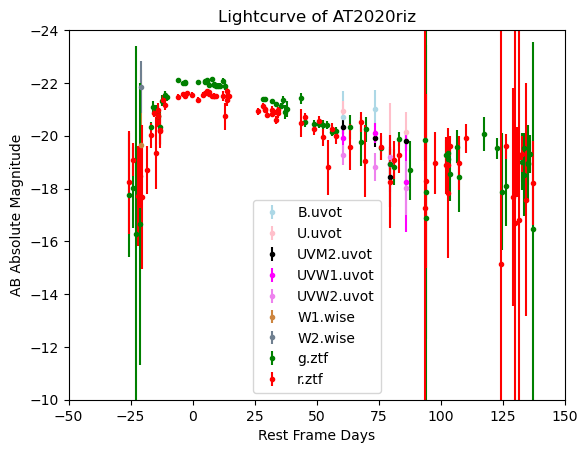

[-6.57261245e+02 -6.56280449e+02 -6.56278353e+02 -6.55377597e+02
 -6.54529790e+02 -6.54488529e+02 -6.53654142e+02 -6.53610640e+02
 -6.53607720e+02 -6.53578607e+02 -6.53576522e+02 -6.52799610e+02
 -6.52676714e+02 -6.51833662e+02 -6.51775697e+02 -6.50985376e+02
 -6.50941425e+02 -6.50932374e+02 -6.50869915e+02 -6.50868653e+02
 -6.50035111e+02 -6.45498816e+02 -6.45496731e+02 -6.44581355e+02
 -6.43765237e+02 -6.42884188e+02 -6.42873302e+02 -6.41958323e+02
 -6.41023000e+02 -6.40119126e+02 -6.40118312e+02 -6.39231633e+02
 -6.38316487e+02 -6.37455896e+02 -6.37455072e+02 -6.36504922e+02
 -6.35653966e+02 -6.34734555e+02 -6.34733731e+02 -6.32937213e+02
 -6.32042942e+02 -6.32042118e+02 -6.31121519e+02 -6.30209167e+02
 -6.28475890e+02 -6.28475067e+02 -6.27535563e+02 -6.26521420e+02
 -6.25808271e+02 -6.25807447e+02 -6.21359523e+02 -6.14922970e+02
 -5.92476674e+02 -5.91547253e+02 -5.89809210e+02 -5.88916785e+02
 -5.86159627e+02 -5.84340461e+02 -5.83460653e+02 -5.81673821e+02
 -5.79877313e+02 -5.79005

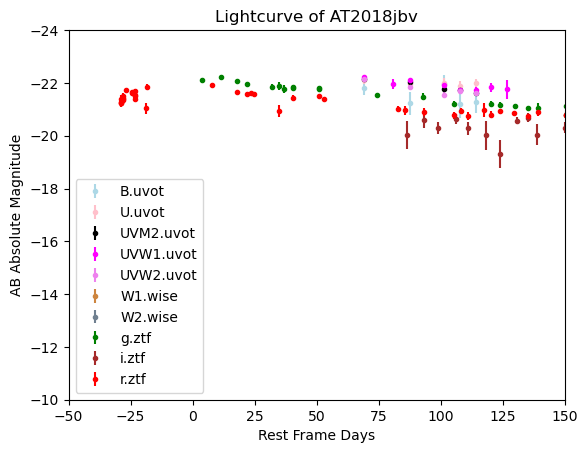

[-236.06695995 -236.04226287 -235.12067867 -231.37677317 -231.3650722
 -227.67808209 -227.62915599 -227.60975971 -222.94529309 -197.59356761
 -168.4544964  -165.61742659 -159.95559741 -157.20880412 -154.38418629
 -151.56657802 -124.27260195  -28.96633989  -28.96591538  -28.96548006
  -28.96462013  -28.02780838  -28.02649131  -28.02379201  -28.02196335
  -27.07436501  -24.26286301  -24.25826979  -24.24906142  -23.32060901
  -23.31609187  -23.31157482  -23.30704686  -18.64767424  -18.59980395
    7.66277369   18.05952512   21.82480791   23.654164     24.64659581
   34.9872265    40.62478311   50.95393064   52.77131371   82.83165361
   85.51371648   93.12081125  105.30325002  108.12384057  110.96171585
  117.49377588  120.31098137  124.07512126  129.65582783  135.33368994
  139.14301163  150.4299346   150.43900143  155.04297171  155.04382072
  156.056574    157.86147244  157.86233227  158.78981605  159.76702039
  160.65218492  160.65303394  161.63473361  162.63292336  163.52459686
  168.2

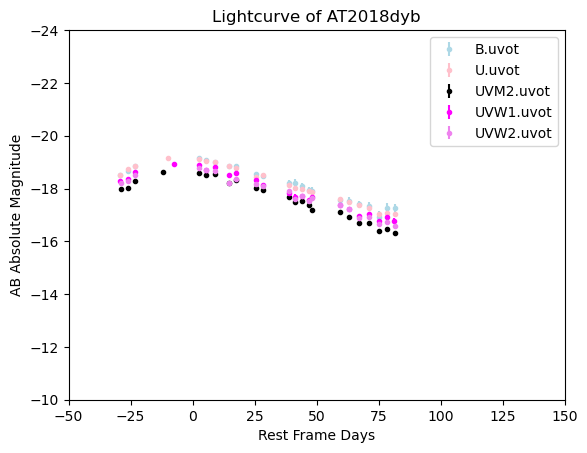

[ -29.09284981  -26.07078351  -23.08313162    2.51834793    5.37372824
    9.02317489   14.66348094   17.55771096   25.62098439   28.30579735
   38.87839617   41.13283886   43.89477132   46.97538314   48.04298714
   59.3257139    62.90054963   67.22278526   71.03847697   75.11425753
   78.47605179   81.39207628  158.29322226  166.15925966  169.94046395
  178.44625868  181.6280581   185.73676833  193.78329448  197.47737989
  201.58156385  205.87068284  215.05953089  218.66943294  222.4724547
  226.71987745  234.38243182  234.50385114  237.62668812  243.1865512
  244.14933019  246.70520904  247.199179    249.65363028  255.79122275
  258.90788673  261.87591579  264.55206815  267.97731612  270.76366063
  270.93015265  273.81747479  275.94177057  276.73351927  280.82853172
  285.73004548  295.80303226  302.07664969  306.75412075  310.94682037
  320.89289472  432.09732322  438.36214307 1239.03245795 1248.61513218
 1459.23947475 1479.82810858]


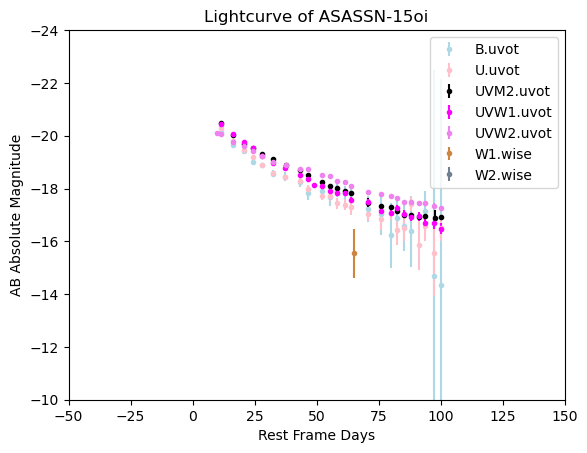

[-293.35088118 -111.08561343   65.25144607  252.69731907  426.79089578
  619.74190743  787.04556727  983.34821806 1147.07251687 1347.05671387
 1510.69167438 1713.64789821 1877.35913061 2077.48947511 2241.43662311
 2442.33736056 2607.89588848 2807.64713292 2971.73851917]


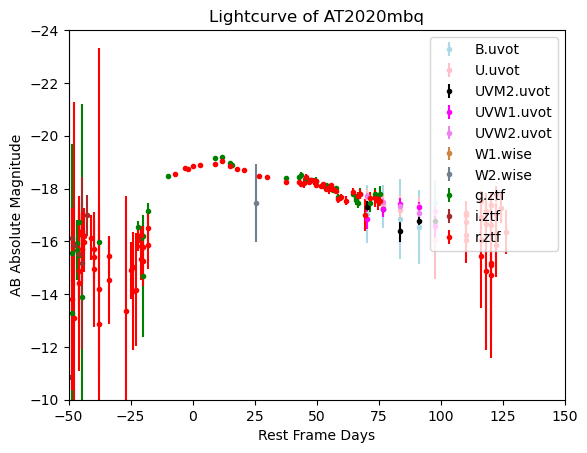

[-7.24840053e+02 -7.21837485e+02 -7.18831692e+02 -7.12974409e+02
 -7.09968177e+02 -7.05011397e+02 -7.02024974e+02 -6.95011866e+02
 -6.92067737e+02 -6.85962126e+02 -6.83110891e+02 -6.80076644e+02
 -6.76121856e+02 -6.73166883e+02 -6.70161078e+02 -6.63215338e+02
 -6.63131087e+02 -6.59148307e+02 -6.54261396e+02 -6.35372008e+02
 -5.40362771e+02 -5.35363398e+02 -5.29396603e+02 -5.11474106e+02
 -5.08520285e+02 -4.94549396e+02 -4.90605924e+02 -4.75696354e+02
 -4.69686611e+02 -4.44856945e+02 -4.41914510e+02 -4.36869940e+02
 -4.34010500e+02 -4.31016967e+02 -4.21121394e+02 -4.19018211e+02
 -4.18951799e+02 -4.12060602e+02 -4.09130947e+02 -4.05150092e+02
 -4.01142812e+02 -3.98201725e+02 -3.85299644e+02 -3.82295348e+02
 -3.79328978e+02 -3.73371045e+02 -3.70386052e+02 -3.67395850e+02
 -3.60425024e+02 -3.57483026e+02 -3.54516840e+02 -3.51461805e+02
 -3.48549619e+02 -3.45532221e+02 -3.42516736e+02 -3.39577562e+02
 -3.36537599e+02 -3.33612035e+02 -3.26659128e+02 -3.20683449e+02
 -3.17690942e+02 -3.12726

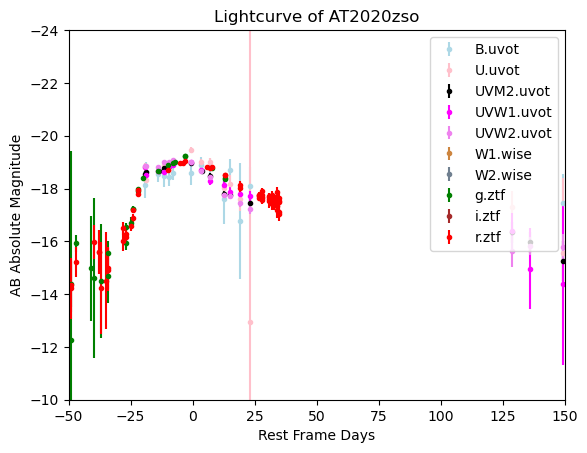

[-721.96206795 -716.8939614  -700.97410838 -699.9787565  -699.97389158
 -699.96902666 -697.98113081 -697.97634687 -524.92689898 -521.93422183
 -518.89608512 -515.87585945 -512.88545876 -509.95194625 -500.98633714
 -500.98543578 -499.99640478 -499.05351517 -497.99438802 -497.00470987
 -497.00380851 -495.00173394 -493.99991091 -493.99899808 -492.98381672
 -490.02259395 -488.00656022 -483.90946958 -477.04901082 -476.06048821
 -474.0964431  -455.08790923 -447.11160846 -441.20405789 -434.19611519
 -420.24725227 -417.32455576 -414.31697196 -410.28689211 -406.29021952
 -402.3173745  -337.56446015 -337.55960681 -337.55475338 -337.54990004
 -331.56428008 -331.55935735 -331.55443473 -329.55635836 -173.44668267
 -167.43984655 -161.46555096 -158.57748664 -149.48783978 -146.59400919
 -143.55851864 -140.54787254 -137.56868082 -134.51507106 -130.61602008
 -128.62576689 -122.5892214  -118.55627574 -115.64549307 -112.65063192
 -103.66395701  -94.74220133  -93.7183764   -92.72634092  -80.80505566
  -77.

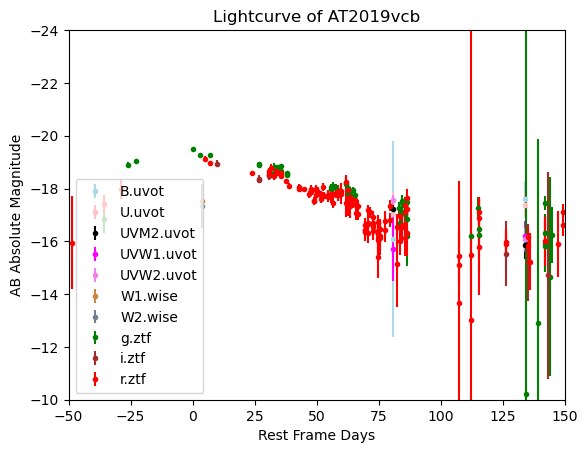

[-611.9314035  -609.93447022 -608.94268466 -608.94173925 -608.87196469
 -608.87103083 -607.92877467 -607.90485165 -607.88379944 -606.96840616
 -606.92330401 -603.93606094 -603.91820229 -601.94655244 -601.93905843
 -598.95059331 -595.97982537 -593.04796838 -593.03620868 -584.0183093
 -584.0172832  -582.11056557 -579.06044238 -571.08707444 -571.08614057
 -569.06637951 -569.05732915 -568.1268327  -568.12589883 -560.11934992
 -559.08385738 -559.08293498 -556.21010739 -554.20858549 -552.2009992
 -552.20006534 -550.20770914 -549.15495732 -549.14976923 -548.16331013
 -547.23268696 -546.22380369 -546.22278905 -545.23258304 -544.23577086
 -543.23522322 -543.23431237 -542.23474472 -540.16395549 -537.24001905
 -534.23416785 -531.2411141  -528.23475567 -525.32757109 -522.33607378
 -519.35073299 -507.36404864 -490.43945456 -402.43426283 -386.49793769
 -386.4919541  -383.58453902 -383.5813339  -379.58078029 -379.57754061
 -378.58216952 -378.52905468 -377.54736869 -365.5791311  -362.5883255
 -361.635

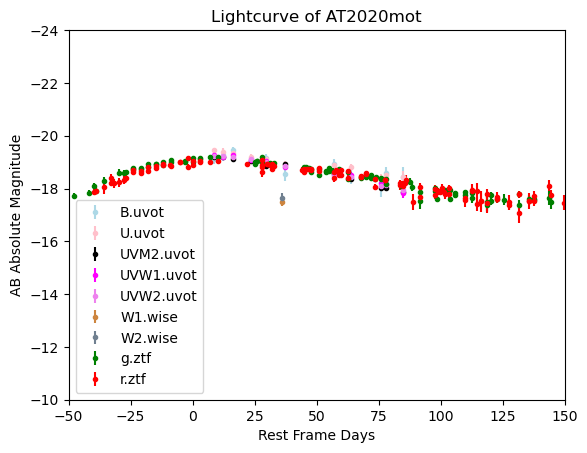

[-4.28857101e+02 -4.21818772e+02 -4.14884920e+02 -4.14884447e+02
 -4.11892729e+02 -4.10878164e+02 -4.07930851e+02 -4.07930366e+02
 -3.97887458e+02 -3.97886985e+02 -3.94971711e+02 -3.94971227e+02
 -3.88899006e+02 -3.88898532e+02 -3.85905453e+02 -3.85904968e+02
 -3.82995167e+02 -3.82994682e+02 -3.79980693e+02 -3.77008488e+02
 -3.77008015e+02 -3.74017129e+02 -3.73079711e+02 -3.71046113e+02
 -3.70086574e+02 -3.64053689e+02 -3.64053216e+02 -3.60983496e+02
 -3.57969946e+02 -3.57952720e+02 -3.55105346e+02 -3.55033775e+02
 -3.52108664e+02 -3.51105437e+02 -3.49094999e+02 -3.48012833e+02
 -3.45105873e+02 -3.42111477e+02 -3.40013753e+02 -3.39188445e+02
 -3.30143534e+02 -3.27190910e+02 -3.27148295e+02 -3.25077046e+02
 -3.25076573e+02 -3.24117542e+02 -3.24104876e+02 -3.24104403e+02
 -3.24090871e+02 -3.21161258e+02 -3.21160785e+02 -3.20099009e+02
 -3.18106790e+02 -3.18106317e+02 -3.15241094e+02 -3.08067704e+02
 -3.08065452e+02 -3.05282054e+02 -3.05261895e+02 -3.02251647e+02
 -3.01150166e+02 -2.98087

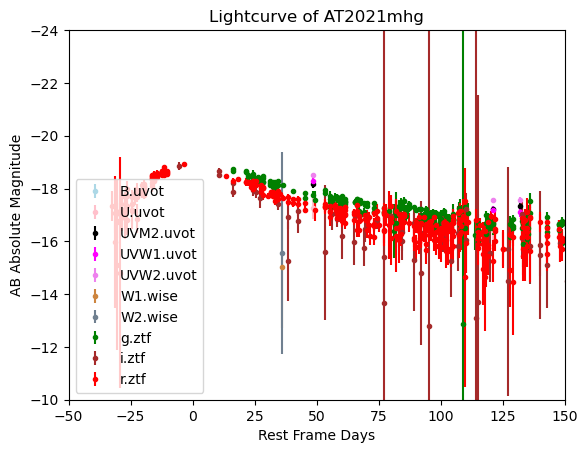

[-716.60383491 -714.59325291 -713.60452066 ... 1073.65865451 1074.64228471
 1074.64520509]


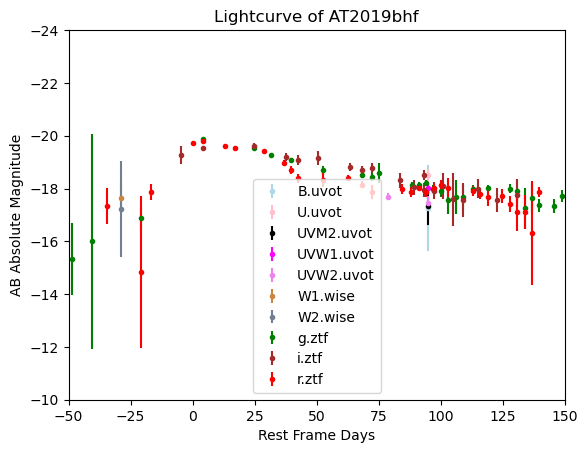

[-3.22707220e+02 -3.21689311e+02 -3.18714850e+02 -3.18696512e+02
 -3.18544344e+02 -3.14748331e+02 -3.14687665e+02 -3.11729956e+02
 -2.92950026e+02 -2.83065054e+02 -2.71106912e+02 -2.68111298e+02
 -2.65153715e+02 -2.62217594e+02 -2.53282962e+02 -2.50304766e+02
 -2.47310244e+02 -2.43340761e+02 -2.37478251e+02 -2.34468287e+02
 -2.29520556e+02 -2.08699878e+02 -2.05679585e+02 -1.98785482e+02
 -1.95788616e+02 -1.89775524e+02 -1.79935385e+02 -1.76952801e+02
 -8.52215239e+01 -8.12479960e+01 -8.12432968e+01 -8.12385860e+01
 -8.12338754e+01 -7.43146906e+01 -6.63754710e+01 -6.13923524e+01
 -5.54433262e+01 -3.46278071e+01 -2.07007840e+01 -1.67524644e+01
  6.06650869e-02  4.09116978e+00  1.30069017e+01  1.68760350e+01
  2.88459776e+01  3.68087164e+01  3.96601013e+01  4.26433521e+01
  5.25454890e+01  6.24982260e+01  6.84341081e+01  7.24285583e+01
  8.43115592e+01  8.82245368e+01  9.12207939e+01  9.41788136e+01
  9.71610305e+01  1.00118522e+02  1.03093730e+02  1.13025096e+02
  1.15980818e+02  1.18917

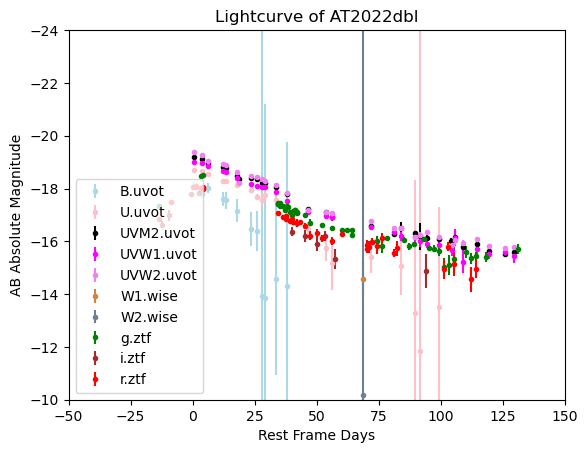

[-7.28261117e+02 -7.28260215e+02 -7.28236128e+02 -7.25463288e+02
 -7.25265139e+02 -7.24277690e+02 -7.24254598e+02 -7.24253082e+02
 -7.23275155e+02 -7.23256308e+02 -7.22359055e+02 -7.21298256e+02
 -7.21280127e+02 -7.00313101e+02 -7.00308659e+02 -7.00291200e+02
 -6.95349838e+02 -6.95325704e+02 -6.92356509e+02 -6.92353188e+02
 -6.92330709e+02 -6.82479696e+02 -6.82454787e+02 -6.82453884e+02
 -6.81487677e+02 -6.81467870e+02 -6.80440785e+02 -6.74443089e+02
 -6.66532971e+02 -6.64536462e+02 -6.63545658e+02 -6.62478669e+02
 -6.62470895e+02 -6.60497015e+02 -6.60449615e+02 -6.56475524e+02
 -6.56473650e+02 -6.55490309e+02 -6.50478604e+02 -6.49435900e+02
 -6.45525638e+02 -6.44501305e+02 -6.43459862e+02 -6.41508694e+02
 -6.40494439e+02 -6.38507659e+02 -6.27571135e+02 -6.24518501e+02
 -6.17533600e+02 -6.14528528e+02 -6.08535633e+02 -6.05535536e+02
 -4.81314470e+02 -4.79308208e+02 -4.77311086e+02 -4.71336483e+02
 -4.68279013e+02 -4.66259781e+02 -4.60259263e+02 -4.52325844e+02
 -4.48301368e+02 -4.43306

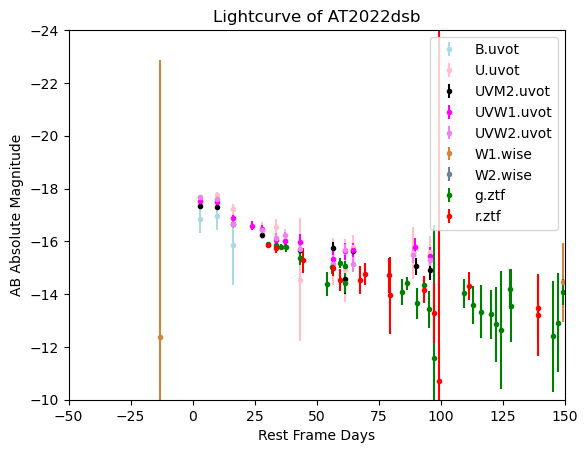

[-724.29961748 -698.39090348 -675.41653629 -672.4594758  -668.46032814
 -665.503823   -652.50766036 -640.5075328  -620.59930491 -612.57968433
 -357.39914806 -349.44408159 -349.44360712 -349.44314435 -349.44266988
 -349.44220711 -349.44173264 -349.44126986 -349.44079539 -349.44033262
 -349.43985815 -349.43939538 -349.43892091 -349.43844654 -349.43798366
 -349.43704642 -349.43657205 -349.43610918 -349.43563481 -349.43469756
 -349.43423469 -349.43376032 -349.43328595 -349.43282308 -349.43234871
 -349.43187424 -349.43141146 -349.43093699 -349.43047422 -349.42999975
 -349.42906251 -349.42859973 -349.42812526 -349.42766249 -349.42718802
 -349.42671365 -349.42625078 -349.42531353 -349.42483916 -349.42437629
 -349.42390192 -349.42343905 -349.42296468 -349.4225018  -349.42202743
 -349.42156456 -349.42109019 -349.42062732 -349.42015295 -349.41969007
 -349.4192157  -349.41874123 -349.41827846 -349.41734122 -349.41686675
 -349.41640397 -349.4159295  -349.41546673 -349.41499226 -349.41452949
 -349.

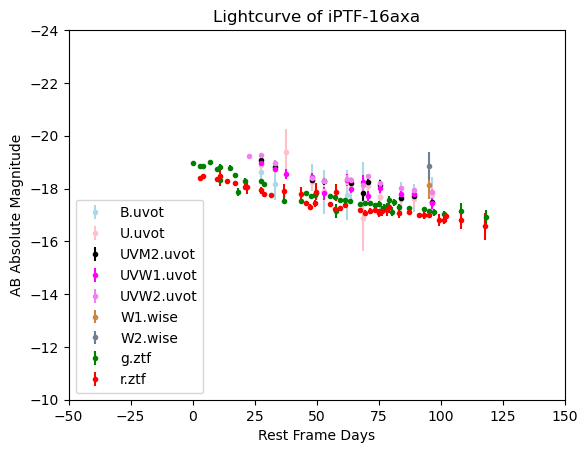

[  2.98511701   3.99851466   9.9357031   11.04823748  13.96726334
  16.875274    20.93987981  21.95327747  27.63711649  28.63949895
  31.64664634  36.90089288  43.8184334   45.5918793   47.50852269
  49.50227242  49.78866741  55.50555201  57.44422579  57.73062078
  59.48203629  61.43172526  67.41297446  69.36266343  71.35641316
  73.36117809  75.32188225  76.32426471  78.30699925  79.29836653
  83.25282042  87.24031989  91.21680417  93.19953871  95.20430364
  99.15875753 101.22961361 102.18793531 108.11410855 118.04981165]


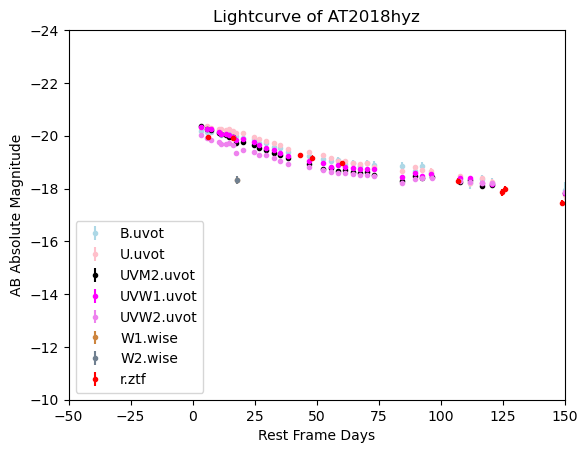

[  6.31347534  16.21659392  43.20990448  48.19280275  60.18518685
 106.91161028 124.81661581 125.82990959 148.87450831]


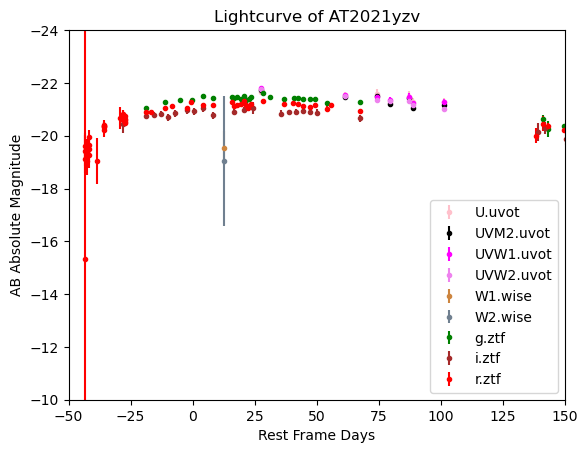

[-698.97836535 -693.23195988 -686.52233404 ...  889.5117111   909.59376394
  913.40638654]


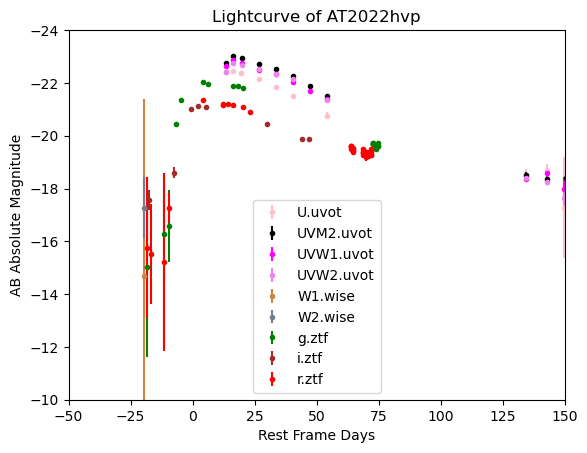

[-725.1833835  -723.20287932 -722.19618623 -722.19523167 -719.25103752
 -719.2500944  -719.24530989 -718.22731108 -717.23709924 -716.17860444
 -716.17766141 -715.24890078 -714.20694476 -712.22228867 -710.22180678
 -710.22087518 -709.24247514 -704.25481904 -704.25388744 -703.32612747
 -699.31231684 -698.30870613 -698.30729139 -695.31243432 -694.32606395
 -694.32513235 -693.32790473 -692.34608882 -691.39639593 -691.39356654
 -679.41310301 -666.56243172 -666.55756662 -666.55271315 -666.54784805
 -664.57641842 -664.57165687 -664.56689541 -664.56212234 -663.57897228
 -658.61566431 -658.61063833 -658.60561226 -658.60059771 -656.62567161
 -656.62079509 -656.61591856 -656.61105357 -654.63756517 -654.63270017
 -654.62781212 -566.90121592 -564.86884107 -562.87791677 -555.93018275
 -553.94342189 -551.951359   -549.96762298 -548.01606741 -545.98717749
 -540.08821971 -538.06420632 -535.04243625 -533.07075352 -526.15649962
 -523.21871171 -521.1260128  -510.23012891 -508.2268407  -504.29826598
 -498.

<Figure size 640x480 with 0 Axes>

In [80]:
def plot_lightcurve(tde_name):
    with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
        tde_data = json.load(f)
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    error_filter = []
    flux_error_filter = []
    mag_error_filter = []
    mjd_date_filter = []
    peak_date_filter = []
    rest_time_filter = []
    lc_filters = tde_data['lightcurve']['filters']
    peak_year = tde_data.get('peak_mjd')
    distance = (sol*tde_data.get('z'))/Ho         
    distance_pc = distance.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    for element in lc_filters: 
        filter_list = np.array([f[1] for f in tde_data['lightcurve']['data']])
        i_filter = np.where(filter_list == element)[0]
        flux_filter = np.array(tde_data['lightcurve']["data"])[i_filter,2]
        error_filter = np.array(tde_data['lightcurve']["data"])[i_filter,3]
        mjd_date_filter = np.array(tde_data['lightcurve']["data"])[i_filter,0]
        flux_filter = np.array(flux_filter, dtype=float)*u.Jy
        mag_filter = flux_filter.to(u.ABmag)     
        absMag_filter = mag_filter.value - distance_mod
        flux_error_filter = u.Jy * np.array(error_filter, dtype=float)
        mjd_date_filter= np.array(mjd_date_filter, dtype=float)
        peak_date_filter = mjd_date_filter - peak_year
        rest_time_filter = peak_date_filter*np.sqrt(1-tde_data.get('z')**2)
        mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2) 
        lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='.',label= element, c = lc_color_dict[element])
        plt.gca().invert_yaxis()
        plt.xlim(-50,150)
        plt.ylim(-10,-24)
        plt.legend()
        plt.xlabel("Rest Frame Days")
        plt.ylabel("AB Absolute Magnitude")
        plt.legend()
        plt.title("Lightcurve of {}".format(tde_name))
    plt.show()
    plt.savefig('SED and Lightcurve Folder/Lightcurve of {}'.format(tde_name) + '.pdf')
    return(lightcurve,print(rest_time_filter))
for json_file in json_list[:]:
    tde_name = json_file[:-5]
    plot_lightcurve(tde_name) 


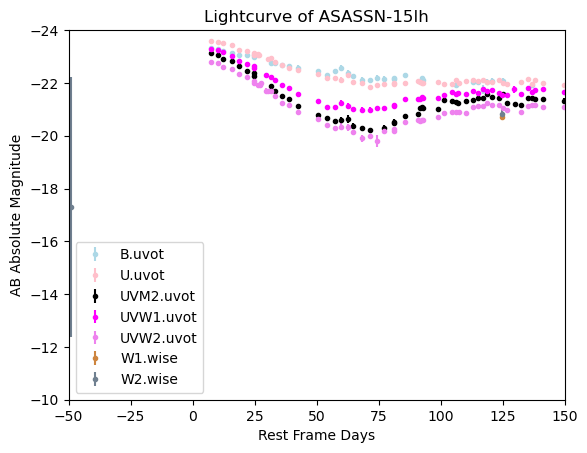

<ErrorbarContainer object of 3 artists>

In [15]:
plot_lightcurve('ASASSN-15lh')

[6951805702866.042, 8961782084716.186, 5372487212891.243, 6452252572819.119, 4032440546927.9907] [4311.81994004 3434.77524091 2226.48332671 2500.58131664 2008.44444658]


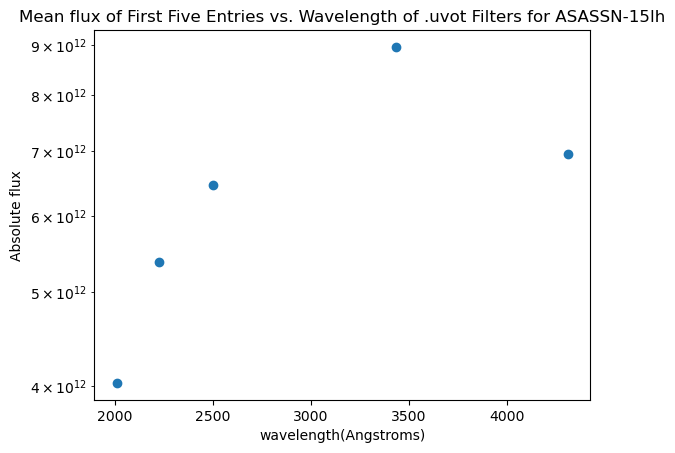

In [65]:
with open("/Users/snorris/manyTDE/data/sources/ASASSN-15lh.json") as f2:
    data2 = json.load(f2)
Tflux_listB = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][0]:
        Tflux_listB.append(data2['lightcurve']["data"][i][2])
Tflux_listU = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][1]:
        Tflux_listU.append(data2['lightcurve']["data"][i][2])       
Tflux_listM2 = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][2]:
        Tflux_listM2.append(data2['lightcurve']["data"][i][2])       
Tflux_listW1 = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][3]:
        Tflux_listW1.append(data2['lightcurve']["data"][i][2])
Tflux_listW2 = []
for i in range (len(data2['lightcurve']["data"])):
    if data2['lightcurve']["data"][i][1] == data2['lightcurve']['filters'][4]:
        Tflux_listW2.append(data2['lightcurve']["data"][i][2])
flh_wave_list = (np.array(data2['lightcurve']['frequency_Hz']) * u.Hz).to(u.angstrom, equivalencies=u.spectral())[0:5]
d2 = (sol*data2['z'])/Ho
dpc2 = d2.to(u.pc)
dm2 = (5*np.log10(dpc2/(10*u.pc)))
Tappmag_listB = u.Magnitude((np.array(Tflux_listB)*u.Jy).to(u.AB))
Tappmag_listU = u.Magnitude((np.array(Tflux_listU)*u.Jy).to(u.AB))
Tappmag_listM2 = u.Magnitude((np.array(Tflux_listM2)*u.Jy).to(u.AB))
Tappmag_listW1 = u.Magnitude((np.array(Tflux_listW1)*u.Jy).to(u.AB))
Tappmag_listW2 = u.Magnitude((np.array(Tflux_listW2)*u.Jy).to(u.AB))
Tabmag_listB = Tappmag_listB.value-dm2
Tabmag_listU = Tappmag_listU.value-dm2
Tabmag_listM2 = Tappmag_listM2.value-dm2
Tabmag_listW1 = Tappmag_listW1.value-dm2
Tabmag_listW2 = Tappmag_listW2.value-dm2
flh_Mag_list = (Tabmag_listB.to_value(),Tabmag_listU.to_value(),Tabmag_listM2.to_value(),Tabmag_listW1.to_value(),Tabmag_listW2.to_value())
flh_Aflux = []
for x in range(0,5):
    flh_Aflux.append(10**((flh_Mag_list[x]-8.9)/(-2.5)))
flhabs_flux_bin = []
flhabs_flux_mean = []
for t in range(0,5):
    flhabs_flux_bin.append(flh_Aflux[t][:5])
    flhabs_flux_mean.append(np.nanmean(flhabs_flux_bin[t]))
plt.scatter(flh_wave_list.to_value(),(np.array(flhabs_flux_mean)))
plt.yscale('log')
plt.xlabel('wavelength(Angstroms)')
plt.ylabel('Absolute flux')
plt.title('Mean flux of First Five Entries vs. Wavelength of .uvot Filters for ASASSN-15lh')
print(flhabs_flux_mean,flh_wave_list.to_value())
#print(flh_Aflux)


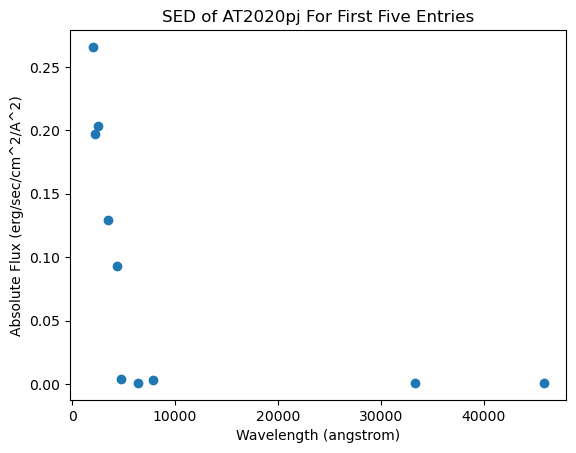

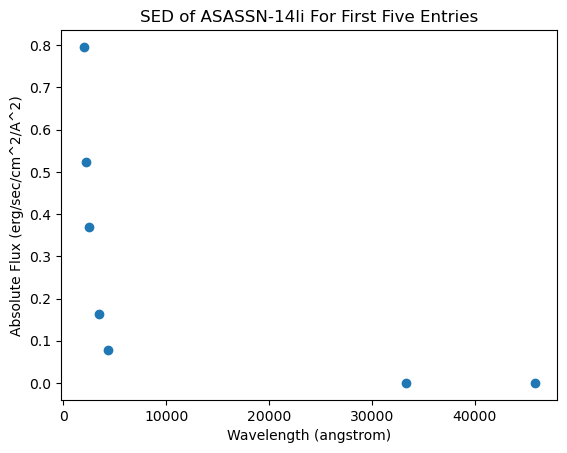

/var/folders/sf/0bstxplx5xl9vkm7jtbmvr8h0005v1/T/ipykernel_61785/775608483.py:28: RuntimeWarning: Mean of empty slice
  abs_flux_mean.append(np.nanmean(abs_flux_bin[b]))


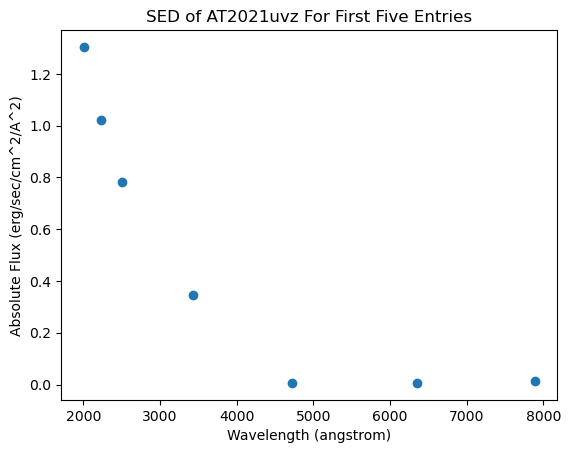

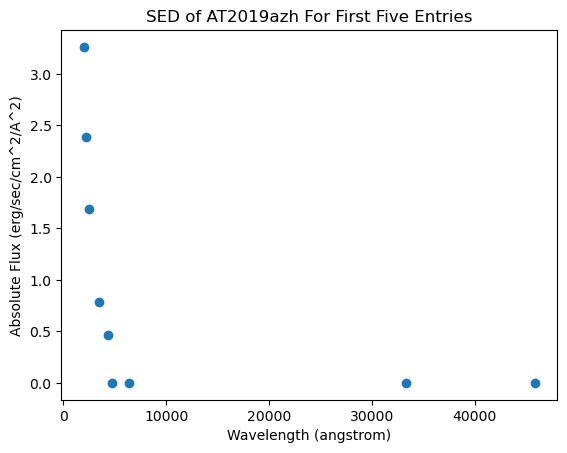

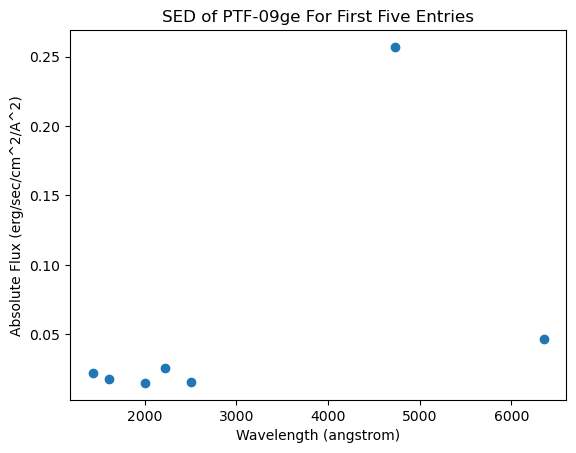

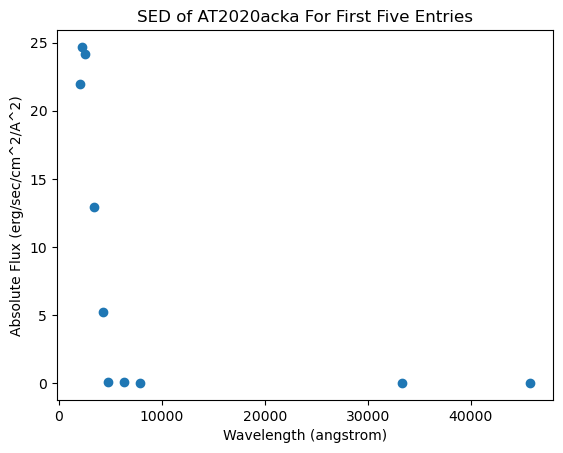

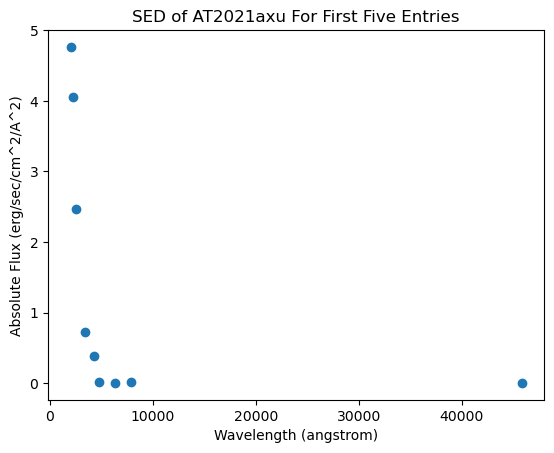

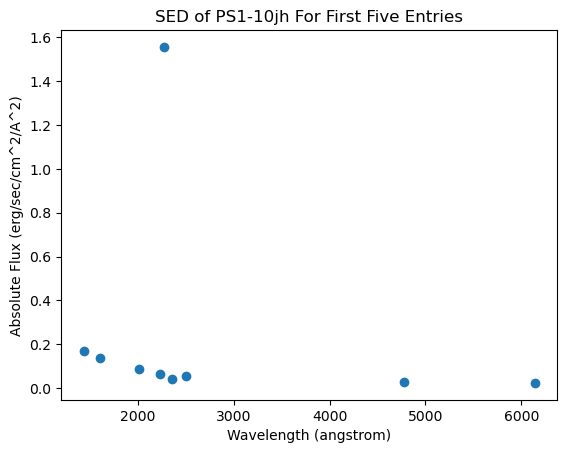

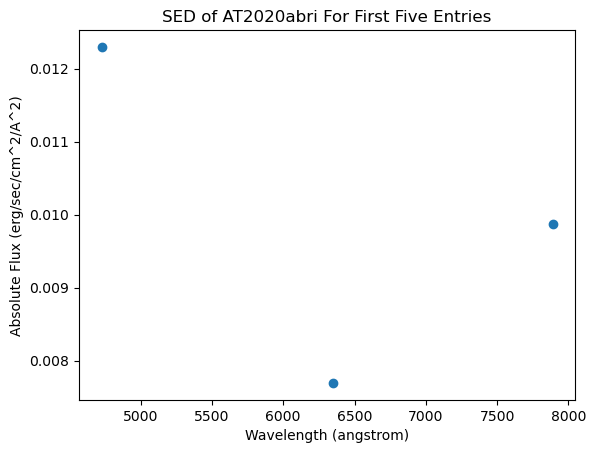

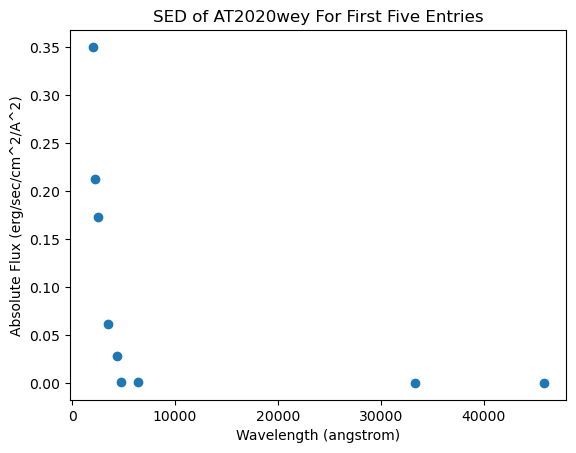

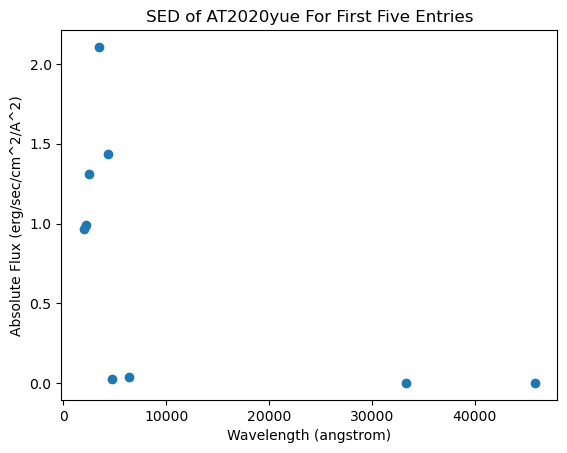

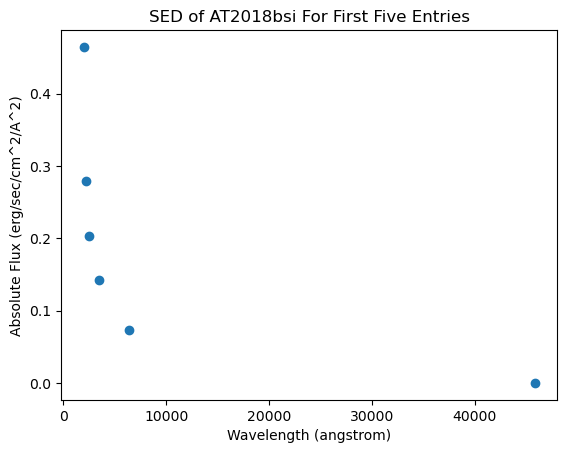

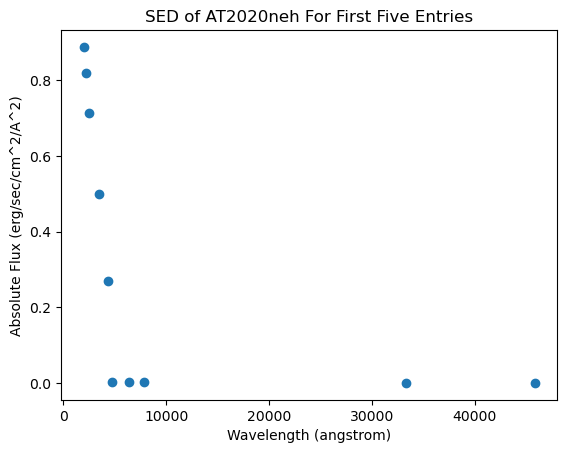

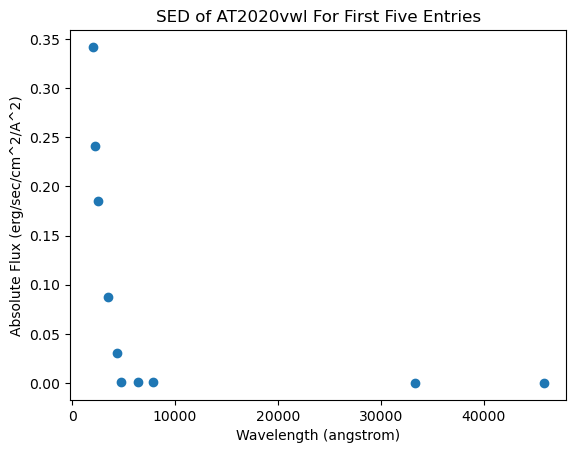

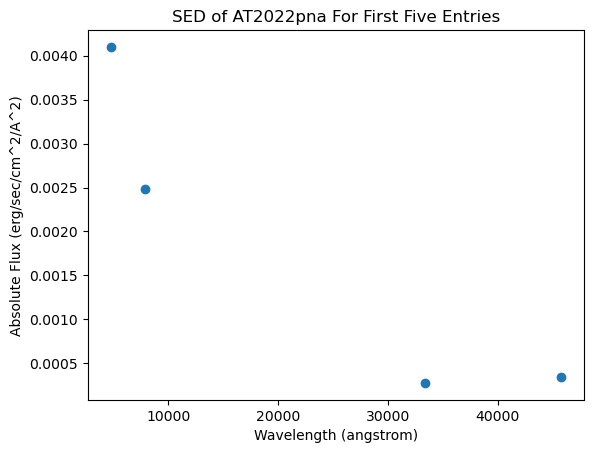

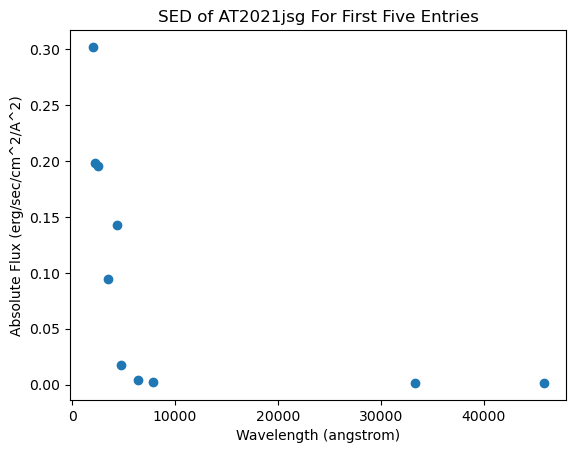

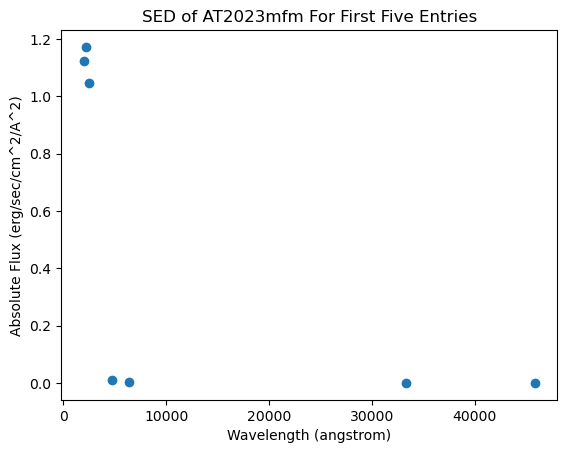

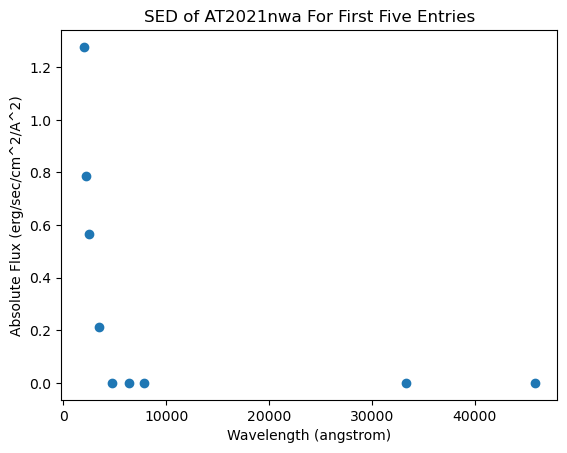

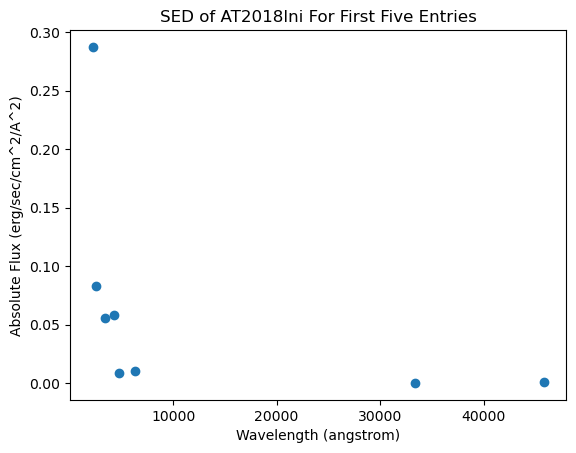

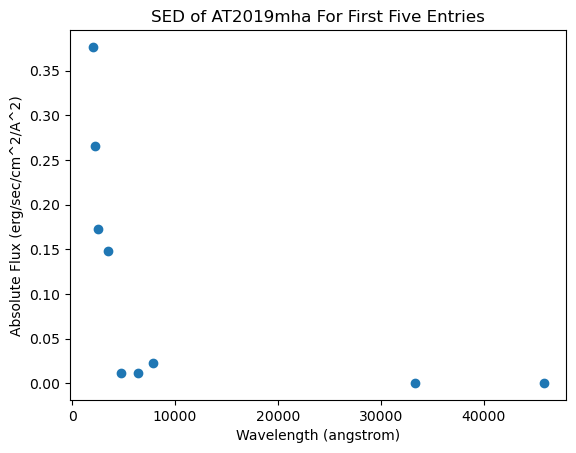

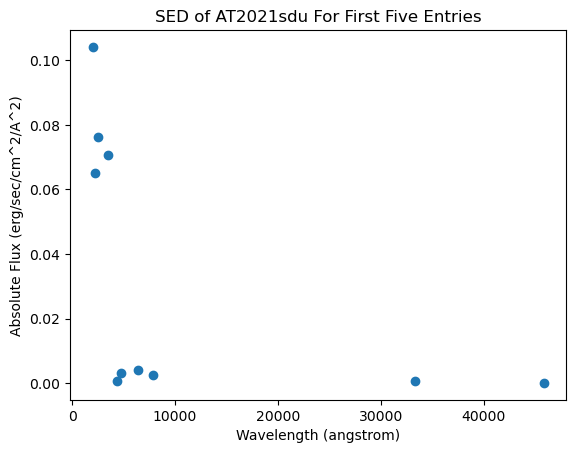

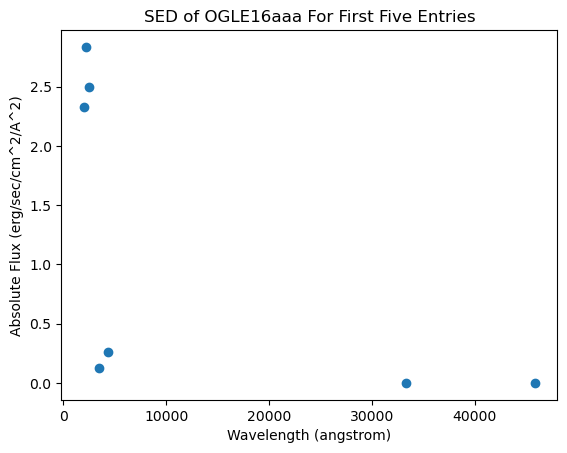

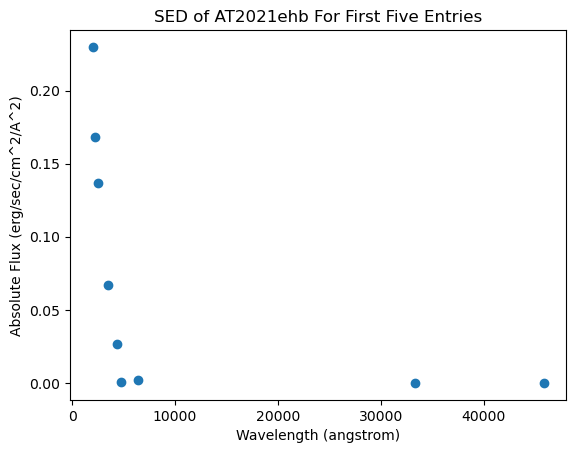

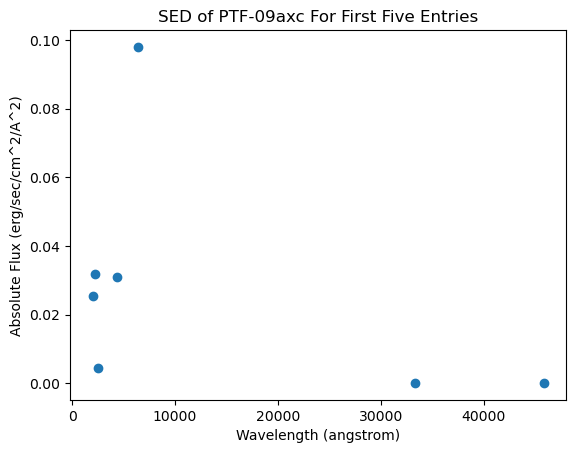

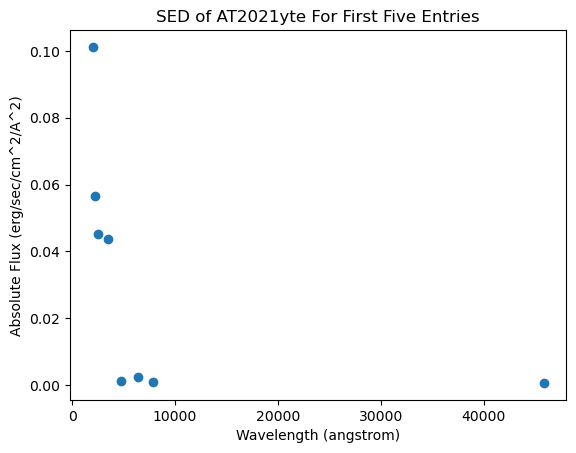

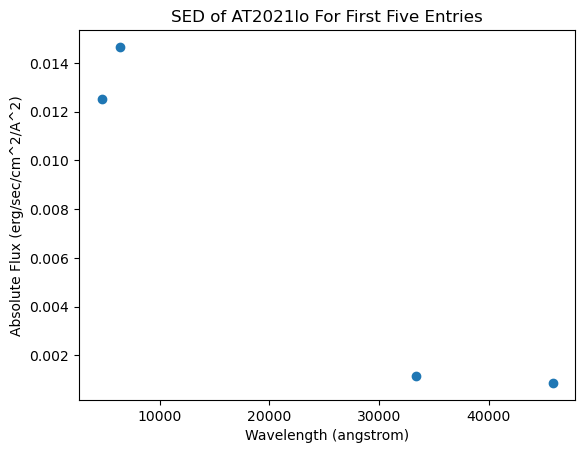

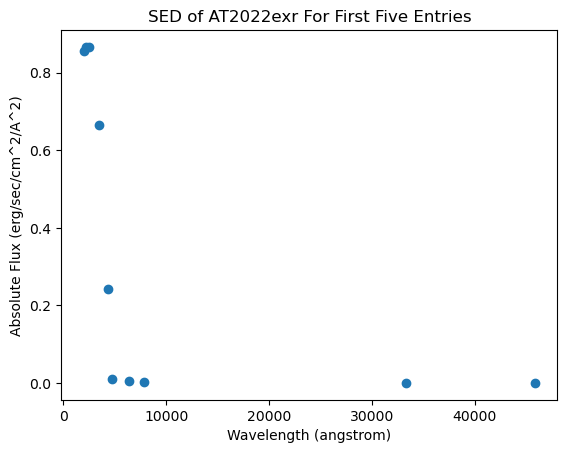

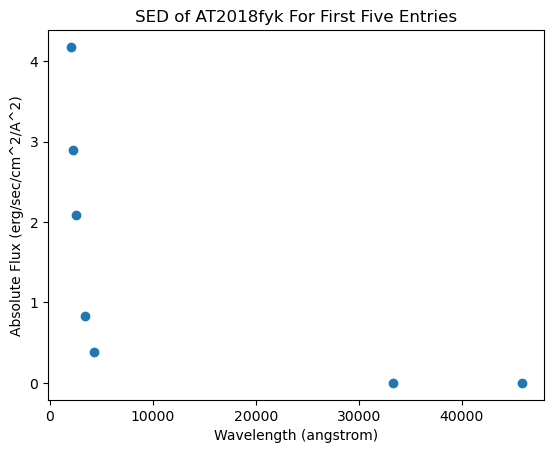

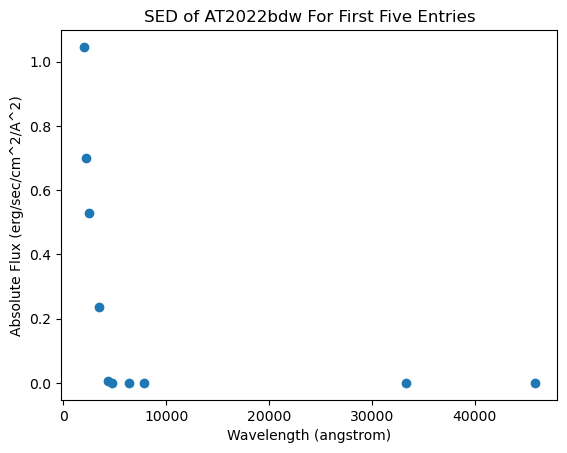

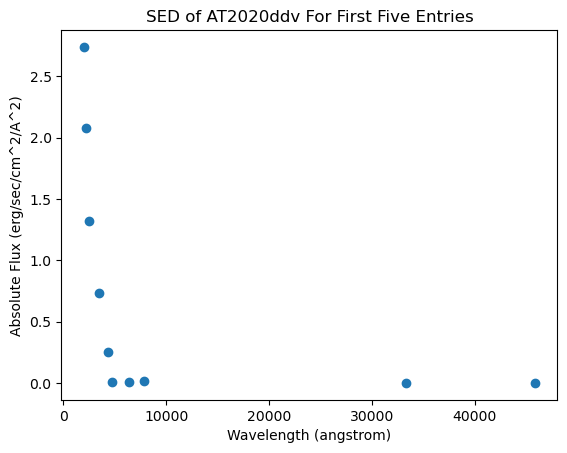

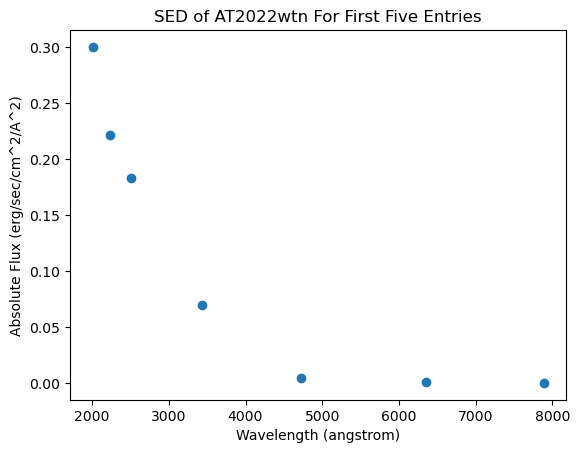

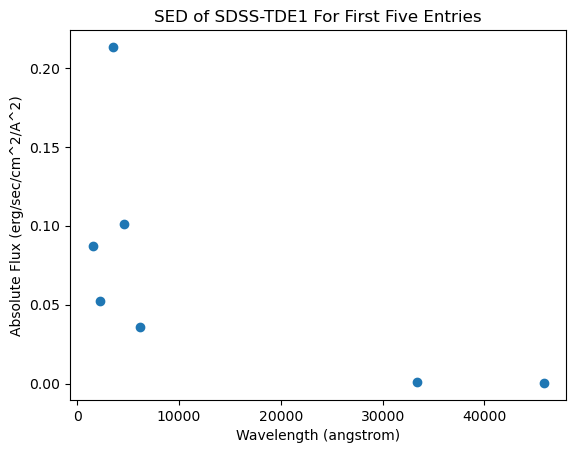

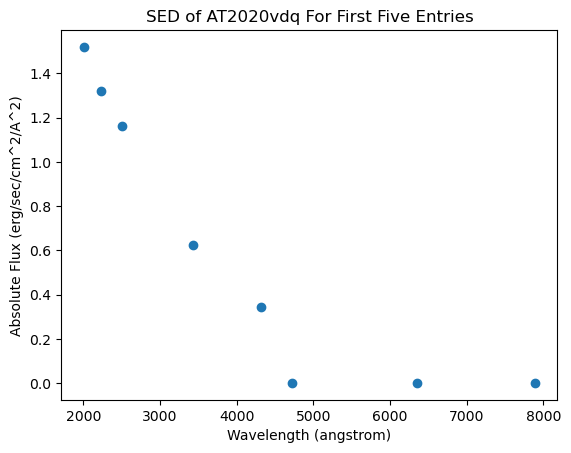

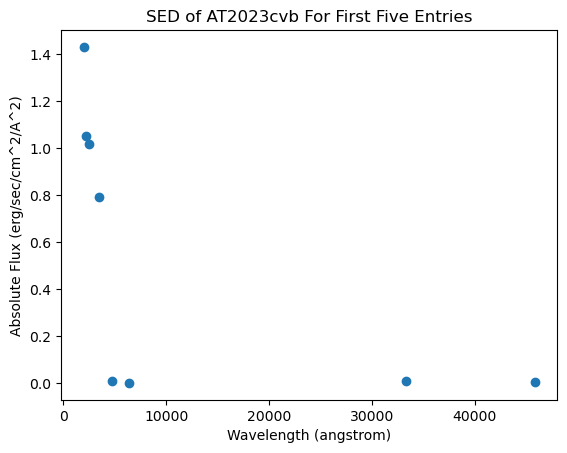

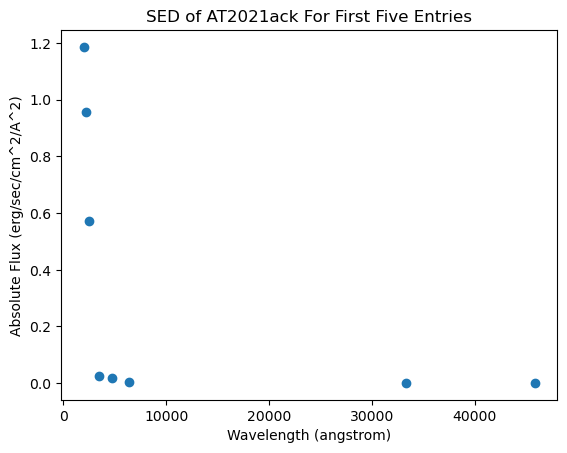

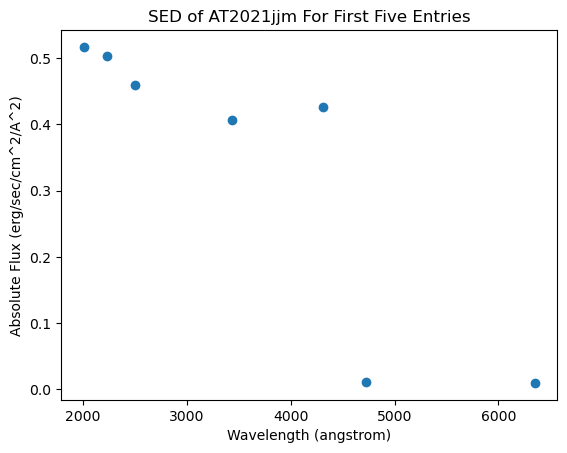

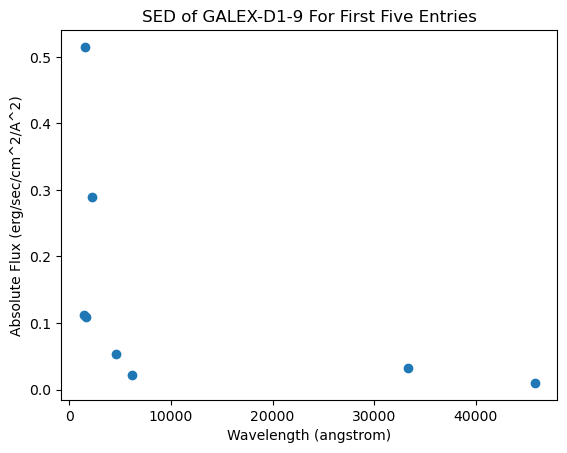

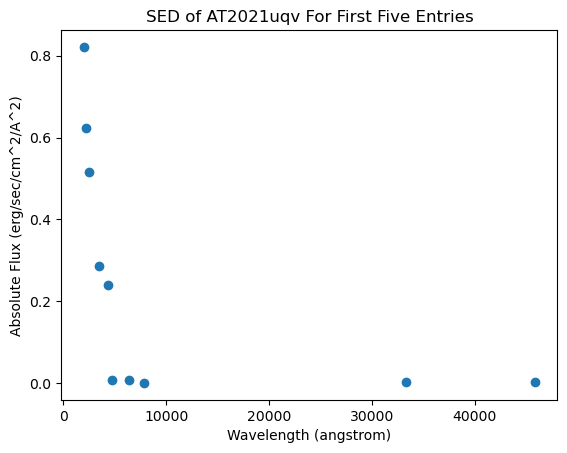

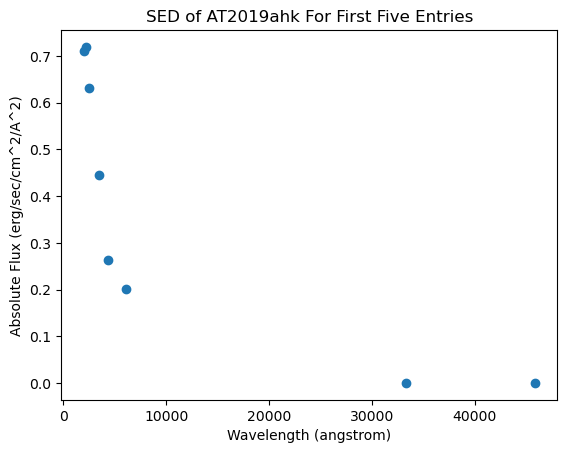

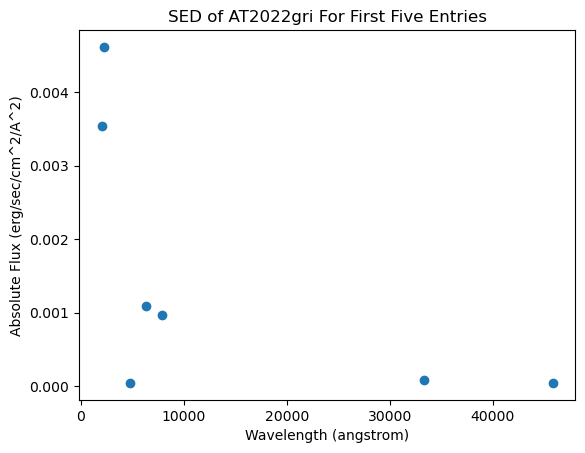

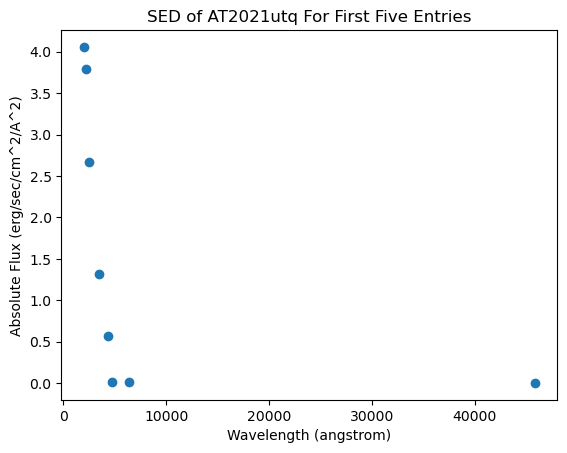

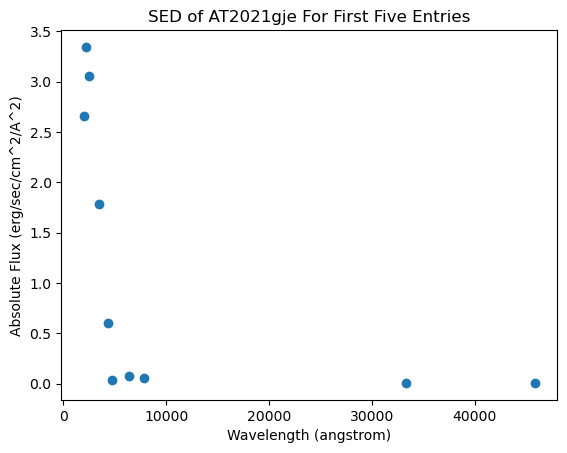

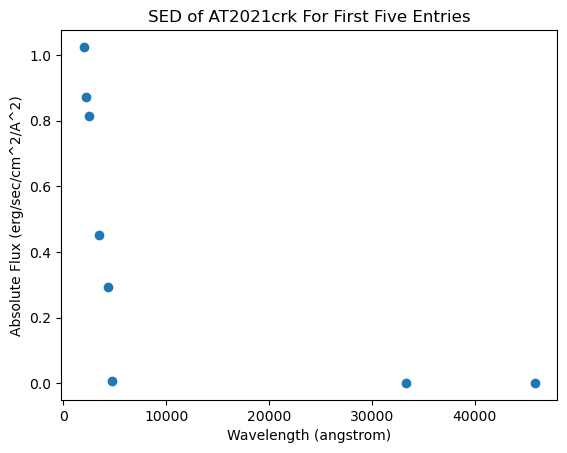

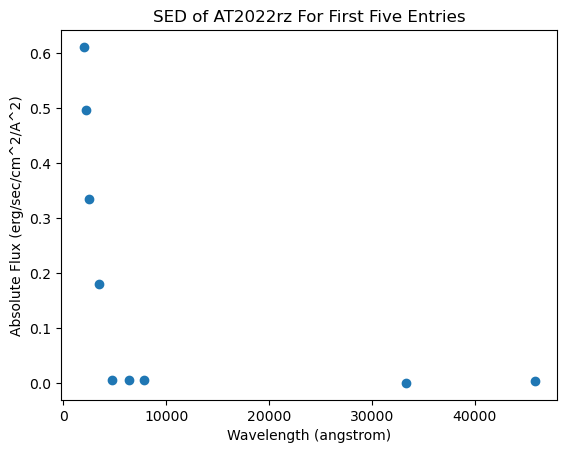

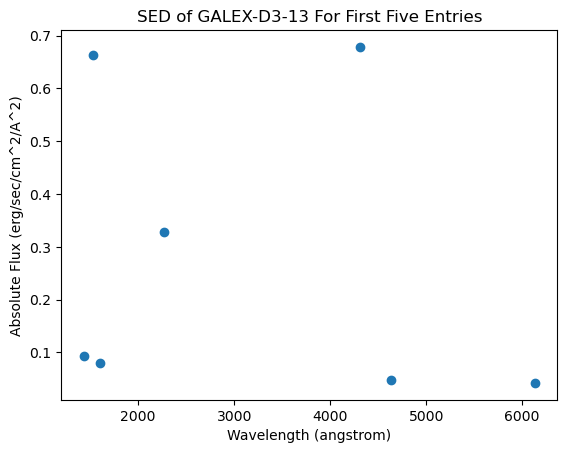

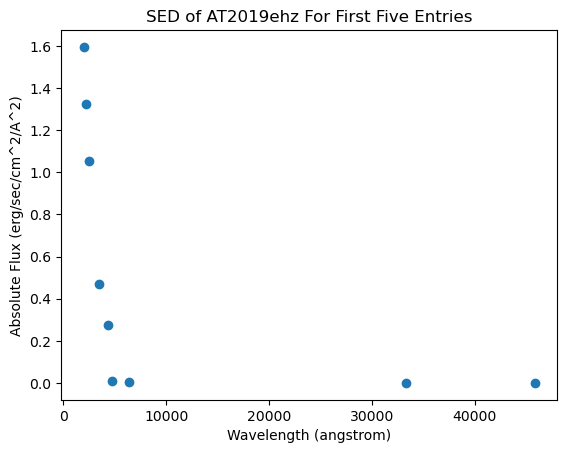

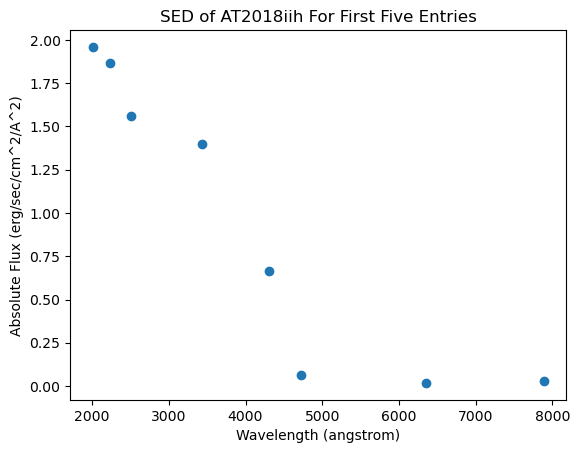

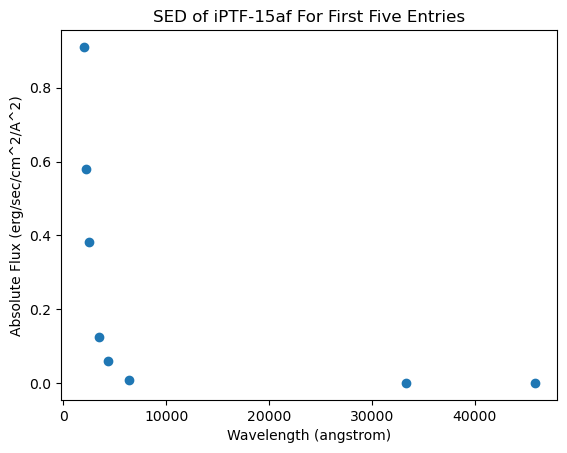

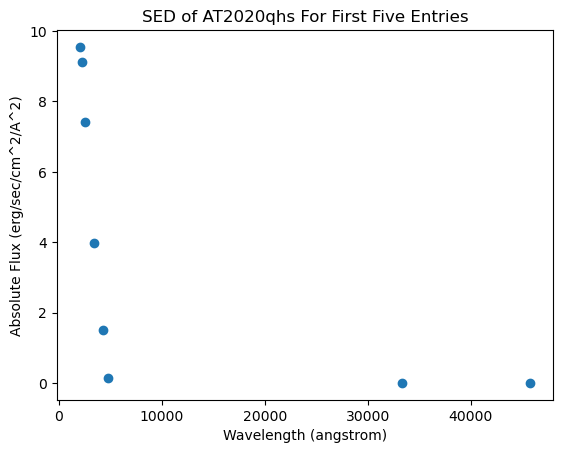

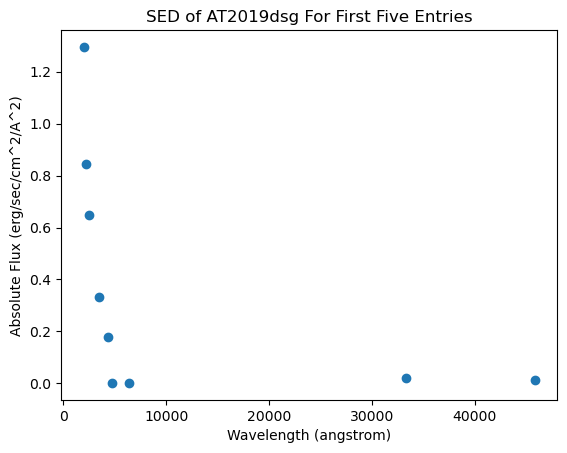

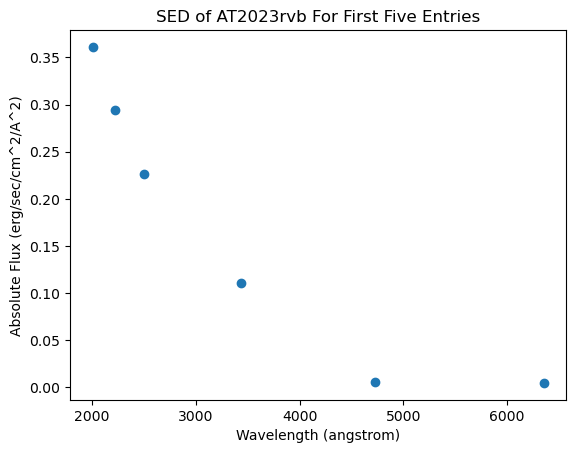

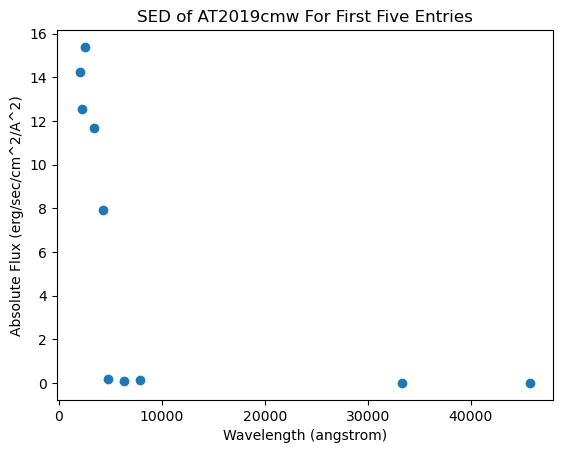

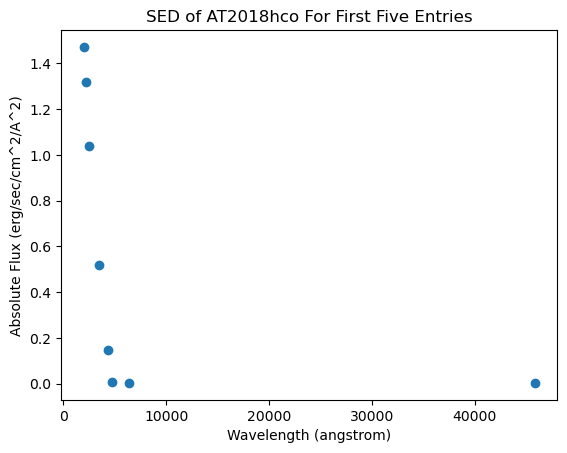

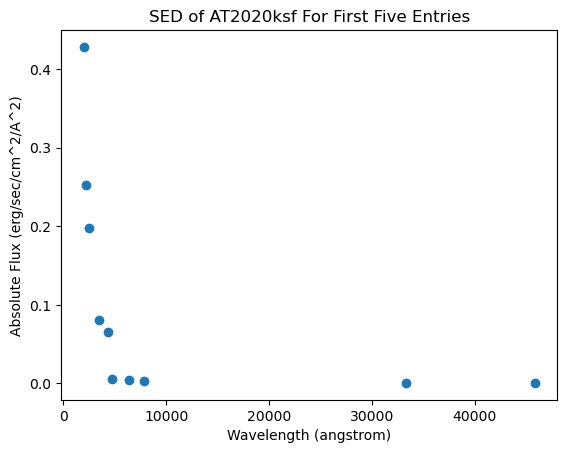

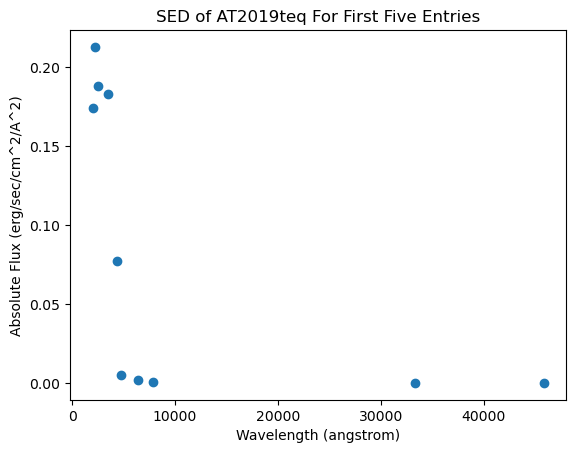

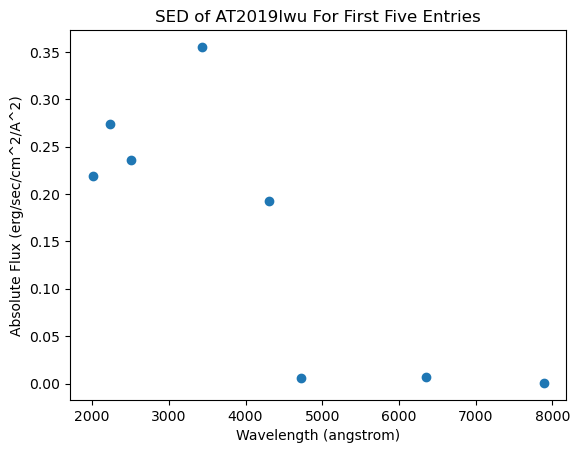

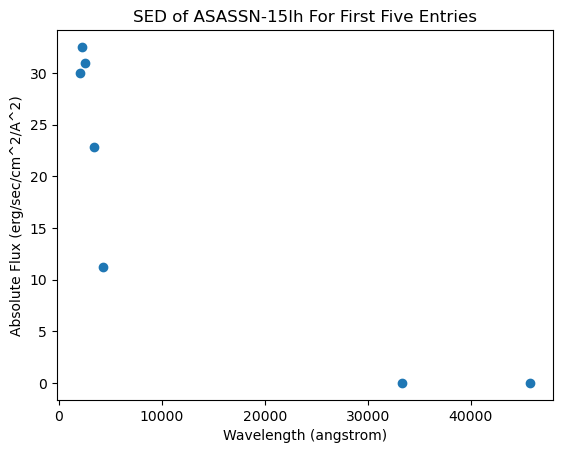

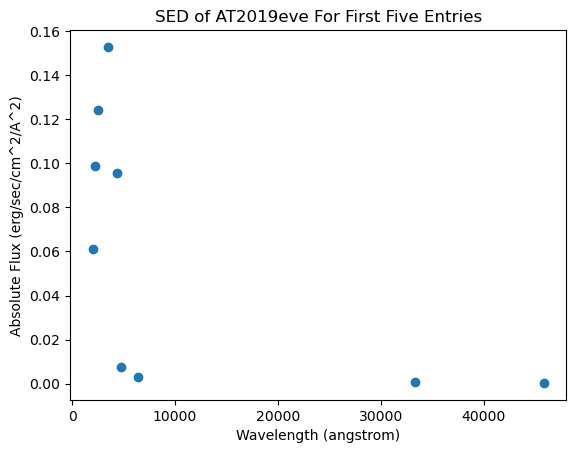

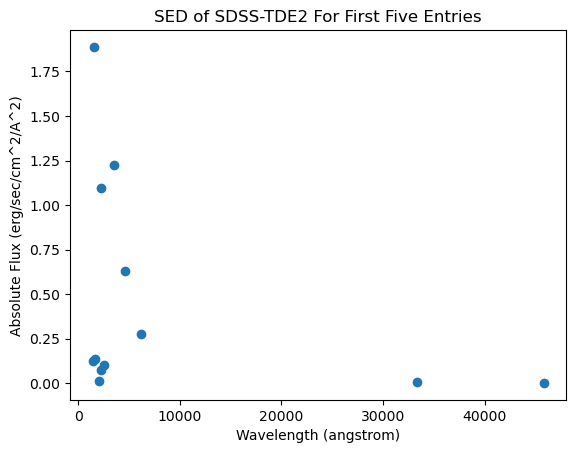

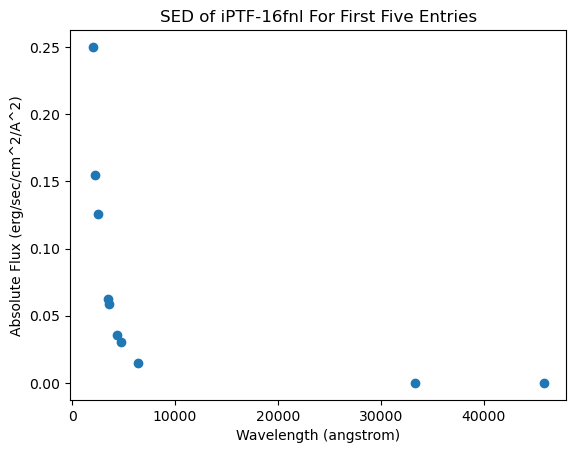

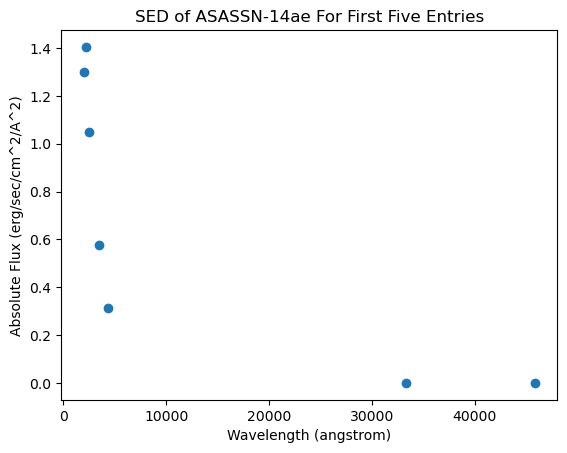

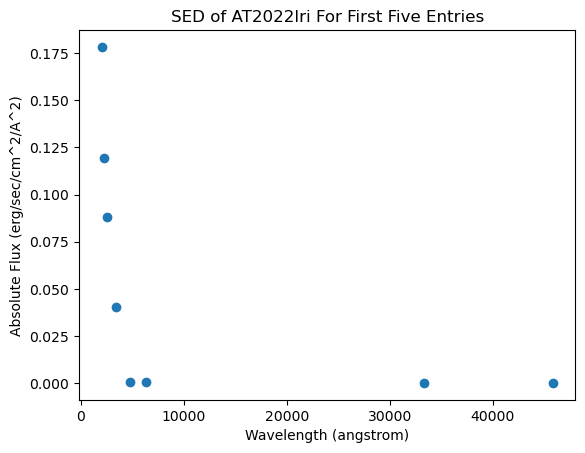

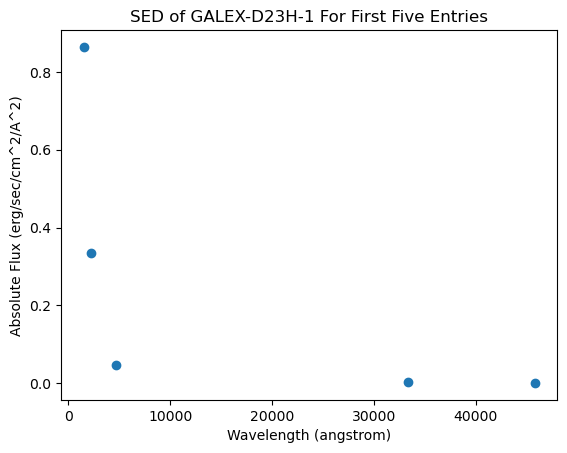

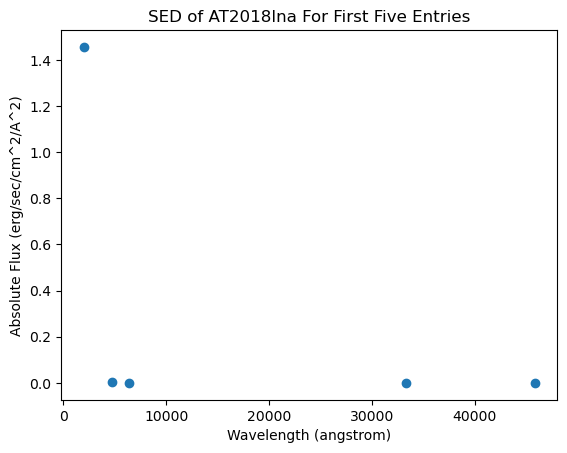

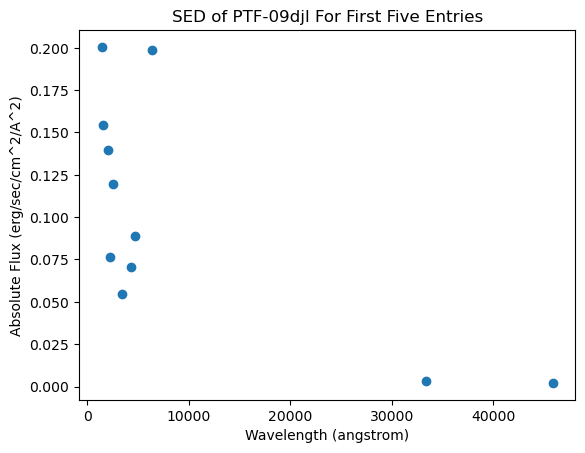

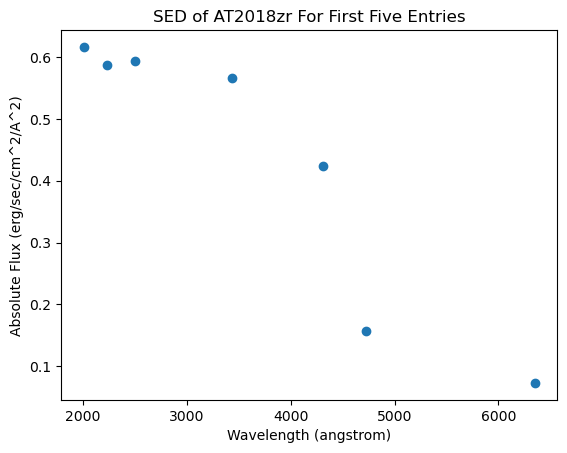

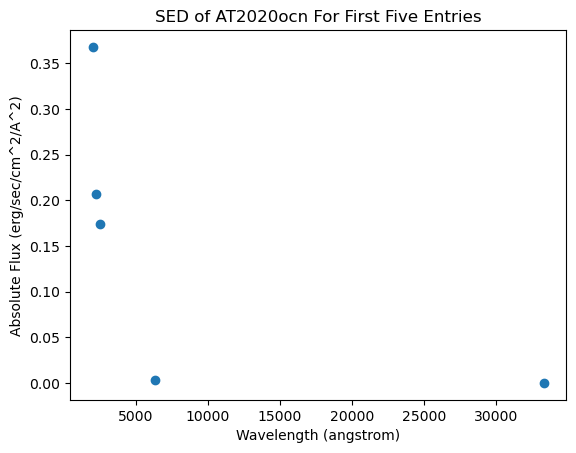

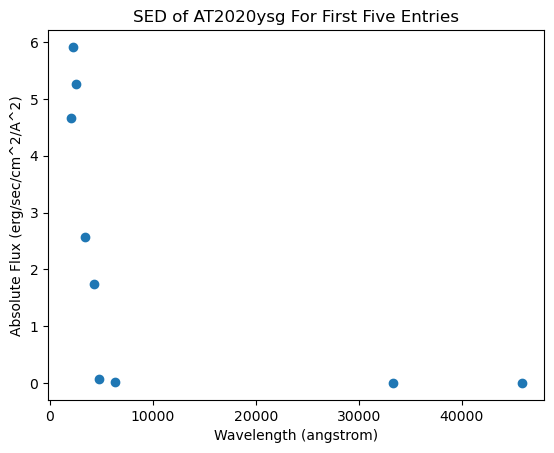

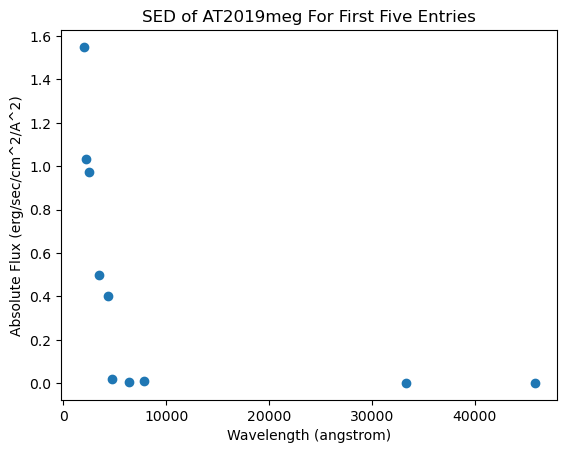

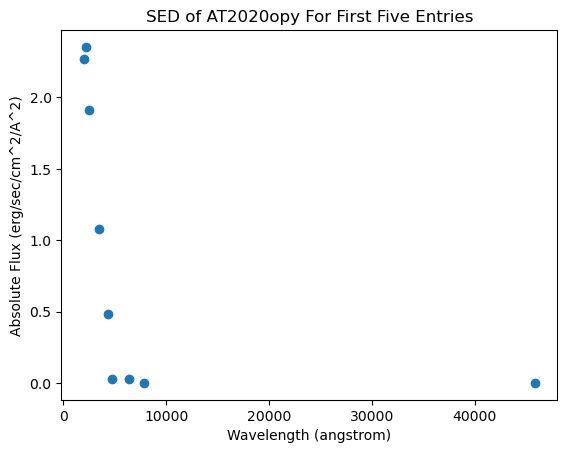

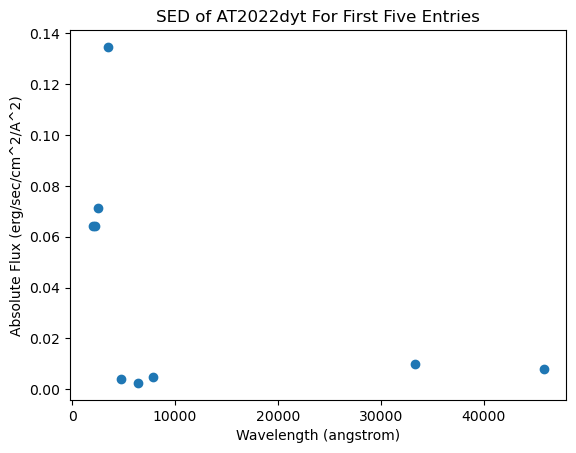

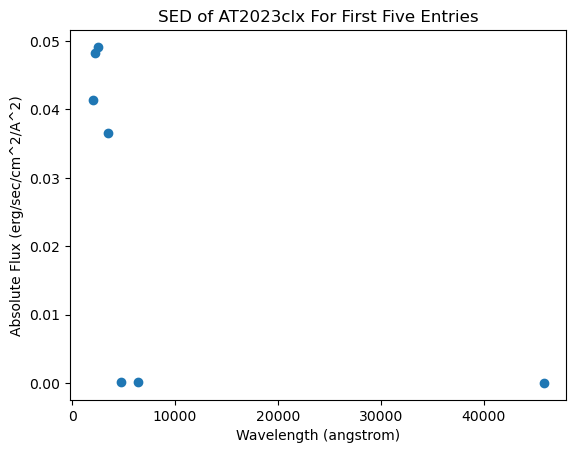

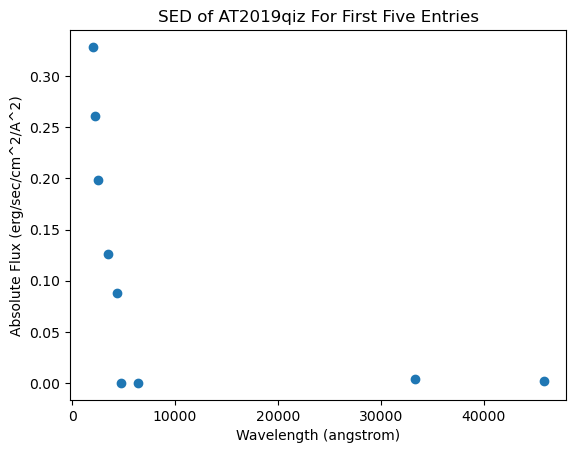

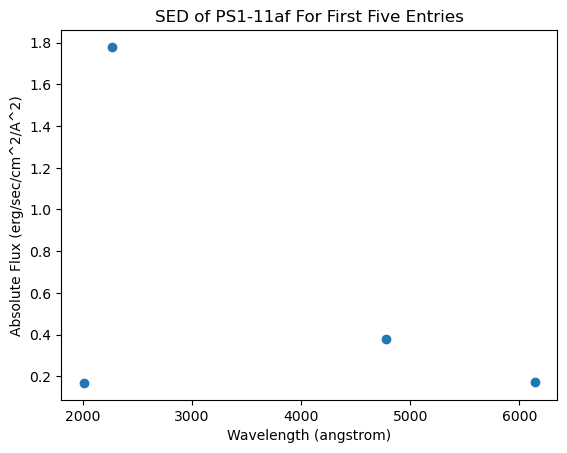

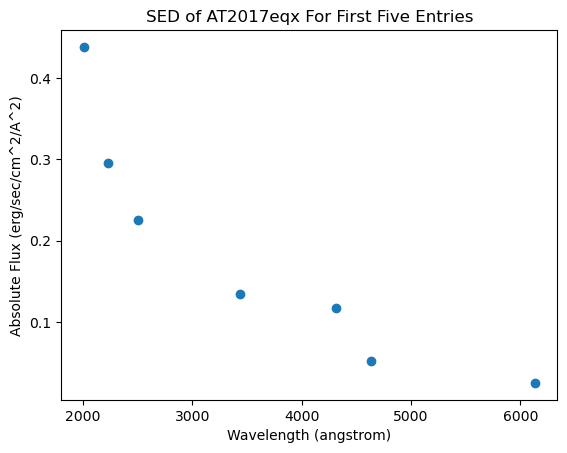

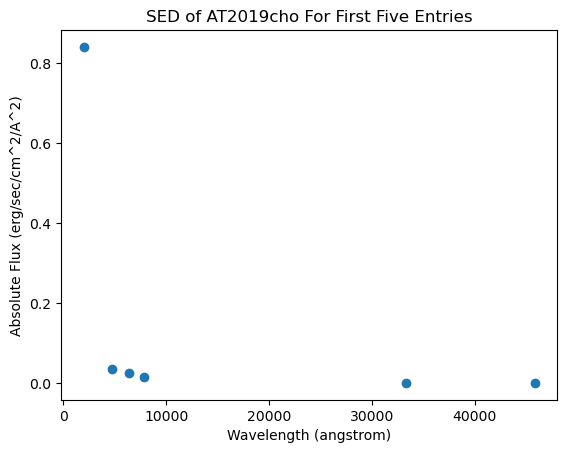

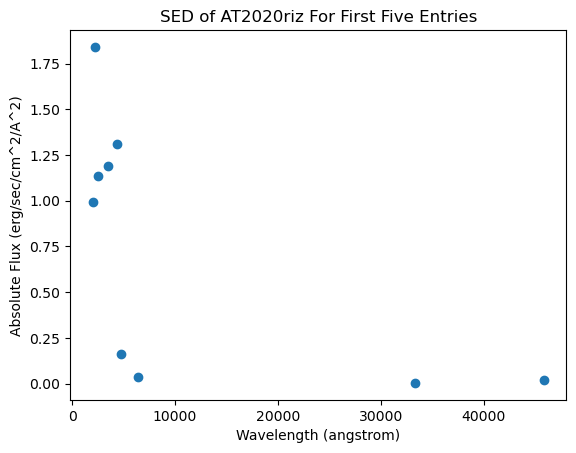

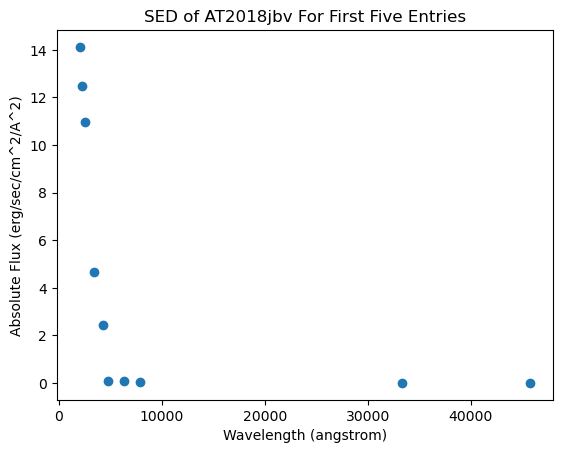

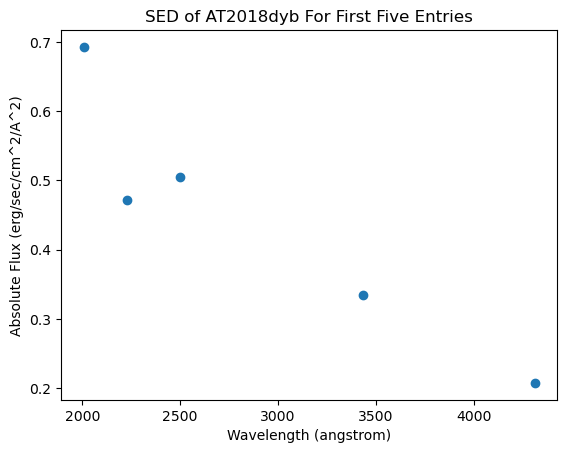

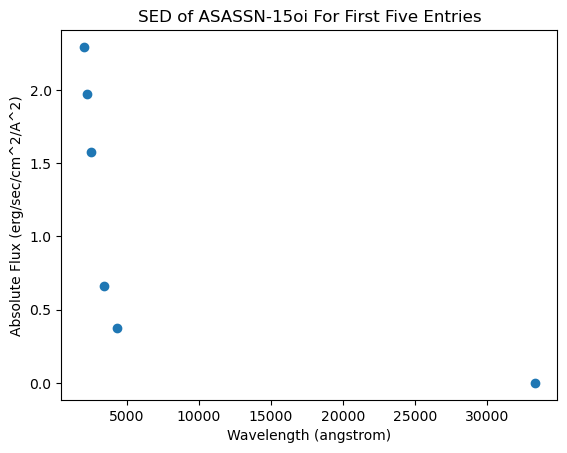

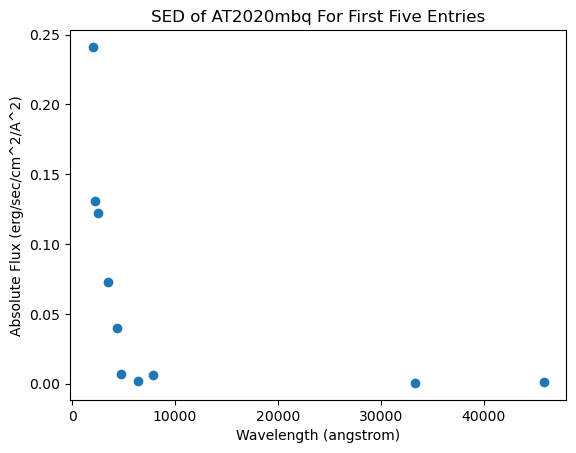

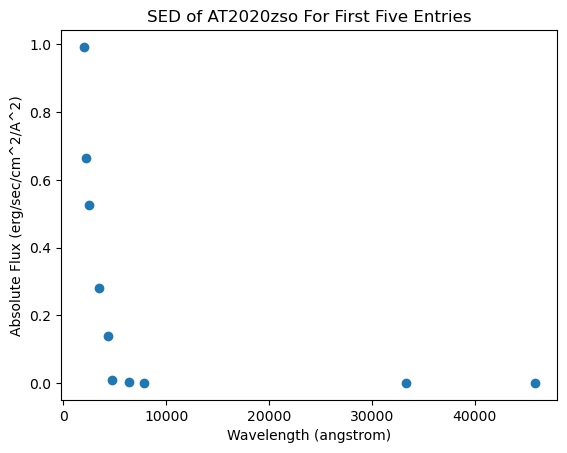

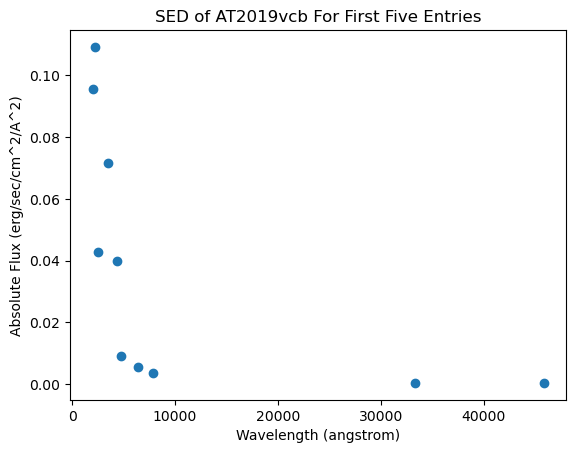

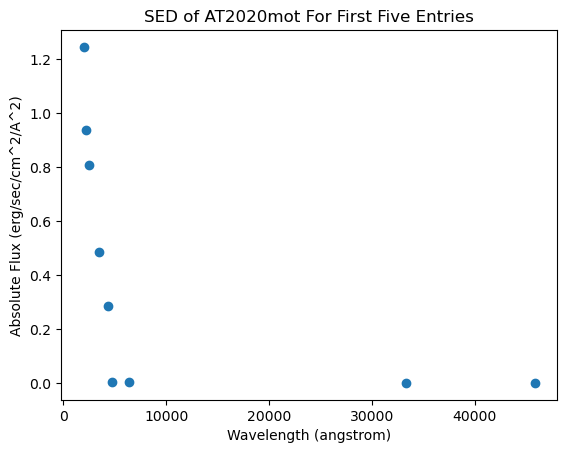

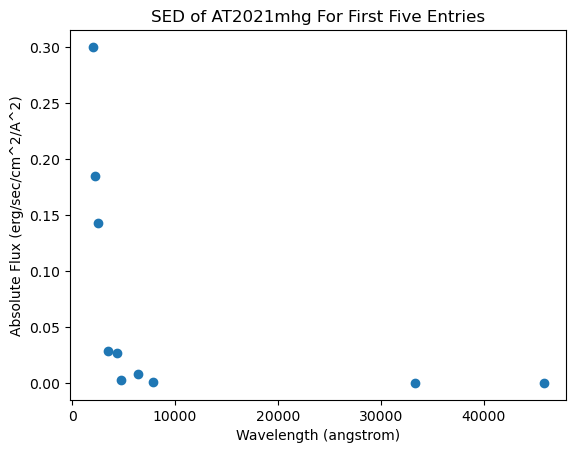

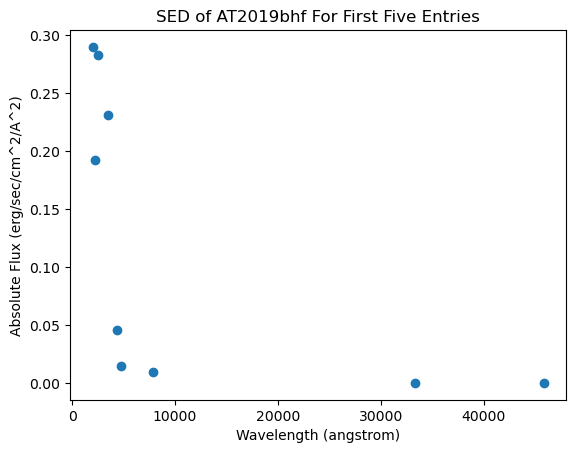

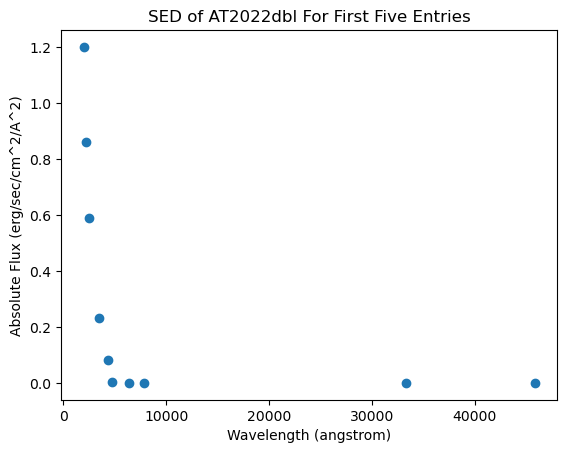

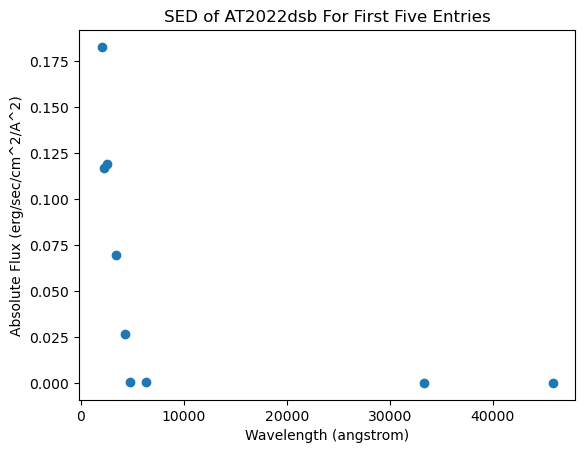

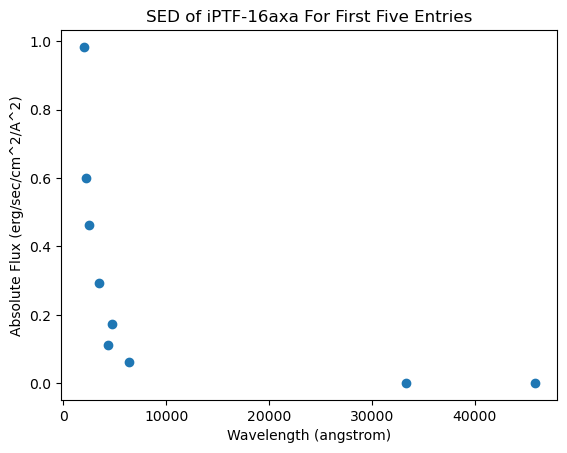

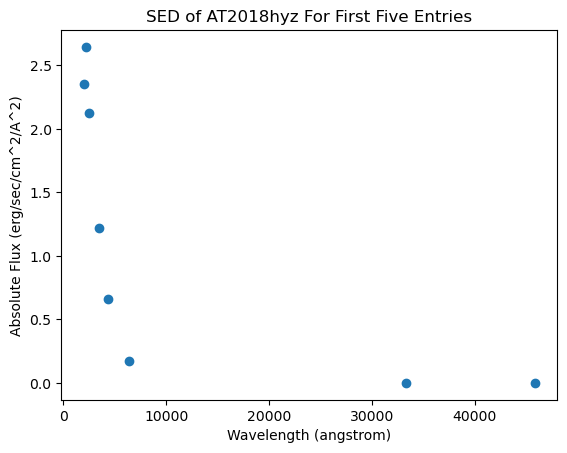

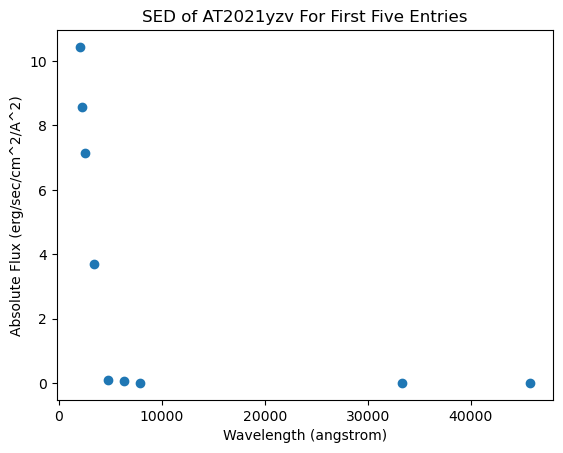

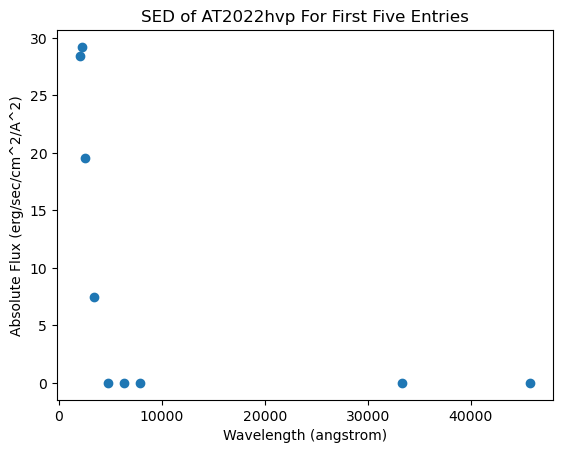

<Figure size 640x480 with 0 Axes>

In [79]:
def plot_SED(tde_name):
    with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
        tde_data = json.load(f)
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    Aflux = []
    abs_flux_bin = []
    abs_flux_mean = []
    abs_flux_mean_erg = []
    lc_filters = tde_data['lightcurve']['filters']
    distance = (sol*tde_data.get('z'))/Ho         
    distance_pc = distance.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    wave_list = (np.array(tde_data['lightcurve']['frequency_Hz']) * u.Hz).to(u.angstrom, equivalencies=u.spectral())[0:len(lc_filters)]
    for element in lc_filters: 
        filter_list = np.array([f[1] for f in tde_data['lightcurve']['data']])
        i_filter = np.where(filter_list == element)[0]
        flux_filter = np.array(tde_data['lightcurve']["data"])[i_filter,2]
        flux_filter = np.array(flux_filter, dtype=float)*u.Jy
        mag_filter = flux_filter.to(u.ABmag)     
        absMag_filter = mag_filter.value - distance_mod 
        absMag_filter = absMag_filter.to_value()
        Aflux.append(10**((absMag_filter-8.9)/(-2.5)))
    for t in range(len(lc_filters)):
        abs_flux_bin.append(np.array(Aflux[t][:5]))
    for b in range(len(lc_filters)):
        abs_flux_mean.append(np.nanmean(abs_flux_bin[b]))
    for x in range(len(lc_filters)):
        abs_flux_mean_erg.append((abs_flux_mean[x]*.00003)/(wave_list.to_value()[x])**2)
    SED = plt.scatter(wave_list.to_value(),(np.array(abs_flux_mean_erg)))
    plt.xlabel("Wavelength (angstrom)")
    plt.ylabel("Absolute Flux (erg/sec/cm^2/A^2)")
    plt.title("SED of {}".format(tde_name) + ' For First Five Entries')
    plt.show()
    plt.savefig('SED and Lightcurve Folder/SED For First Five Entries of {}'.format(tde_name) + '.pdf')
    return(SED)
for json_file in json_list[:]:
    tde_name = json_file[:-5]
    plot_SED(tde_name) 

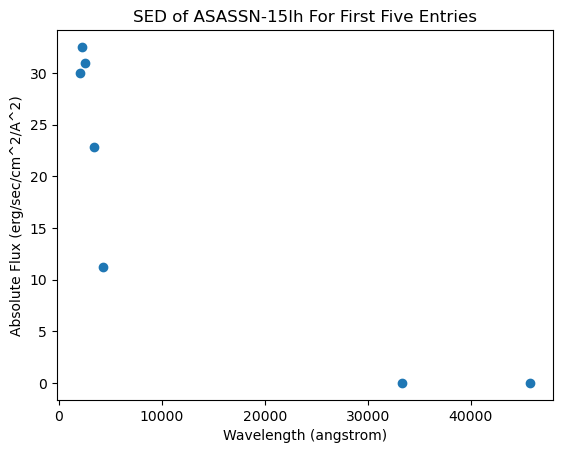

[ 4311.81994004  3434.77524091  2226.48332671  2500.58131664
  2008.44444658 33340.74630192 45819.24842446]
[6951805702866.042, 8961782084716.186, 5372487212891.243, 6452252572819.119, 4032440546927.9907, 618403051151.0134, 740397192510.7997]


(<matplotlib.collections.PathCollection at 0x15bfc6660>, None, None)

In [76]:
plot_SED('ASASSN-15lh')

In [68]:
print(flhabs_flux_mean,flh_wave_list.to_value())


[6951805702866.042, 8961782084716.186, 5372487212891.243, 6452252572819.119, 4032440546927.9907] [4311.81994004 3434.77524091 2226.48332671 2500.58131664 2008.44444658]
